In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import pandas as pd
from nltk.stem import PorterStemmer

def wordcount(text):
    text = text.lower()
    # Remove anything that isn't a word character or a space
    # We could use .replace(".", "") but regex is a lot easier!
    text  = text.replace("-", " ")
    text = re.sub("[^\w ]", "", text)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    stemmer = PorterStemmer()
#     newtext = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = ""
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence = filtered_sentence + " " + stemmer.stem(w)
#             print(w , lemmatizer.lemmatize(w))
    words = filtered_sentence.split(" ")
    return Counter(words)


In [2]:
import pandas as pd
wiki_need =  pd.DataFrame(columns = ["Topic","Keywords","Occurence"])
wiki_need = wiki_need.set_index("Topic")


# Top 10 keywords extracted using YAKE on http://yake.inesctec.pt/demo/user
need_dict = {
    'Subprime mortgage crisis': {'mortgage', 'financial', 'banks', 'crisis', 'trillion','debt','credit','subprime','sector','loan'},
'Irritable bowel syndrome' : {'ibs', 'symptoms', 'patients', 'costs', 'found', 'fiber', 'study', 'gut', 'evidence','cases'},
'Genetically modified organism': {'genetically' , 'modified', 'crops', 'organisms', 'DNA', 'european', 'drosophila', 'gmos','virus','engineering'},
'Noise-induced hearing loss':{'hearing', 'loss', 'noise', 'devices', 'NIHL', 'cell', 'fluid', 'hair', 'protection', 'interventions'},
'Business cycle' : {'kondratiev', 'cycles', 'business', 'keynesian', 'treasury', 'school', 'austrian', 'curve', 'supply','rate'},
'Ethics' : {'ethics', 'moral', 'death', 'hoy', 'pleasure', 'cyrene', 'aristippus', 'fear', 'normative','action'}             ,
'Radiocarbon dating considerations': {'years', 'surface', 'water', 'time', 'ratio', 'ocean', 'tree', 'atmosphere', 'effect','ring'},
}

stemmer = PorterStemmer()

#Stem need_dict
for key in need_dict:
    vect = []
    for word in need_dict[key]:
        vect.append(stemmer.stem(word))
    need_dict[key] = vect
    print(vect)
        

#New function with keyword need from YAKE and dictionnary
for l in open("data/wikipedia_texts.tsv", encoding = 'utf-8'):
    topic_title, text = l.strip().split("\t", maxsplit=1) 
    topic_title = topic_title.replace("%20"," ")
    keywords = need_dict[topic_title] 
    need_n = [0] * 10
    counter_word = wordcount(text)
    counter = 0
    for i in keywords:
#         print(i)
        value = counter_word[i]
#         print(value)
#         value = counter_word[i]
        need_n[counter] = value * 1
#     need_weight[topic_title]
        counter = counter + 1
    wiki_need.loc[topic_title] = [keywords,need_n] 
display(wiki_need) 

['subprim', 'sector', 'crisi', 'credit', 'debt', 'financi', 'trillion', 'mortgag', 'loan', 'bank']
['gut', 'found', 'patient', 'fiber', 'cost', 'symptom', 'evid', 'studi', 'ib', 'case']
['gmo', 'crop', 'engin', 'organ', 'european', 'genet', 'drosophila', 'modifi', 'viru', 'dna']
['nois', 'protect', 'loss', 'devic', 'cell', 'hair', 'intervent', 'hear', 'fluid', 'nihl']
['busi', 'keynesian', 'austrian', 'school', 'suppli', 'rate', 'treasuri', 'curv', 'cycl', 'kondratiev']
['hoy', 'death', 'aristippu', 'norm', 'moral', 'cyren', 'fear', 'action', 'pleasur', 'ethic']
['surfac', 'atmospher', 'ratio', 'ocean', 'ring', 'time', 'year', 'tree', 'water', 'effect']


,Keywords,Occurence
Topic,,
Subprime mortgage crisis,"[subprim, sector, crisi, credit, debt, financi...","[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]"
Irritable bowel syndrome,"[gut, found, patient, fiber, cost, symptom, ev...","[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]"
Genetically modified organism,"[gmo, crop, engin, organ, european, genet, dro...","[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]"
Noise-induced hearing loss,"[nois, protect, loss, devic, cell, hair, inter...","[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]"
Business cycle,"[busi, keynesian, austrian, school, suppli, ra...","[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]"
Ethics,"[hoy, death, aristippu, norm, moral, cyren, fe...","[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]"
Radiocarbon dating considerations,"[surfac, atmospher, ratio, ocean, ring, time, ...","[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]"


In [3]:
#Get a vector for every document
import json
import pandas as pd
url_topic =  pd.DataFrame(columns = ["Url","Topic"])
url_topic = url_topic.set_index("Url")

with open("data/logs_with_position.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

for i in range(0,len(jsonObject)):
    userID = jsonObject[i]['userID']
    topic = jsonObject[i]['topic_title'].replace("%20"," ")
    clicks = jsonObject[i]['clicks']
    for x in clicks:
        url_topic.loc[x['url']] = [topic]
#         if x['url'] in open('data/clicked_docs.tsv',encoding = 'utf-8').read():
#            print("found")
#         else:
#                  print(x['url'])
#     urls = [ for x in clicks]
   
    
display(url_topic) 

,Topic
Url,
https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745,Subprime mortgage crisis
https://www.federalreservehistory.org/essays/subprime_mortgage_crisis,Subprime mortgage crisis
https://hmo-ealing.uk/united-states-subprime-mortgage-crisis/,Subprime mortgage crisis
https://en.scio.pw/Subprime_mortgage_crisis,Subprime mortgage crisis
https://answersdrive.com/what-were-the-causes-of-the-global-financial-crisis-in-2008-469467,Subprime mortgage crisis
...,...
https://researchethics.ca/what-is-research-ethics/,Ethics
https://hbr.org/2011/04/ethical-breakdowns,Ethics
https://www.researchgate.net/publication/5033075_The_Rise_and_Fall_of_Subprime_Mortgages,Subprime mortgage crisis


In [4]:
doc_vect =  pd.DataFrame(columns = ["Url","Occurence","Topic Occurrence"])
doc_vect = doc_vect.set_index("Url")
for l in open("data/clicked_docs.tsv", encoding = 'utf-8'):
    url = (l.strip().split("\t", maxsplit=1))[0]
    try:
        text = (l.strip().split("\t", maxsplit=1))[1]
        doc_vect.loc[url] = [wordcount(text),""]
    except:
#         print(l)
        text = "."
        doc_vect.loc[url] = [wordcount(text),""]
#         print(doc_vect.loc[url])

    
display(doc_vect)
  

,Occurence,Topic Occurrence
Url,,
https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016,"{'': 1, 'overview': 1, 'irrit': 1, 'bowel': 7,...",
https://askdrnandi.com/exactly-irritable-bowel-syndrome/,"{'': 1, 'exactli': 2, 'irrit': 2, 'bowel': 2, ...",
https://www.womenshealthmag.com/health/a19996192/what-causes-ibs/,"{'': 1, '8': 1, 'reason': 2, 'stomach': 2, 'ha...",
https://scholar.google.com/,{'': 1},
https://www.webmd.com/ibs/what-is-ibs,"{'': 1, 'articl': 1, 'irrit': 3, 'bowel': 3, '...",
...,...,...
https://www.theguardian.com/business/economicgrowth,"{'': 1, 'britain': 1, 'enter': 1, 'deepest': 1...",
https://en.scio.pw/Subprime_mortgage_crisis,{'': 1},
https://quizlet.com/271710110/ethics-test-1-study-guide-flash-cards/,"{'': 1, 'whatev': 1, 'econom': 1, 'knowledg': ...",


In [5]:
result = pd.concat([doc_vect, url_topic], axis=1, join='inner')
display(result)

,Occurence,Topic Occurrence,Topic
Url,,,
https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016,"{'': 1, 'overview': 1, 'irrit': 1, 'bowel': 7,...",,Irritable bowel syndrome
https://askdrnandi.com/exactly-irritable-bowel-syndrome/,"{'': 1, 'exactli': 2, 'irrit': 2, 'bowel': 2, ...",,Irritable bowel syndrome
https://www.womenshealthmag.com/health/a19996192/what-causes-ibs/,"{'': 1, '8': 1, 'reason': 2, 'stomach': 2, 'ha...",,Irritable bowel syndrome
https://scholar.google.com/,{'': 1},,Irritable bowel syndrome
https://www.webmd.com/ibs/what-is-ibs,"{'': 1, 'articl': 1, 'irrit': 3, 'bowel': 3, '...",,Irritable bowel syndrome
...,...,...,...
https://www.theguardian.com/business/economicgrowth,"{'': 1, 'britain': 1, 'enter': 1, 'deepest': 1...",,Business cycle
https://en.scio.pw/Subprime_mortgage_crisis,{'': 1},,Subprime mortgage crisis
https://quizlet.com/271710110/ethics-test-1-study-guide-flash-cards/,"{'': 1, 'whatev': 1, 'econom': 1, 'knowledg': ...",,Ethics


In [6]:
for i in range(0,len(result)):
    t = result['Topic'][i]
    need = wiki_need['Keywords'].loc[t]
    vect = []
    for n in need:
        try:
            occ = int((result['Occurence'][i])[n])
        except:
            occ = int(0)
        vect.append(int(occ))
    result['Topic Occurrence'][i] = vect
display(result)

,Occurence,Topic Occurrence,Topic
Url,,,
https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016,"{'': 1, 'overview': 1, 'irrit': 1, 'bowel': 7,...","[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]",Irritable bowel syndrome
https://askdrnandi.com/exactly-irritable-bowel-syndrome/,"{'': 1, 'exactli': 2, 'irrit': 2, 'bowel': 2, ...","[0, 0, 0, 0, 0, 5, 0, 0, 9, 0]",Irritable bowel syndrome
https://www.womenshealthmag.com/health/a19996192/what-causes-ibs/,"{'': 1, '8': 1, 'reason': 2, 'stomach': 2, 'ha...","[12, 2, 0, 1, 0, 8, 0, 5, 22, 0]",Irritable bowel syndrome
https://scholar.google.com/,{'': 1},"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",Irritable bowel syndrome
https://www.webmd.com/ibs/what-is-ibs,"{'': 1, 'articl': 1, 'irrit': 3, 'bowel': 3, '...","[3, 0, 0, 0, 0, 8, 0, 0, 21, 0]",Irritable bowel syndrome
...,...,...,...
https://www.theguardian.com/business/economicgrowth,"{'': 1, 'britain': 1, 'enter': 1, 'deepest': 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",Business cycle
https://en.scio.pw/Subprime_mortgage_crisis,{'': 1},"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",Subprime mortgage crisis
https://quizlet.com/271710110/ethics-test-1-study-guide-flash-cards/,"{'': 1, 'whatev': 1, 'econom': 1, 'knowledg': ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",Ethics


In [7]:
gain_compare = pd.DataFrame(columns = ["userID","Topic","Actual","Vocab"])
gain_compare = gain_compare.set_index("userID")

In [8]:
import numpy as np
from scipy import spatial
from scipy import stats as st
from numpy.linalg import norm

import json

with open("data/logs_with_position.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

for i in range(0,len(jsonObject)):
    userID = jsonObject[i]['userID']
    topic = jsonObject[i]['topic_title']
    gain = jsonObject[i]['RPL']
    clicks = jsonObject[i]['clicks']
    urls = [x['url'] for x in clicks]
#     display(urls)
    print("New user :", userID)
    kb = [0] * len(result["Topic Occurrence"][0]) 
    print(kb)
    #knowledge base
    
    for url in urls:
        display(url)
#         print(type(np.array(kb)))
#         print(type(np.array(result["Topic Occurrence"][url])))
#         kb =  np.array(str(kb)) + np.array(result["Topic Occurrence"][url])
        try:
            kb = [x + y if x + y < z else z for (x, y,z) in zip(kb, result["Topic Occurrence"][url], wiki_need["Occurence"][topic])]
        except:
#                         print("error updating kb")
            continue
        display(result["Topic Occurrence"][url])
        print("kb updated:")
        display(kb)
    display(kb)
    display(wiki_need['Occurence'].loc[topic])
    
    sim = 1-  spatial.distance.cosine(kb,wiki_need['Occurence'].loc[topic])
#Other Similarity functions that I tried:
#     distance = [x - y for (x,y) in zip(wiki_need['Occurence'].loc[topic],kb)]
#     sim = 1 / (1 + norm(distance))
#     sim = 1 / (1 + spatial.distance.minkowski(kb,wiki_need['Occurence'].loc[topic]))
#     display(sim)

    gain_compare.loc[userID] = [topic,gain,sim]
    
corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corr)

display(gain_compare)

New user : 5d0bcf217a581100161860ae
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 11, 4, 2, 10, 0, 56, 8, 7]

'https://hmo-ealing.uk/united-states-subprime-mortgage-crisis/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 0, 11, 4, 2, 10, 0, 56, 8, 7]

'https://en.scio.pw/Subprime_mortgage_crisis'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 0, 11, 4, 2, 10, 0, 56, 8, 7]

'https://en.scio.pw/Subprime_mortgage_crisis'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 0, 11, 4, 2, 10, 0, 56, 8, 7]

'https://answersdrive.com/what-were-the-causes-of-the-global-financial-crisis-in-2008-469467'

[10, 0, 33, 1, 1, 26, 1, 10, 5, 12]

kb updated:


[12, 0, 17, 5, 3, 28, 1, 56, 13, 19]

'https://www.wikipedia.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 0, 17, 5, 3, 28, 1, 56, 13, 19]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 17, 13, 7, 28, 1, 56, 16, 28]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 0, 17, 14, 8, 28, 1, 56, 16, 34]

'https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp'

[18, 0, 2, 9, 7, 14, 3, 43, 5, 7]

kb updated:


[12, 0, 17, 14, 15, 28, 4, 56, 16, 34]

'https://www.thebalance.com/role-of-derivatives-in-creating-mortgage-crisis-3970477'

[0, 0, 3, 2, 5, 3, 0, 13, 7, 9]

kb updated:


[12, 0, 17, 14, 20, 28, 4, 56, 16, 34]

'https://www.investopedia.com/articles/economics/09/financial-crisis-review.asp'

[9, 1, 17, 4, 2, 27, 2, 18, 4, 29]

kb updated:


[12, 1, 17, 14, 20, 28, 6, 56, 16, 34]

'https://finance.zacks.com/effects-mortgage-crisis-stock-market-9890.html'

[1, 0, 5, 1, 0, 5, 0, 8, 0, 0]

kb updated:


[12, 1, 17, 14, 20, 28, 6, 56, 16, 34]

'https://fee.org/articles/how-the-federal-government-created-the-subprime-mortgage-crisis/'

[9, 3, 1, 4, 1, 6, 0, 24, 11, 7]

kb updated:


[12, 4, 17, 14, 20, 28, 6, 56, 16, 34]

'https://medium.com/aisapodcast/how-governments-policies-led-to-the-financial-crisis-of-2008-4c060b6e5b7'

[2, 0, 14, 4, 1, 10, 0, 1, 4, 10]

kb updated:


[12, 4, 17, 14, 20, 28, 6, 56, 16, 34]

'https://www.forbes.com/sites/norbertmichel/2015/01/26/government-policies-caused-the-financial-crisis-and-made-the-recession-worse/'

[0, 3, 5, 3, 1, 5, 0, 10, 1, 3]

kb updated:


[12, 7, 17, 14, 20, 28, 6, 56, 16, 34]

'https://www.economywatch.com/us-subprime/impact-europe.html'

[9, 0, 9, 0, 0, 0, 1, 4, 2, 2]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.britannica.com/event/financial-crisis-of-2007-2008'

[9, 0, 4, 3, 2, 3, 0, 8, 9, 20]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.sciencedirect.com/science/article/pii/S0304405X10000127'

[5, 0, 2, 0, 1, 2, 0, 0, 0, 0]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.thebalance.com/2007-financial-crisis-overview-3306138'

[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://knowledge.wharton.upenn.edu/article/causes-financial-crises/'

[1, 0, 14, 2, 4, 21, 0, 8, 1, 9]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.investopedia.com/articles/07/housing_bubble.asp'

[1, 0, 0, 4, 0, 3, 0, 18, 1, 0]

kb updated:


[12, 7, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.profolus.com/topics/causes-and-effects-of-the-u-s-subprime-mortgage-crisis/'

[11, 0, 24, 2, 2, 18, 3, 22, 9, 21]

kb updated:


[12, 7, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 7, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.profolus.com/topics/causes-and-effects-of-the-u-s-subprime-mortgage-crisis/'

[11, 0, 24, 2, 2, 18, 3, 22, 9, 21]

kb updated:


[12, 7, 17, 14, 20, 28, 13, 56, 16, 34]

'https://www.thebalance.com/what-caused-the-subprime-mortgage-crisis-3305696'

[11, 1, 10, 5, 3, 5, 0, 21, 10, 25]

kb updated:


[12, 8, 17, 14, 20, 28, 13, 56, 16, 34]

'https://www.cbsnews.com/news/heres-what-really-caused-housing-crisis/'

[11, 0, 10, 4, 0, 7, 0, 6, 11, 5]

kb updated:


[12, 8, 17, 14, 20, 28, 13, 56, 16, 34]

'https://fortune.com/2015/06/17/subprime-mortgage-recession/'

[6, 0, 4, 0, 1, 3, 0, 4, 1, 1]

kb updated:


[12, 8, 17, 14, 20, 28, 13, 56, 16, 34]

'https://www.forbes.com/sites/stevedenning/2011/11/22/5086/'

[6, 15, 10, 7, 1, 21, 2, 20, 8, 22]

kb updated:


[12, 17, 17, 14, 20, 28, 15, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 15, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5e311dd7a390be11ebfc23c3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.reference.com/world-view/reliable-information-mayo-clinic-website-a4e49bedc25a7b27'

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[2, 2, 8, 5, 1, 16, 0, 3, 46, 1]

'https://www.sitejabber.com/reviews/medicinenet.com'

[1, 4, 0, 0, 0, 2, 1, 0, 0, 0]

kb updated:


[3, 6, 8, 5, 1, 16, 1, 3, 46, 1]

'https://www.aboutibs.org/what-is-ibs-sidenav/post-infectious-ibs.html'

[3, 1, 1, 0, 0, 7, 1, 6, 33, 2]

kb updated:


[6, 7, 9, 5, 1, 16, 2, 9, 46, 3]

'https://www.webmd.com/ibs/guide/stress-anxiety-ibs'

[2, 0, 2, 0, 0, 6, 1, 0, 16, 0]

kb updated:


[6, 7, 11, 5, 1, 16, 3, 9, 46, 3]

'https://www.qandqmarketresearch.com/press/irritable-bowel-syndrome-market'

[0, 0, 0, 0, 0, 0, 0, 5, 0, 0]

kb updated:


[6, 7, 11, 5, 1, 16, 3, 13, 46, 3]

'https://www.webmd.com/ibs/ibs-triggers-prevention-strategies'

[0, 0, 0, 0, 0, 3, 0, 0, 8, 0]

kb updated:


[6, 7, 11, 5, 1, 16, 3, 13, 46, 3]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 8, 11, 5, 1, 16, 6, 13, 46, 3]

'https://onlinelibrary.wiley.com/doi/full/10.1111/j.1365-2036.2005.02463.x'

[0, 1, 16, 0, 0, 58, 2, 29, 192, 0]

kb updated:


[6, 9, 18, 5, 1, 16, 6, 13, 46, 3]

'https://megsmenopause.com/2020/01/29/ibs/'

[16, 2, 0, 0, 0, 12, 0, 11, 16, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 3]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.medicaleconomics.com/medical'

[0, 0, 9, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.medicaleconomics.com/'

[0, 0, 2, 0, 0, 0, 0, 1, 0, 2]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://tradingeconomics.com/united-states/inflation-rate-mom'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.economist.com/united-states/2020/02/13/immigration-to-america-is-down-wages-are-up'

[0, 0, 0, 0, 1, 0, 2, 3, 0, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/215426'

[0, 7, 76, 0, 81, 4, 4, 16, 150, 1]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.sciencedirect.com/topics/medicine-and-dentistry/irritable-bowel-syndrome'

[0, 4, 12, 0, 2, 15, 0, 5, 32, 1]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.managedcaremag.com/archives/2016/2/economic-evaluation-linaclotide-treatment-adult-patients-chronic-idiopathic'

[0, 5, 58, 0, 53, 4, 1, 6, 3, 12]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.pinterest.com/belmarra/irritable-bowel-syndrome-ibs/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.marketwatch.com/investing/stock/ardx'

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312222/'

[0, 1, 7, 0, 0, 52, 1, 34, 57, 2]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/diet-lifestyle-and-medicines/'

[0, 0, 0, 0, 0, 5, 0, 0, 10, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pubmedhealth/PMH0001292/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.drugs.com/mcd/irritable-bowel-syndrome'

[1, 3, 0, 8, 0, 42, 0, 5, 43, 1]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.aboutibs.org/facts-about-ibs.html'

[2, 1, 1, 0, 0, 10, 0, 0, 19, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/books/NBK92521/'

[0, 7, 11, 0, 134, 0, 1, 5, 0, 1]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.sciencedirect.com/science/article/pii/0016508595907386'

[0, 0, 0, 0, 3, 5, 0, 1, 9, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5b7b22a5b5727c0001de1369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 6, 6, 0, 19, 0, 10, 0, 4]

'https://www.nationalgeographic.org/encyclopedia/genetically-modified-organisms/'

[14, 6, 12, 16, 0, 21, 0, 10, 0, 7]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://commons.wikimedia.org/wiki/Category:Genetically_modified_organisms'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://thereaderwiki.com/en/Genetically_modified_organism'

[64, 63, 62, 74, 15, 147, 2, 92, 17, 13]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.online-sciences.com/the-living-organisms/genetically-modified-organisms-gmos-uses-advantages-and-disadvantages/'

[20, 28, 1, 7, 0, 18, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.yourgenome.org/facts/what-is-genetic-engineering'

[0, 1, 15, 6, 0, 25, 0, 8, 1, 6]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.online-sciences.com/the-living-organisms/genetically-modified-organisms-gmos-uses-advantages-and-disadvantages/'

[20, 28, 1, 7, 0, 18, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.yourgenome.org/facts/what-is-genetic-engineering'

[0, 1, 15, 6, 0, 25, 0, 8, 1, 6]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.livescience.com/64662-genetic-modification.html'

[18, 17, 18, 6, 0, 35, 0, 16, 0, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://edu.gcfglobal.org/en/thenow/what-are-genetically-modified-organisms-gmos/1/'

[18, 10, 1, 13, 0, 23, 0, 30, 2, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://infogalactic.com/info/Genetically_modified_organism'

[21, 22, 25, 26, 2, 66, 1, 33, 0, 8]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.nationalgeographic.com/environment/global-warming/food-how-altered/'

[0, 36, 40, 10, 2, 32, 0, 3, 1, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.graphic.com.gh/features/features/the-gmo-controversy-unabated.html'

[24, 0, 3, 8, 0, 9, 0, 8, 0, 2]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.pinterest.com/traceymiles/health-wellness-toxins-gmos-detox/'

[2, 1, 0, 1, 0, 1, 0, 1, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5a9fe0026219a30001f55a2c
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 3, 3]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/12921130/'

[6, 0, 6, 0, 0, 0, 0, 8, 0, 0]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://health.clevelandclinic.org/pumping-up-the-volume-on-hearing-loss-in-your-30s-and-40s/'

[7, 1, 14, 1, 0, 0, 0, 39, 0, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 0, 26, 7, 3]

'https://www.nhs.uk/conditions/hearing-loss/'

[5, 2, 10, 1, 1, 0, 0, 15, 1, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://journals.lww.com/thehearingjournal/Fulltext/2017/05000/Noise_Induced_Hearing_Loss__What_Your_Patients.1.aspx'

[32, 9, 19, 5, 1, 1, 0, 45, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hopkinsmedicine.org/health/conditions-and-diseases/hearing-loss/noise-induced-hearing-loss-in-children'

[24, 4, 20, 2, 0, 0, 0, 36, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'http://www.moentcenter.com/library/4036/Noise-InducedHearingLossInChildren.html'

[9, 1, 11, 0, 2, 2, 0, 13, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/types-causes-and-treatment/'

[1, 0, 21, 1, 1, 1, 0, 27, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.amboss.com/us/knowledge/Hearing_loss'

[6, 0, 52, 3, 3, 3, 0, 68, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.health.harvard.edu/newsletter_article/Noise-induced_hearing_loss'

[4, 0, 4, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/Noise-and-hearing-loss'

[15, 0, 11, 0, 0, 0, 0, 22, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.nap.edu/read/4795/chapter/64'

[24, 1, 33, 2, 3, 2, 0, 43, 0, 17]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hearingaiddoctors.com/news/how-to-prevent-noise-induced-hearing-loss-1476306527503.html'

[9, 3, 8, 1, 0, 1, 0, 14, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.angieslist.com/articles/dangers-noise-induced-hearing-loss.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hearinglikeme.com/drug-for-noise-induced-hearing-loss/'

[8, 4, 12, 1, 3, 3, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'http://www.nationalacademies.org/hmd/Activities/Veterans/MilitaryHearingLoss.aspx'

[17, 1, 13, 0, 0, 0, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://hearingwithclarity.com/tips-to-prevent-noise-induced-hearing-loss/'

[13, 8, 13, 1, 2, 0, 0, 35, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.cnet.com/health/how-loud-noise-damages-your-hearing/'

[9, 0, 11, 0, 2, 1, 0, 14, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.uptodate.com/contents/etiology-of-hearing-loss-in-adults#!'

[0, 0, 10, 0, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.researchgate.net/publication/236663374_Noise-Induced_Hearing_Loss_and_strategies_for_its_prevention_in_the_New_Zealand_population_The_Kiwi_connection'

[48, 10, 26, 5, 1, 1, 6, 57, 0, 17]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.tinnitustalk.com/threads/noise-induced-hearing-loss-tinnitus-and-prednisone-%E2%80%94-helpful-or-harmful.33778/'

[3, 0, 1, 0, 1, 0, 0, 2, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'http://www.nationalacademies.org/hmd/Activities/Veterans/MilitaryHearingLoss.aspx'

[17, 1, 13, 0, 0, 0, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.medicaldaily.com/earbuds-vs-headphones-which-will-cause-noise-induced-hearing-loss-366088'

[7, 0, 9, 1, 0, 0, 0, 14, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.who.int/mediacentre/news/releases/2015/ear-care/en/'

[8, 1, 12, 5, 1, 0, 0, 18, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://news.weill.cornell.edu/news/2014/12/vitamin-supplement-successfully-prevents-noise-induced-hearing-loss-samie-jaffrey'

[10, 5, 14, 0, 6, 1, 0, 14, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.nhsinform.scot/illnesses-and-conditions/ears-nose-and-throat/hearing-loss'

[20, 3, 79, 8, 4, 4, 0, 216, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthline.com/health/reverse-hearing-loss'

[1, 0, 39, 1, 1, 0, 0, 47, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.webmd.com/healthy-aging/features/hearing-loss-reverse'

[2, 1, 7, 0, 0, 1, 0, 18, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.belmarrahealth.com/reverse-hearing-loss/'

[3, 0, 7, 1, 0, 0, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.prevention.com/health/a20453033/prevent-and-reverse-hearing-loss/'

[4, 4, 6, 1, 1, 4, 0, 12, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.cnbc.com/2018/01/02/hearing-loss-drug-breakthroughs-attract-big-pharma-venture-capital.html'

[4, 0, 13, 0, 9, 6, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthyhearing.com/report/52861-What-surgeries-can-correct-hearing-loss'

[2, 0, 27, 5, 5, 4, 1, 48, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.audicus.com/5-vitamins-for-hearing/'

[2, 2, 11, 0, 0, 0, 0, 19, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://asa.scitation.org/doi/10.1121/1.5132552'

[54, 2, 22, 1, 8, 3, 1, 43, 0, 15]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5b5f1cd27757ed000198dcb0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/macroeconomics'

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

kb updated:


[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 3, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.inc.com/encyclopedia/business-cycles.html'

[59, 0, 0, 0, 0, 8, 0, 0, 43, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.inc.com/encyclopedia/business-cycles.html'

[59, 0, 0, 0, 0, 8, 0, 0, 43, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 59922ece7d29e70001730450
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 10, 9, 3, 4, 0, 56, 11, 9]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 16, 14, 4, 4, 0, 56, 16, 18]

'https://www.investopedia.com/terms/d/dotcom-bubble.asp'

[0, 2, 0, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[12, 2, 16, 14, 4, 5, 1, 56, 16, 18]

'https://www.streetdirectory.com/travel_guide/72774/real_estate/solutions_for_the_subprime_lending_crisis.html'

[1, 0, 4, 3, 0, 1, 0, 1, 11, 1]

kb updated:


[12, 2, 17, 14, 4, 6, 1, 56, 16, 19]

'https://www.newsweek.com/solution-mortgage-crisis-96955'

[5, 0, 1, 1, 0, 0, 0, 7, 11, 4]

kb updated:


[12, 2, 17, 14, 4, 6, 1, 56, 16, 23]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 2, 17, 14, 8, 8, 1, 56, 16, 32]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 2, 17, 14, 8, 14, 1, 56, 16, 34]

'https://www.forbes.com/sites/stevedenning/2011/11/22/5086/'

[6, 15, 10, 7, 1, 21, 2, 20, 8, 22]

kb updated:


[12, 17, 17, 14, 9, 28, 3, 56, 16, 34]

'https://www.investopedia.com/articles/economics/08/fannie-mae-freddie-mac-credit-crisis.asp'

[1, 0, 4, 2, 6, 16, 1, 67, 17, 9]

kb updated:


[12, 17, 17, 14, 15, 28, 4, 56, 16, 34]

[12, 17, 17, 14, 15, 28, 4, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d14f4afcc9ce80001c2b6be
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 6, 3]

'https://www.cdc.gov/nceh/hearing_loss/how_does_loud_noise_cause_hearing_loss.html'

[11, 0, 14, 0, 15, 12, 0, 26, 2, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://audioconsult.com/services/specialized-testing/noise-induced-tinnitus/'

[9, 0, 1, 0, 0, 0, 0, 4, 0, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://www.tinnitus.org.uk/noise-and-the-ear'

[60, 8, 9, 0, 6, 5, 0, 28, 1, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/28994869'

[2, 0, 3, 1, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/Acoustic-trauma'

[1, 0, 7, 0, 0, 0, 0, 18, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/28994869'

[2, 0, 3, 1, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/Acoustic-trauma'

[1, 0, 7, 0, 0, 0, 0, 18, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.steadyhealth.com/topics/can-nihl-be-gradually-developing'

[2, 0, 6, 1, 0, 0, 0, 6, 0, 5]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.disabled-world.com/disability/types/hearing/nihl.php'

[24, 6, 19, 1, 8, 7, 0, 37, 3, 18]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-treatment'

[3, 1, 5, 0, 11, 1, 0, 6, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://futurism.com/neoscope/nihl-hearing-treatment-salt-eardrum'

[6, 0, 4, 0, 2, 3, 0, 5, 3, 5]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102156/'

[95, 52, 33, 1, 48, 31, 9, 46, 0, 49]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthyhearing.com/report/52371-Possible-cure-for-noise-induced-hearing-loss-found'

[40, 3, 24, 0, 6, 8, 0, 46, 0, 5]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.safetytalkideas.com/safetytalks/noise-induced-hearing-loss/'

[23, 7, 9, 0, 5, 4, 0, 22, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.earq.com/hearing-health/articles/guide-to-noise-induced-hearing-loss'

[18, 3, 10, 5, 6, 6, 0, 29, 0, 12]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5cb8c4fcccb16200177ab49d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/2007-financial-crisis-overview-3306138'

[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

kb updated:


[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

'https://www.thebalance.com/2008-financial-crisis-timeline-3305540'

[2, 0, 9, 12, 17, 11, 8, 17, 18, 48]

kb updated:


[12, 0, 17, 14, 20, 25, 8, 36, 16, 34]

'https://www.coursehero.com/file/8480690/Subprime-mortgage-crisis/'

[8, 0, 5, 2, 2, 5, 0, 14, 2, 0]

kb updated:


[12, 0, 17, 14, 20, 28, 8, 50, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 0, 17, 14, 20, 28, 8, 56, 16, 34]

'https://www.researchprospect.com/impact-of-the-global-financial-crisis-2008-2009-on-the-uk-construction-industry-and-quantity-surveyors/'

[7, 44, 96, 4, 2, 91, 1, 14, 7, 17]

kb updated:


[12, 17, 17, 14, 20, 28, 9, 56, 16, 34]

'https://www.cfr.org/timeline/us-financial-crisis'

[14, 4, 8, 17, 3, 37, 3, 11, 12, 36]

kb updated:


[12, 17, 17, 14, 20, 28, 12, 56, 16, 34]

'https://irle.berkeley.edu/what-really-caused-the-great-recession/'

[9, 4, 15, 4, 2, 19, 0, 44, 27, 18]

kb updated:


[12, 17, 17, 14, 20, 28, 12, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 12, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d41aa9ec61bc300012c73f6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 0, 0, 0, 3, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 0, 0, 9, 0]

'https://www.armstrongeconomics.com/the-business-cycle/'

[18, 0, 0, 0, 4, 1, 0, 0, 17, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 0, 0, 9, 0]

'https://www.britannica.com/topic/political-business-cycle'

[9, 0, 0, 0, 1, 5, 0, 0, 10, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 0, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/m/macroeconomics.asp'

[11, 12, 5, 11, 4, 6, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/g/gdp.asp'

[18, 0, 0, 0, 0, 17, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://businesszeal.com/gdp-and-business-cycle'

[17, 1, 0, 0, 2, 1, 0, 0, 28, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://courses.lumenlearning.com/baycollege-introbusiness/chapter/reading-the-business-cycle-definition-and-phases/'

[35, 0, 0, 0, 1, 3, 0, 0, 22, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.wisegeek.com/what-is-the-relationship-between-gdp-and-the-business-cycle.htm'

[26, 0, 0, 0, 1, 0, 0, 0, 26, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.wisegeek.com/what-are-the-best-tips-for-business-cycle-analysis.htm'

[13, 0, 0, 0, 1, 1, 0, 0, 13, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.frbsf.org/education/publications/doctor-econ/2002/may/business-cycles-economy/'

[15, 0, 0, 0, 0, 0, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://quizlet.com/152912356/business-cycle-definitions-flash-cards/'

[3, 0, 0, 0, 1, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.myaccountingcourse.com/accounting-dictionary/business-cycle'

[9, 0, 0, 0, 0, 3, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'http://www.nber.org/cycles.html'

[3, 0, 0, 0, 0, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.businesscycle.com/ecri-business-cycles/international-business-cycle-dates-chronologies'

[3, 0, 0, 0, 0, 3, 0, 0, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://blogs.sap.com/2015/01/09/how-can-gpd-improve-defense-manufacturing/'

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://commons.wikimedia.org/wiki/Category:Business_cycle'

[6, 0, 0, 0, 0, 1, 0, 2, 10, 1]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://quizlet.com/77146994/macroeconomics-test-2-flash-cards/'

[4, 0, 0, 1, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.thoughtco.com/phases-of-the-business-cycle-1146345'

[14, 0, 0, 0, 1, 0, 0, 0, 16, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://corporatefinanceinstitute.com/resources/knowledge/finance/business-life-cycle/'

[40, 0, 0, 0, 0, 2, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.nber.org/cycles.html'

[3, 0, 0, 0, 0, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.businesscycle.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.marketwatch.com/story/the-us-has-slipped-into-the-late-stage-of-the-business-cycle-2019-02-08'

[8, 0, 0, 0, 0, 2, 0, 0, 12, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.businesscycle.com/ecri-news-events/news'

[1, 0, 0, 0, 0, 9, 0, 0, 2, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 1]

'https://www.slideshare.net/keshu91/a-history-of-macroeconomics'

[6, 21, 0, 5, 12, 7, 0, 4, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 1]

'https://www.economist.com/free-exchange/2013/01/21/how-we-got-here'

[4, 2, 0, 0, 0, 8, 0, 3, 1, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 1]

'https://www.researchgate.net/publication/311894347_Macroeconomics_Origins_and_History_of'

[3, 2, 1, 2, 3, 3, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 1]

'https://2012books.lardbucket.org/books/macroeconomics-principles-v2.0/s20-a-brief-history-of-macroeconom.html'

[7, 68, 0, 35, 103, 44, 2, 33, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 1]

'https://econproph.com/2011/11/08/brief-history-of-macreconomics-and-origins-of-freshwater-vs-saltwater-economics/'

[3, 7, 2, 2, 2, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 1]

[5, 4, 2, 3, 4, 6, 2, 4, 9, 1]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5e0f443e8205266652153f5e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/what-is-ethics/'

[0, 0, 0, 1, 3, 0, 0, 0, 0, 43]

kb updated:


[0, 0, 0, 1, 3, 0, 0, 0, 0, 39]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 3, 0, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 0, 39]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'http://www.qcc.cuny.edu/socialsciences/ppecorino/ETHICS_TEXT/Chapter_1_Introduction/Normative_Ethics_and_Metaethics.htm'

[0, 0, 0, 13, 40, 0, 4, 10, 0, 18]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 2, 39]

'https://www.differencebetween.com/difference-between-metaethics-and-normative-ethics/'

[0, 0, 0, 19, 24, 0, 0, 5, 0, 28]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 2, 39]

'https://www.iep.utm.edu/metaethi/'

[0, 0, 0, 22, 396, 0, 1, 10, 0, 24]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 2, 39]

'https://www.britannica.com/topic/metaethics'

[0, 0, 0, 0, 9, 0, 0, 1, 0, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 2, 39]

'https://www.merriam-webster.com/dictionary/metaethics'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 2, 39]

'https://www.collinsdictionary.com/dictionary/english/meta-ethics'

[0, 0, 0, 1, 1, 0, 0, 0, 0, 3]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 2, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 3, 39]

'https://www.gotquestions.org/normative-ethics.html'

[0, 0, 0, 3, 5, 0, 0, 8, 0, 30]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 3, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 1, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.iep.utm.edu/hedonism/'

[0, 2, 3, 8, 21, 0, 2, 19, 264, 5]

kb updated:


[0, 3, 1, 5, 13, 0, 7, 7, 6, 39]

'https://en.wiktionary.org/wiki/ethics'

[0, 0, 0, 0, 3, 0, 0, 0, 0, 4]

kb updated:


[0, 3, 1, 5, 13, 0, 7, 7, 6, 39]

'https://wiki.kidzsearch.com/wiki/Ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 17]

kb updated:


[0, 3, 1, 5, 13, 0, 7, 7, 6, 39]

'https://dictionary.cambridge.org/us/dictionary/english/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 3, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/topic/hedonism'

[0, 0, 1, 0, 3, 0, 0, 0, 28, 2]

kb updated:


[0, 3, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/ap-ethic/'

[0, 2, 0, 9, 202, 0, 0, 19, 3, 97]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-psychology'

[0, 0, 0, 0, 14, 0, 0, 0, 0, 0]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.gktoday.in/gk/four-branches-of-ethics/'

[0, 0, 0, 6, 23, 0, 0, 23, 2, 41]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://upscpathshala.com/content/dimensions-of-ethics/'

[0, 0, 0, 3, 12, 0, 0, 3, 0, 24]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/virtue.shtml'

[0, 0, 0, 0, 5, 0, 0, 10, 0, 11]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/topic/virtue-ethics'

[0, 0, 0, 0, 2, 0, 0, 2, 0, 5]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/virtue/'

[0, 0, 0, 5, 76, 0, 1, 24, 0, 115]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.ukessays.com/essays/philosophy/virtue-ethics.php'

[0, 0, 0, 0, 4, 0, 0, 13, 2, 16]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.quora.com/What-are-examples-of-descriptive-ethics'

[0, 0, 0, 5, 2, 0, 0, 1, 0, 26]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.learnreligions.com/ethics-descriptive-normative-and-analytic-4037543'

[0, 0, 0, 14, 20, 0, 0, 3, 1, 21]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/topic/comparative-ethics'

[0, 0, 0, 3, 13, 0, 0, 1, 0, 5]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'http://www.optimal.org/voss/prescriptive_ethics.html'

[0, 0, 0, 0, 20, 0, 0, 3, 0, 30]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

'https://pediaa.com/difference-between-normative-ethics-and-descriptive-ethics/'

[0, 0, 0, 15, 15, 0, 0, 9, 0, 46]

kb updated:


[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

[0, 5, 1, 5, 13, 0, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5dce29700ad506063969a4a5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 1, 13, 0, 0, 3, 0, 28]

'https://medium.com/the-ethical-world/ethics-defined-33a1a6cc3064'

[0, 0, 0, 6, 18, 0, 0, 9, 0, 90]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://ethicsunwrapped.utexas.edu/glossary/morals'

[0, 0, 0, 0, 14, 0, 0, 1, 0, 4]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://ethicsunwrapped.utexas.edu/glossary/morals'

[0, 0, 0, 0, 14, 0, 0, 1, 0, 4]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://medium.com/the-ethical-world/ethics-defined-33a1a6cc3064'

[0, 0, 0, 6, 18, 0, 0, 9, 0, 90]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'http://srjcstaff.santarosa.edu/~maparicio/philosophy/lessons/moral_philosophy.html'

[0, 0, 0, 14, 25, 0, 0, 4, 0, 18]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'http://www.ethicsdefined.org/what-is-ethics/morals-vs-ethics/'

[0, 3, 0, 3, 123, 0, 9, 10, 0, 236]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 0, 39]

'https://www.studocu.com/en-us/document/technische-universiteit-delft/philosophy-technology-assessment-and-ethics-for-cie/summaries/ethics-glossary-ch1-48-10-ordered-per-chapter/1002200/view'

[0, 0, 0, 16, 25, 0, 0, 19, 0, 19]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 0, 39]

[0, 3, 0, 5, 13, 0, 7, 7, 0, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5ee49f3f80158100097e6f8c
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.amazon.com/Business-Cycles-History-Investment-Reality/dp/0470018062'

[7, 0, 0, 0, 0, 4, 2, 0, 13, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 2, 0, 9, 0]

'https://www.thoughtco.com/real-business-cycle-theory-1147122'

[14, 0, 0, 0, 0, 0, 0, 0, 16, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 2, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 2, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 2, 0, 9, 0]

'https://www.scribd.com/document/223094684/Business-cycle-pdf'

[8, 1, 0, 0, 0, 1, 0, 0, 12, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 2, 0, 9, 0]

'https://www.researchgate.net/publication/45897630_A_Spectral_Analysis_of_Business_Cycle_Patterns_in_UK_Sectoral_Output'

[26, 0, 0, 0, 1, 6, 0, 0, 32, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 2, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle/Theories-of-economic-fluctuation'

[3, 0, 0, 0, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 2, 0, 9, 0]

'https://www.economicsdiscussion.net/business-cycles/theory-of-real-business-cycles-and-economic-fluctuation/11656'

[30, 2, 0, 0, 45, 40, 0, 17, 54, 0]

kb updated:


[5, 4, 0, 2, 4, 6, 2, 4, 9, 0]

'https://www.inc.com/encyclopedia/business-cycles_pagen_2.html'

[17, 0, 0, 0, 0, 6, 0, 0, 9, 0]

kb updated:


[5, 4, 0, 2, 4, 6, 2, 4, 9, 0]

'https://www.opuswealth.net/p/catch-22'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 0, 2, 4, 6, 2, 4, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/finance/yield-curve/'

[3, 0, 0, 1, 5, 22, 2, 38, 2, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 3, 4, 9, 0]

[5, 4, 0, 3, 4, 6, 3, 4, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5b56d2c8dede4a0001ee7b36
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/radiocarbon'

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

'https://study.com/academy/answer/what-are-the-distinct-characteristic-radiocarbons-depend-on.html'

[0, 0, 0, 0, 0, 4, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 5, 2, 0, 0, 0]

'https://earthsky.org/earth/what-is-radiocarbon-dating'

[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[0, 9, 8, 0, 0, 6, 3, 0, 0, 0]

'https://www.cambridge.org/core/journals/antiquity/article/making-the-most-of-radiocarbon-dating-some-statistical-considerations/14157A51D77ED6EAC091634A8A5B3DDF'

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[0, 9, 8, 0, 0, 7, 5, 0, 0, 0]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://en.wikipediam.org/wiki/Radiocarbon_dating'

[22, 51, 56, 23, 20, 33, 80, 27, 26, 19]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://advances.sciencemag.org/content/6/12/eaaz1096.full'

[0, 3, 0, 2, 24, 47, 81, 30, 0, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S0269749119352807'

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/289893352_RADIOCARBON_DATING_Variations_in_Atmospheric_14C'

[2, 40, 4, 9, 17, 24, 31, 18, 5, 5]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.pnas.org/content/110/32/13061'

[9, 18, 0, 4, 0, 18, 6, 1, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/radiocarbon/information/instructions-contributors'

[0, 0, 0, 1, 0, 3, 10, 0, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/antiquity/article/radio-carbon-dating-its-scope-and-limitations/786FF43B58B88B3FE958A1FEFF2D541D'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.britannica.com/science/dating-geochronology/Carbon-14-dating-and-other-cosmogenic-methods'

[1, 9, 0, 1, 1, 4, 10, 1, 2, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.shroud.com/papers.htm'

[12, 1, 0, 1, 1, 37, 30, 3, 8, 15]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.shroud.com/nature.htm'

[0, 0, 3, 0, 0, 3, 7, 0, 2, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://shroudstory.com/2019/03/23/radiocarbon-dating-of-the-turin-shroud-new-evidence-from-raw-data/'

[2, 0, 0, 0, 0, 16, 14, 0, 2, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://onlinelibrary.wiley.com/doi/abs/10.1111/arcm.12467'

[0, 0, 1, 0, 0, 2, 2, 0, 1, 5]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5eac2099b273a00513d31d9f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[4, 2, 8, 0, 0, 16, 2, 2, 22, 2]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[6, 3, 12, 0, 0, 16, 3, 3, 33, 3]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[6, 4, 16, 0, 0, 16, 4, 4, 44, 4]

'https://pubmed.ncbi.nlm.nih.gov/30466670/'

[0, 0, 4, 0, 0, 4, 0, 0, 3, 0]

kb updated:


[6, 4, 18, 0, 0, 16, 4, 4, 46, 4]

'https://www.cedars-sinai.org/health-library/diseases-and-conditions/i/irritable-bowel-syndrome-ibs.html'

[0, 2, 0, 2, 0, 26, 0, 0, 54, 1]

kb updated:


[6, 6, 18, 2, 0, 16, 4, 4, 46, 4]

'https://pubmed.ncbi.nlm.nih.gov/30466670/'

[0, 0, 4, 0, 0, 4, 0, 0, 3, 0]

kb updated:


[6, 6, 18, 2, 0, 16, 4, 4, 46, 4]

'https://academic.oup.com/gastro/article/5/1/11/2931986'

[2, 4, 42, 12, 1, 32, 6, 10, 68, 3]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.cedars-sinai.org/health-library/diseases-and-conditions/i/irritable-bowel-syndrome-ibs.html'

[0, 2, 0, 2, 0, 26, 0, 0, 54, 1]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/types-ibs'

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.verywellhealth.com/what-are-ibs-sub-types-1945303'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://brodynd.com/gastroenterology/ibs/'

[5, 1, 11, 1, 0, 16, 0, 1, 32, 2]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://brodynd.com/gastroenterology/ibs/'

[5, 1, 11, 1, 0, 16, 0, 1, 32, 2]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://fpnotebook.com/GI/Bowel/IrtblBwlSyndrm.htm'

[0, 2, 1, 0, 0, 3, 0, 1, 5, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3816529/'

[3, 0, 49, 3, 0, 60, 9, 13, 69, 3]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3930986/'

[2, 8, 13, 0, 1, 10, 3, 32, 70, 1]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://nyulangone.org/conditions/irritable-bowel-syndrome-in-adults'

[0, 0, 0, 0, 0, 2, 0, 0, 3, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.dynamed.com/condition/irritable-bowel-syndrome-ibs'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5d77c0eb4a666c0019561a80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.audiology.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://pubmed.ncbi.nlm.nih.gov/18791626/'

[2, 0, 3, 0, 0, 0, 0, 4, 0, 8]

kb updated:


[2, 0, 3, 0, 0, 0, 0, 4, 0, 3]

'https://sites.google.com/site/noiseinducedhl/what-are-the-symptoms-of-nihl'

[2, 1, 13, 0, 0, 0, 0, 18, 0, 11]

kb updated:


[4, 1, 16, 0, 0, 0, 0, 22, 0, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 6, 16, 2, 8, 6, 0, 26, 2, 3]

'https://sites.google.com/site/noiseinducedhl/what-are-the-symptoms-of-nihl'

[2, 1, 13, 0, 0, 0, 0, 18, 0, 11]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 2, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 5, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/temporary-hearing-loss'

[4, 3, 29, 0, 0, 0, 0, 38, 1, 1]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.tinnitusformula.com/library/how-noise-causes-hearing-loss-and-tinnitus/'

[6, 1, 13, 0, 25, 19, 0, 17, 4, 3]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.tinnitustalk.com/threads/should-i-do-one-last-concert-nihl-tinnitus.34654/'

[8, 12, 5, 0, 3, 3, 0, 21, 0, 3]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.oakwoodsolicitors.co.uk/personal/industrial-disease/noise-inducted-hearing-loss-and-tinnitus/'

[21, 3, 11, 0, 0, 0, 0, 16, 0, 10]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.oakwoodsolicitors.co.uk/personal/industrial-disease/noise-inducted-hearing-loss-and-tinnitus/'

[21, 3, 11, 0, 0, 0, 0, 16, 0, 10]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.starkey.com/blog/articles/2016/12/tinnitus-tied-to-hearing-loss'

[5, 1, 6, 0, 0, 0, 0, 11, 0, 1]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.safeopedia.com/definition/569/noise-induced-hearing-loss-nihl'

[13, 1, 11, 1, 0, 0, 0, 17, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'http://www.gatewaybiotechnology.com/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2996188/'

[59, 5, 19, 0, 8, 3, 1, 21, 0, 28]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.pnas.org/content/110/38/15449'

[16, 0, 5, 0, 8, 5, 1, 9, 0, 9]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2996188/'

[59, 5, 19, 0, 8, 3, 1, 21, 0, 28]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5d3869444a0f0500198dc192
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/m/macroeconomics.asp'

[11, 12, 5, 11, 4, 6, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.thebalance.com/where-are-we-in-the-current-business-cycle-3305593'

[11, 0, 0, 1, 0, 9, 1, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.familybusinessmagazine.com/coping-economic-downturn-mitigating-impact-downturn-0'

[34, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.statisticshowto.datasciencecentral.com/endogenous-variable/'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.investopedia.com/terms/k/keynesianeconomics.asp'

[8, 27, 0, 0, 5, 11, 1, 2, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 2, 9, 0]

'https://www.thebalance.com/get-out-of-the-debt-cycle-4054269'

[0, 0, 0, 0, 0, 3, 0, 0, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 2, 9, 0]

'https://study.com/academy/answer/describe-the-four-phases-turning-points-of-the-business-cycle-what-do-economists-mean-by-the-natural-rate-of-unemployment-and-what-do-economists-agree-is-its-upper-and-lower-range-in-the-us-at.html'

[9, 0, 0, 0, 0, 6, 0, 1, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 3, 9, 0]

'https://www.britannica.com/topic/business-cycle/Theories-of-economic-fluctuation'

[3, 0, 0, 0, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 3, 9, 0]

'https://www.investopedia.com/terms/m/marxian-economics.asp'

[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 3, 9, 0]

'http://povertythinkagain.com/controversies/a-word-from-the-sponsor-of-the-film-the-end-of-poverty-georgism-capitalism-and-socialism/'

[4, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 3, 9, 0]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 3, 9, 0]

'https://stockcharts.com/articles/chartwatchers/2018/12/the-yield-curve-and-the-business-cycle.html'

[5, 0, 0, 0, 0, 3, 0, 27, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://quizlet.com/37542102/us-history-business-cycle-flash-cards/'

[5, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'http://www.nber.org/papers/w6948'

[3, 0, 0, 0, 0, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://study.com/academy/answer/which-of-the-following-explanations-of-the-business-cycle-focuses-on-both-aggregate-supply-aggregate-demand-shifts-a-monetarist-explanations-b-keynesian-explanations-c-supply-side-explanation.html'

[7, 1, 0, 0, 3, 3, 0, 1, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://www.sciencedirect.com/science/article/pii/S1572308916302364'

[4, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://www.britannica.com/topic/political-business-cycle'

[9, 0, 0, 0, 1, 5, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 0]

'https://infogalactic.com/info/Business_cycle'

[52, 23, 9, 7, 12, 11, 1, 12, 77, 5]

kb updated:


[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

'https://businessjargons.com/theories-of-business-cycle.html'

[11, 1, 0, 1, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5ceda8920afd6e0016a9ed7b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://db0nus869y26v.cloudfront.net/en/Subprime_mortgage_crisis'

[85, 42, 136, 98, 73, 173, 72, 295, 110, 202]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://worldevents.fandom.com/wiki/Subprime_mortgage_crisis'

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://worldevents.fandom.com/wiki/Subprime_mortgage_crisis'

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://db0nus869y26v.cloudfront.net/en/Subprime_mortgage_crisis'

[85, 42, 136, 98, 73, 173, 72, 295, 110, 202]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/subprime-financial-crisis'

[23, 1, 18, 20, 4, 33, 1, 26, 20, 28]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/subprime-financial-crisis'

[23, 1, 18, 20, 4, 33, 1, 26, 20, 28]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/subprime-financial-crisis'

[23, 1, 18, 20, 4, 33, 1, 26, 20, 28]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/subprime-financial-crisis'

[23, 1, 18, 20, 4, 33, 1, 26, 20, 28]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.wikiyy.com/en/Subprime_mortgage_crisis'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://reason.com/2008/12/03/anatomy-of-a-breakdown/'

[67, 8, 19, 14, 18, 28, 3, 100, 170, 94]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.theguardian.com/world/2008/jun/25/usa.subprimecrisis'

[1, 0, 3, 0, 0, 0, 0, 3, 1, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.investopedia.com/terms/f/foreclosure-crisis.asp'

[1, 0, 14, 6, 7, 3, 0, 24, 16, 10]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5c703ae661dd7e0001a15495
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 0, 0, 0, 0, 0, 0, 0, 8, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 0, 0, 0, 0, 0, 0, 0, 9, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 0, 0, 0, 0, 0, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.dummies.com/personal-finance/investing/investment-portfolio/the-importance-of-the-business-cycle/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.dummies.com/personal-finance/investing/investment-portfolio/the-importance-of-the-business-cycle/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 1, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 2, 6, 0, 0, 9, 0]

'https://bizfluent.com/info-8099473-four-stages-business-cycle.html'

[16, 0, 0, 0, 0, 1, 0, 0, 11, 0]

kb updated:


[5, 0, 0, 0, 2, 6, 0, 0, 9, 0]

'https://www.thebalance.com/causes-of-the-business-cycle-3305804'

[11, 0, 0, 0, 3, 7, 2, 0, 10, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 2, 0, 9, 0]

'https://smallbusiness.chron.com/explanation-business-cycle-its-stages-65772.html'

[15, 0, 0, 0, 0, 2, 0, 0, 17, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 2, 0, 9, 0]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/business-cycle-theory'

[26, 14, 0, 0, 5, 4, 0, 3, 30, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'https://quizlet.com/70358698/chapter-1-flash-cards/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'https://www.sciencedirect.com/science/article/pii/S1049007897900208'

[3, 0, 0, 0, 0, 0, 0, 0, 2, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'https://www.feedough.com/business-model-canvas-explained/'

[28, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 0, 0, 4, 6, 2, 3, 9, 0]

'https://mises.org/library/how-business-cycle-happens'

[64, 2, 5, 0, 33, 42, 0, 0, 35, 0]

kb updated:


[5, 4, 2, 0, 4, 6, 2, 3, 9, 0]

'https://www.sciencedirect.com/science/article/pii/0167223177900021'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 0, 4, 6, 2, 3, 9, 0]

'https://infogalactic.com/info/Business_cycle'

[52, 23, 9, 7, 12, 11, 1, 12, 77, 5]

kb updated:


[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

'https://infogalactic.com/info/Business_cycle'

[52, 23, 9, 7, 12, 11, 1, 12, 77, 5]

kb updated:


[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5df1078df9e75001269f9aef
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://en.wiktionary.org/wiki/radiocarbon'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

'https://www.britannica.com/science/atmospheric-pressure'

[1, 9, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 9, 0, 0, 0, 1, 0, 0, 0, 0]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[1, 9, 0, 0, 0, 2, 3, 0, 0, 2]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[1, 9, 4, 1, 0, 3, 3, 1, 4, 4]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[6, 9, 4, 6, 0, 7, 9, 2, 12, 6]

'http://www.c14dating.com/corr.html'

[1, 9, 0, 8, 0, 2, 3, 1, 3, 9]

kb updated:


[7, 9, 4, 6, 0, 8, 12, 3, 12, 6]

'https://www.radiocarbon.com/carbon-dating-pretreatment.htm'

[1, 0, 0, 0, 0, 0, 1, 0, 0, 2]

kb updated:


[8, 9, 4, 6, 0, 8, 12, 3, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 4, 6, 0, 8, 12, 4, 12, 6]

'https://www.physicsforums.com/threads/why-is-carbon-dating-not-affected-by-atmospheric-co2-levels.951434/'

[0, 18, 17, 0, 13, 10, 17, 14, 0, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.zmescience.com/ecology/climate/co2-levels-radiocarbon-dating-042423/'

[0, 13, 3, 2, 0, 5, 6, 0, 1, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.scientificamerican.com/article/carbon-dating-gets-reset/'

[0, 5, 1, 2, 2, 1, 10, 2, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/isotopic-fractionation.htm'

[0, 2, 9, 1, 0, 4, 1, 0, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://rationalwiki.org/wiki/Carbon_dating'

[0, 9, 0, 0, 1, 1, 7, 1, 0, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://datingadviceaa.us/radiocarbon-dating-wiki-answers-question.us'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://wiki.kidzsearch.com/wiki/Radiocarbon_dating'

[0, 4, 0, 0, 1, 2, 3, 1, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 59ac162fa372d6000157ed8e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'https://www.psychologytoday.com/us/basics/ethics-and-morality'

[0, 0, 0, 1, 34, 0, 0, 2, 0, 10]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'https://plato.stanford.edu/entries/morality-definition/'

[0, 0, 0, 77, 480, 0, 0, 17, 1, 12]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'https://www.britannica.com/topic/morality'

[0, 0, 0, 1, 58, 0, 0, 3, 0, 15]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'https://www.iep.utm.edu/relativi/'

[0, 0, 0, 0, 8, 0, 0, 0, 0, 1]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'https://www.catholic.com/encyclopedia/relativism'

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5e372f7ee63d3c000b152fc2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 10, 0, 0, 6, 2, 18]

'https://www.iep.utm.edu/ap-ethic/'

[0, 2, 0, 9, 202, 0, 0, 19, 3, 97]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 5, 39]

'https://www.compellingtruth.org/pragmatic-ethics.html'

[0, 0, 0, 2, 16, 0, 0, 0, 0, 18]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 5, 39]

'https://www.icevirtuallibrary.com/doi/abs/10.1680/cba.41349.078'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 5, 39]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.yourdictionary.com/deontology'

[0, 0, 0, 0, 1, 0, 0, 3, 0, 1]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 6, 39]

[0, 2, 0, 5, 13, 0, 0, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5e2d57b2ce5e9a3542ef6890
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.webmd.com/ibs/types-ibs'

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4051916/'

[14, 9, 128, 19, 2, 83, 31, 43, 246, 3]

kb updated:


[6, 9, 18, 5, 2, 16, 6, 13, 46, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4051916/'

[14, 9, 128, 19, 2, 83, 31, 43, 246, 3]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.epainassist.com/abdominal-pain/intestine/irritable-bowel-syndrome-ibs'

[2, 1, 25, 8, 0, 19, 0, 1, 29, 4]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.epainassist.com/abdominal-pain/intestine/irritable-bowel-syndrome-ibs'

[2, 1, 25, 8, 0, 19, 0, 1, 29, 4]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.medscape.com/answers/180389-10034/what-is-the-rome-iv-criteria-for-diagnosis-of-irritable-bowel-syndrome-ibs'

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://healthella.com/ibs-symptoms/'

[0, 0, 2, 0, 0, 6, 0, 0, 5, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.bustle.com/p/9-signs-your-stomach-issues-arent-ibs-18543150'

[2, 0, 0, 5, 0, 12, 0, 0, 15, 2]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5db14f079975f80012855001
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://cfsi.ph/radiocarbon-dating-definition-wikipedia/'

[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

kb updated:


[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

'https://www.sciencedirect.com/topics/social-sciences/radiocarbon-dating'

[3, 0, 0, 0, 0, 12, 10, 0, 6, 3]

kb updated:


[3, 0, 2, 0, 4, 8, 12, 3, 6, 3]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16784'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 0, 2, 0, 4, 8, 12, 3, 6, 3]

'https://www.elsevier.com/books/radiocarbon-dating/taylor/978-0-12-684860-1'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

kb updated:


[3, 0, 2, 0, 4, 8, 12, 3, 6, 4]

'https://science.sciencemag.org/content/308/5728/1551.full'

[0, 0, 0, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[3, 0, 2, 0, 4, 8, 12, 3, 6, 4]

'http://netherglitter.com/radio-carbon-dating-how-does-it-work'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 0, 2, 0, 4, 8, 12, 3, 6, 4]

'https://www.quora.com/Is-there-proof-of-carbon-dating-being-wrong'

[0, 3, 0, 0, 4, 1, 11, 5, 0, 0]

kb updated:


[3, 3, 2, 0, 7, 8, 12, 7, 6, 4]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[3, 6, 3, 0, 7, 8, 12, 7, 6, 6]

'https://www.thoughtco.com/what-is-radiocarbon-dating-172525'

[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

kb updated:


[3, 9, 3, 2, 7, 8, 12, 7, 8, 6]

'https://www.radiocarbon.com/'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[3, 9, 3, 2, 7, 8, 12, 7, 8, 6]

'https://c14.arch.ox.ac.uk/dating.html'

[0, 8, 5, 3, 1, 1, 5, 2, 0, 4]

kb updated:


[3, 9, 8, 5, 7, 8, 12, 7, 8, 6]

'https://www.dictionary.com/browse/radiocarbon-dating'

[0, 3, 3, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[3, 9, 8, 5, 7, 8, 12, 7, 8, 6]

'https://www.environmentalscience.org/how-radiocarbon-14-dating-works'

[0, 8, 0, 1, 1, 1, 15, 6, 0, 1]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 8, 6]

'http://radiocarbon.webhost.uits.arizona.edu/node/9'

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 8, 6]

'https://www.britannica.com/science/carbon-14-dating'

[0, 3, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 8, 6]

'https://www.geo.arizona.edu/Antevs/ecol438/radiocarbon.html'

[0, 9, 10, 3, 1, 1, 3, 1, 1, 2]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 9, 6]

'https://archserve.id.ucsb.edu/courses/anth/fagan/anth3/courseware/Chronology/08_Radiocarbon_Dating.html'

[0, 8, 6, 0, 0, 2, 6, 0, 0, 1]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 9, 6]

[4, 9, 8, 6, 7, 8, 12, 7, 9, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5f120e2fe67ff7132e8676ca
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://thereaderwiki.com/en/Subprime_mortgage_crisis'

[84, 41, 136, 97, 72, 170, 72, 293, 109, 201]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://thereaderwiki.com/en/Subprime_mortgage_crisis'

[84, 41, 136, 97, 72, 170, 72, 293, 109, 201]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.academia.edu/11890615/The_U_S_Subprime_Mortgage_Crisis_Causes_Effects_and_Lessons'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/what-caused-the-subprime-mortgage-crisis-3305696'

[11, 1, 10, 5, 3, 5, 0, 21, 10, 25]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.fuqua.duke.edu/duke-fuqua-insights/adelino-subprime'

[11, 0, 8, 11, 1, 5, 0, 11, 3, 4]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.jpost.com/Business/Business-News/8-pension-funds-merge-create-largest-investment-institution'

[1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.britannica.com/event/financial-crisis-of-2007-2008'

[9, 0, 4, 3, 2, 3, 0, 8, 9, 20]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://wikihihi.com/post/en/Financial_crisis_of_2007%E2%80%9308'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://phdessay.com/a-brief-analysis-of-subprime-crisis/'

[24, 0, 22, 24, 8, 24, 5, 44, 20, 21]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://hmo-ealing.uk/united-states-subprime-mortgage-crisis/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.slideshare.net/mohammedalimiya/subprime-crisis-47812728'

[35, 7, 25, 14, 18, 40, 30, 46, 13, 46]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.researchgate.net/publication/240262810_An_Overview_of_the_Crisis_Causes_Consequences_and_Solutions'

[15, 37, 116, 24, 11, 122, 7, 29, 14, 159]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://infogalactic.com/info/Subprime_mortgage_crisis'

[80, 34, 134, 94, 65, 171, 72, 287, 111, 199]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.wrightrealtors.com/home/subprime.htm'

[61, 4, 71, 52, 25, 93, 46, 133, 51, 105]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'http://www.iupindia.in/409/GC_Subprime_Crisis_44.html'

[8, 0, 2, 4, 4, 1, 0, 10, 7, 1]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5b55dd9ae173e60001963c1b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 6, 6, 0, 19, 0, 10, 0, 4]

'https://www.webmd.com/food-recipes/features/truth-about-gmos'

[36, 5, 15, 6, 1, 24, 0, 6, 3, 8]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 3, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 4, 4]

'https://www.scu.edu/ethics/focus-areas/bioethics/resources/risks-and-benefits-of-gmos/'

[15, 8, 11, 6, 3, 29, 0, 8, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.quora.com/Is-the-use-of-GMOs-ethical'

[23, 2, 1, 2, 0, 2, 0, 1, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.quora.com/Is-the-use-of-GMOs-ethical'

[23, 2, 1, 2, 0, 2, 0, 1, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.latimes.com/opinion/editorials/la-ed-gene-editing-humans-20170803-story.html'

[1, 1, 2, 1, 0, 6, 0, 0, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.theguardian.com/science/2018/jul/17/genetically-modified-babies-given-go-ahead-by-uk-ethics-body'

[0, 0, 2, 0, 0, 14, 0, 2, 0, 9]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.iflscience.com/health-and-medicine/world-s-first-genetically-modified-human-embryo-raises-ethical-concerns/'

[0, 0, 0, 0, 0, 2, 0, 1, 0, 5]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'http://theconversation.com/because-we-can-does-it-mean-we-should-the-ethics-of-gm-foods-28141'

[0, 13, 0, 4, 0, 5, 0, 4, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3078015/'

[0, 0, 122, 9, 0, 136, 0, 3, 1, 10]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.npr.org/sections/health-shots/2018/11/26/670752865/chinese-scientist-says-hes-first-to-genetically-edit-babies'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.livescience.com/50599-gene-editing-human-embryos.html'

[0, 0, 1, 0, 0, 4, 0, 4, 0, 6]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.nytimes.com/2018/12/01/sunday-review/crispr-china-babies-gene-editing.html'

[0, 0, 0, 1, 0, 5, 0, 4, 1, 7]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5cf9179b8c98dc0001d5a431
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 2, 9, 0, 1, 1, 0, 23, 0, 0]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 2, 3]

'https://familydoctor.org/hearing-noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 3, 3]

'https://purosound.com/blogs/the-sound/symptoms-of-noise-induced-hearing-loss'

[12, 0, 13, 0, 2, 2, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 3, 3]

'https://www.medicinenet.com/deafness/article.htm'

[2, 0, 14, 0, 0, 0, 0, 15, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 3, 3]

'https://www.hearingtracker.com/hearing-loss'

[3, 0, 54, 0, 0, 0, 0, 73, 1, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 4, 3]

'https://www.hearingtracker.com/hearing-loss'

[3, 0, 54, 0, 0, 0, 0, 73, 1, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 5, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.webmd.com/a-to-z-guides/hearing-loss-prevention'

[9, 3, 9, 1, 1, 1, 0, 24, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 6, 3]

'https://www.hearingsol.com/help/hearing-loss/noise/'

[87, 4, 59, 4, 10, 9, 0, 100, 3, 11]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.webmd.com/a-to-z-guides/hearing-loss-prevention'

[9, 3, 9, 1, 1, 1, 0, 24, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hearingsol.com/help/hearing-loss/noise/'

[87, 4, 59, 4, 10, 9, 0, 100, 3, 11]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-treatment'

[3, 1, 5, 0, 11, 1, 0, 6, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://hearing.health.mil/Prevention/Preventing-Noise-Induced-Hearing-Loss'

[14, 10, 7, 7, 0, 0, 0, 23, 0, 1]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-overview'

[66, 5, 35, 0, 22, 15, 0, 33, 0, 29]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5dee9d7e95809453d6550cc6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[5, 0, 1, 3, 0, 16, 0, 4, 46, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 0, 1, 5, 0, 16, 0, 8, 46, 0]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[6, 1, 9, 5, 1, 16, 0, 11, 46, 1]

'https://www.aboutibs.org/facts-about-ibs/statistics.html'

[0, 0, 4, 0, 2, 4, 0, 0, 15, 0]

kb updated:


[6, 1, 13, 5, 3, 16, 0, 11, 46, 1]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312222/'

[0, 1, 7, 0, 0, 52, 1, 34, 57, 2]

kb updated:


[6, 2, 18, 5, 3, 16, 1, 13, 46, 3]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/eating-diet-nutrition'

[0, 2, 1, 7, 0, 7, 0, 0, 6, 0]

kb updated:


[6, 4, 18, 5, 3, 16, 1, 13, 46, 3]

'https://www.healthline.com/nutrition/9-signs-and-symptoms-of-ibs'

[0, 1, 3, 1, 0, 7, 0, 3, 26, 0]

kb updated:


[6, 5, 18, 5, 3, 16, 1, 13, 46, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2721231/'

[4, 2, 20, 0, 0, 12, 1, 20, 70, 0]

kb updated:


[6, 7, 18, 5, 3, 16, 2, 13, 46, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/17070814/'

[1, 0, 3, 0, 0, 3, 0, 1, 8, 0]

kb updated:


[6, 7, 18, 5, 3, 16, 2, 13, 46, 3]

'https://www.irritablebowelsyndrome.org/'

[10, 2, 6, 1, 0, 11, 3, 1, 79, 1]

kb updated:


[6, 9, 18, 5, 3, 16, 5, 13, 46, 4]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5daee5d378871500151991ff
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 4, 16, 1, 7, 6, 0, 26, 3, 3]

'https://www.mayoclinic.org/diseases-conditions/tinnitus/symptoms-causes/syc-20350156'

[11, 5, 9, 1, 1, 3, 0, 24, 2, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 5, 3]

'https://www.webmd.com/a-to-z-guides/understanding-tinnitus-basics'

[13, 1, 8, 2, 1, 0, 0, 21, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 5, 3]

'https://www.hsimagazine.com/article/physiological-effects-of-noise-417/'

[43, 0, 20, 0, 3, 3, 0, 31, 0, 1]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 5, 3]

'https://www.osha.gov/SLTC/noisehearingconservation/'

[70, 15, 14, 4, 12, 12, 0, 48, 5, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/28394667/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.cell.com/trends/neurosciences/fulltext/S0166-2236(19)30040-2'

[23, 1, 20, 0, 87, 84, 0, 13, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.intechopen.com/books/peripheral-neuropathy/mechanisms-of-peripheral-nerve-injury-what-to-treat-when-to-treat'

[0, 2, 13, 0, 96, 0, 17, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/diagnosis-treatment/drc-20373077'

[5, 0, 15, 7, 0, 0, 1, 51, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/prevention/'

[3, 0, 5, 0, 2, 2, 0, 4, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/26882913'

[7, 6, 4, 0, 0, 0, 0, 4, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.cdc.gov/niosh/topics/noise/hearingchecklist.html'

[25, 4, 9, 6, 0, 0, 0, 29, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/23771425'

[4, 0, 2, 1, 0, 0, 1, 4, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.beingpatient.com/12-ways-to-prevent-dementia/'

[1, 0, 7, 0, 5, 0, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthgrades.com/right-care/hearing-loss/how-doctors-diagnose-hearing-loss'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ucsfhealth.org/conditions/hearing-loss/diagnosis'

[0, 0, 12, 1, 0, 0, 0, 21, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5c8d54044597c00001459b8a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 11, 8, 4, 2, 0, 35, 16, 9]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 15, 12, 6, 6, 0, 56, 16, 9]

'https://www.investopedia.com/articles/investing/020115/big-short-explained.asp'

[4, 2, 8, 7, 3, 17, 1, 16, 5, 9]

kb updated:


[12, 2, 17, 14, 9, 23, 1, 56, 16, 18]

'https://www.thebalance.com/the-great-recession-of-2008-explanation-with-dates-4056832'

[9, 0, 12, 6, 3, 5, 2, 20, 20, 53]

kb updated:


[12, 2, 17, 14, 12, 28, 3, 56, 16, 34]

'https://www.thebalance.com/the-great-recession-of-2008-explanation-with-dates-4056832'

[9, 0, 12, 6, 3, 5, 2, 20, 20, 53]

kb updated:


[12, 2, 17, 14, 15, 28, 5, 56, 16, 34]

'https://www.forbes.com/sites/steveschaefer/2011/08/10/the-great-recessions-biggest-bankruptcies-where-are-they-now/'

[1, 0, 0, 0, 1, 4, 0, 5, 4, 2]

kb updated:


[12, 2, 17, 14, 16, 28, 5, 56, 16, 34]

'https://www.quora.com/Before-Lehman-brothers-collapsed-what-were-the-other-signs-that-recession-will-come'

[0, 0, 4, 3, 21, 5, 1, 3, 3, 5]

kb updated:


[12, 2, 17, 14, 20, 28, 6, 56, 16, 34]

'https://www.thebalance.com/what-was-the-fannie-mae-and-freddie-mac-bailout-3305658'

[11, 0, 7, 1, 10, 4, 5, 24, 13, 10]

kb updated:


[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

'https://www.thestreet.com/topic/47042/securities.html'

[0, 0, 0, 0, 13, 4, 0, 0, 2, 1]

kb updated:


[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

'http://www.sjsu.edu/faculty/watkins/globalrec.htm'

[0, 0, 3, 0, 0, 5, 0, 0, 0, 0]

kb updated:


[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

[12, 2, 17, 14, 20, 28, 11, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5dd6d7957beb2966ce4d9e82
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[5, 0, 1, 3, 0, 16, 0, 4, 46, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 0, 1, 5, 0, 16, 0, 8, 46, 0]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[6, 1, 9, 5, 1, 16, 0, 11, 46, 1]

'https://www.healthline.com/nutrition/9-signs-and-symptoms-of-ibs'

[0, 1, 3, 1, 0, 7, 0, 3, 26, 0]

kb updated:


[6, 2, 12, 5, 1, 16, 0, 13, 46, 1]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[6, 2, 12, 5, 1, 16, 0, 13, 46, 1]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome'

[0, 0, 1, 1, 0, 6, 0, 0, 9, 1]

kb updated:


[6, 2, 13, 5, 1, 16, 0, 13, 46, 2]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 5, 14, 5, 1, 16, 0, 13, 46, 3]

'https://medlineplus.gov/irritablebowelsyndrome.html'

[0, 1, 0, 0, 0, 1, 0, 0, 5, 0]

kb updated:


[6, 6, 14, 5, 1, 16, 0, 13, 46, 3]

'https://www.webmd.com/ibs/default.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 6, 14, 5, 1, 16, 0, 13, 46, 3]

'https://www.healthline.com/health/irritable-bowel-syndrome'

[0, 0, 0, 0, 0, 19, 0, 0, 25, 1]

kb updated:


[6, 6, 14, 5, 1, 16, 0, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 7, 14, 5, 1, 16, 4, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 8, 14, 5, 1, 16, 6, 13, 46, 4]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/eating-diet-nutrition'

[0, 2, 1, 7, 0, 7, 0, 0, 6, 0]

kb updated:


[6, 10, 15, 5, 1, 16, 6, 13, 46, 4]

'https://patient.info/digestive-health/irritable-bowel-syndrome-leaflet'

[14, 0, 1, 0, 0, 37, 0, 0, 35, 4]

kb updated:


[6, 10, 16, 5, 1, 16, 6, 13, 46, 4]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/symptoms/'

[0, 0, 0, 0, 0, 7, 0, 0, 9, 0]

kb updated:


[6, 10, 16, 5, 1, 16, 6, 13, 46, 4]

'https://www.aboutibs.org/'

[0, 0, 0, 0, 0, 7, 0, 0, 7, 0]

kb updated:


[6, 10, 16, 5, 1, 16, 6, 13, 46, 4]

'https://www.irritablebowelsyndrome.org/'

[10, 2, 6, 1, 0, 11, 3, 1, 79, 1]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

'https://www.drugs.com/cg/irritable-bowel-syndrome.html'

[0, 0, 0, 0, 0, 9, 0, 0, 11, 0]

kb updated:


[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 1, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5c4490dd4fe4f800016e6cd5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 2, 9, 0, 1, 1, 0, 23, 0, 0]

'https://audiologyclinic.ie/noise-induced-hearing-loss-signs-symptoms-prevention/'

[12, 2, 12, 1, 1, 1, 0, 20, 0, 3]

kb updated:


[10, 4, 16, 1, 2, 2, 0, 26, 0, 3]

'https://www.cdc.gov/mmwr/volumes/66/wr/mm6605e3.htm'

[81, 10, 36, 5, 0, 0, 1, 97, 0, 0]

kb updated:


[10, 7, 16, 6, 2, 2, 1, 26, 0, 3]

'http://hearing.wustl.edu/Hearing-Education-Center/Hearing-Loss-Signs-and-Symptoms'

[1, 0, 8, 0, 0, 0, 0, 9, 0, 0]

kb updated:


[10, 7, 16, 6, 2, 2, 1, 26, 0, 3]

'https://www.audiology.org/news/differentiating-meniere%E2%80%99s-disease'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 6, 2, 2, 1, 26, 0, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 6, 5, 5, 1, 26, 0, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 5, 5, 1, 26, 1, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 4, 3]

'https://familydoctor.org/hearing-noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 5, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102156/'

[95, 52, 33, 1, 48, 31, 9, 46, 0, 49]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 5, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 5, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5ee9fc1362000a034812d384
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://journals.lww.com/ctg/Pages/articleviewer.aspx?year=2019&issue=03000&article=00005&type=Fulltext'

[3, 6, 17, 0, 7, 15, 0, 38, 88, 5]

kb updated:


[3, 6, 17, 0, 7, 15, 0, 13, 46, 4]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[5, 7, 18, 0, 7, 16, 1, 13, 46, 4]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[6, 8, 18, 0, 7, 16, 2, 13, 46, 4]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[6, 9, 18, 0, 7, 16, 3, 13, 46, 4]

'https://www.lecturio.com/magazine/irritable-bowel-syndrome/'

[2, 1, 4, 0, 0, 10, 1, 1, 11, 1]

kb updated:


[6, 10, 18, 0, 7, 16, 4, 13, 46, 4]

'http://www.gastroenterologybook.com/Colon/Colonic-Motility-Disorders/Irritable-Bowel-Syndrome-Classification'

[2, 0, 10, 0, 0, 5, 1, 0, 7, 0]

kb updated:


[6, 10, 18, 0, 7, 16, 5, 13, 46, 4]

'http://www.gastroenterologybook.com/Colon/Colonic-Motility-Disorders/Irritable-Bowel-Syndrome-Classification'

[2, 0, 10, 0, 0, 5, 1, 0, 7, 0]

kb updated:


[6, 10, 18, 0, 7, 16, 6, 13, 46, 4]

'https://journals.lww.com/ctg/Pages/articleviewer.aspx?year=2019&issue=03000&article=00005&type=Fulltext'

[3, 6, 17, 0, 7, 15, 0, 38, 88, 5]

kb updated:


[6, 10, 18, 0, 12, 16, 6, 13, 46, 4]

'https://journals.lww.com/ctg/Pages/articleviewer.aspx?year=2019&issue=03000&article=00005&type=Fulltext'

[3, 6, 17, 0, 7, 15, 0, 38, 88, 5]

kb updated:


[6, 10, 18, 0, 12, 16, 6, 13, 46, 4]

'https://www.news-medical.net/health/Mechanism-of-Irritable-Bowel-Syndrome-(IBS).aspx'

[3, 2, 9, 0, 0, 2, 0, 2, 11, 0]

kb updated:


[6, 10, 18, 0, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4620847/'

[18, 7, 46, 1, 0, 12, 6, 17, 106, 1]

kb updated:


[6, 10, 18, 1, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4620847/'

[18, 7, 46, 1, 0, 12, 6, 17, 106, 1]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/qa/is-there-a-cure-for-irritable-bowel-syndrome-with-diarrhea-ibsd'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/qa/what-causes-irritable-bowel-syndrome-with-diarrhea-ibsd'

[0, 0, 0, 0, 0, 0, 0, 0, 6, 0]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://nursinganswers.net/essays/irritable-bowel-syndrome-health-and-social-care-essay.php'

[0, 6, 9, 0, 11, 19, 4, 4, 43, 0]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://www.cureus.com/articles/30126-irritable-bowel-syndrome-in-a-population-of-a-developing-country-prevalence-and-association'

[0, 3, 35, 0, 0, 8, 0, 32, 47, 2]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://drjockers.com/irritable-bowel-syndrome/'

[63, 4, 1, 0, 0, 33, 0, 3, 84, 0]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://www.thelancet.com/journals/langas/article/PIIS2468-1253(16)30023-1/fulltext'

[12, 1, 110, 0, 0, 60, 13, 39, 171, 4]

kb updated:


[6, 10, 18, 2, 12, 16, 6, 13, 46, 4]

'https://www.researchgate.net/publication/232248498_Irritable_bowel_syndrome_Diagnosis_and_pathogenesis'

[6, 8, 61, 2, 0, 19, 2, 29, 94, 2]

kb updated:


[6, 10, 18, 4, 12, 16, 6, 13, 46, 4]

'https://www.annualreviews.org/doi/10.1146/annurev-food-022510-133739'

[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]

kb updated:


[6, 10, 18, 4, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 4, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5c7c3a866fa756000182443e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.researchgate.net/publication/277147889_On_the_relationship_between_radiocarbon_dates_and_true_sample_ages'

[4, 11, 3, 19, 7, 15, 27, 7, 6, 16]

kb updated:


[4, 9, 3, 6, 7, 8, 12, 7, 6, 6]

'https://www.researchgate.net/publication/264012665_Radiocarbon_Dating_of_a_Wooden_Board_from_Jeongsusa_Temple_Using_Wiggle_Matching_of_Quinquennial_Tree-Ring_Samples'

[0, 0, 0, 0, 8, 3, 10, 8, 0, 0]

kb updated:


[4, 9, 3, 6, 7, 8, 12, 7, 6, 6]

'https://mquran.org/content/view/6247/9/'

[0, 9, 7, 1, 7, 13, 35, 8, 0, 1]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 6, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://sites.google.com/site/futurespaceprogram/radiocarbon-dating'

[20, 47, 57, 22, 21, 30, 74, 28, 26, 23]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.jeepcollection.com/carbon-dating-limits/'

[0, 0, 0, 0, 0, 2, 5, 1, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/223806691_The_radiocarbon_reservoir_effect_new_evidence_from_the_cemeteries_of_the_Middle_and_Lower_Dnieper_Basin_Ukraine'

[6, 5, 26, 4, 0, 29, 22, 0, 16, 72]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thestormers.com/proof-against-carbon-dating/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/issue/view/780'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://gotoworkonenw.com/is-carbon-dating-accuracy-or-not/'

[0, 0, 0, 0, 0, 1, 3, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bones.htm'

[3, 0, 3, 0, 0, 5, 0, 0, 2, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/pretreatment-carbon-dating.htm'

[3, 1, 0, 0, 0, 5, 0, 0, 4, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://en.wikipediam.org/wiki/Radiocarbon_dating'

[22, 51, 56, 23, 20, 33, 80, 27, 26, 19]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://science.sciencemag.org/content/308/5728/1551.full'

[0, 0, 0, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.talkorigins.org/faqs/rate-critique.html'

[4, 6, 1, 0, 0, 4, 8, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5d906cd46ecd0600155804b1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.yourgenome.org/facts/what-is-genetic-engineering'

[0, 1, 15, 6, 0, 25, 0, 8, 1, 6]

kb updated:


[0, 1, 8, 6, 0, 20, 0, 8, 1, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://dairy.osu.edu/newsletter/buckeye-dairy-news/volume-8-issue-1/genetically-modified-organisms-feeds-and-food-chain'

[12, 2, 0, 7, 0, 5, 0, 5, 0, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://www.livescience.com/64662-genetic-modification.html'

[18, 17, 18, 6, 0, 35, 0, 16, 0, 4]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://www.encyclopedia.com/science-and-technology/biology-and-genetics/genetics-and-genetic-engineering/genetically-modified-organisms'

[1, 4, 3, 18, 0, 14, 0, 9, 0, 3]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'http://sitn.hms.harvard.edu/flash/2015/from-corgis-to-corn-a-brief-look-at-the-long-history-of-gmo-technology/'

[114, 35, 19, 35, 0, 55, 0, 22, 0, 20]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 1, 4]

'https://www.biotechnologyforums.com/thread-2190.html'

[0, 2, 7, 21, 0, 36, 0, 27, 1, 1]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 2, 4]

'https://www.bbc.co.uk/bitesize/guides/zwjr2nb/revision/3'

[0, 10, 9, 5, 0, 17, 0, 8, 1, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.bbc.co.uk/bitesize/guides/zwjr2nb/revision/3'

[0, 10, 9, 5, 0, 17, 0, 8, 1, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 4, 4]

'https://courses.lumenlearning.com/boundless-microbiology/chapter/transgenic-organisms/'

[0, 0, 32, 8, 0, 62, 0, 2, 1, 13]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 0, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5a7fab56f49c9a0001f3549e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.chemeurope.com/en/encyclopedia/Radiocarbon_dating.html'

[0, 11, 3, 5, 4, 12, 22, 6, 3, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://sites.google.com/site/futurespaceprogram/radiocarbon-dating'

[20, 47, 57, 22, 21, 30, 74, 28, 26, 23]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.chemeurope.com/en/encyclopedia/C14_dating.html'

[0, 11, 3, 5, 4, 12, 22, 6, 3, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://netherglitter.com/radio-carbon-dating-how-does-it-work'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.rug.nl/research/portal/publications/reassessment-of-the-c13c12-and-c14c12-isotopic-fractionation-ratio-and-its-impact-on-highprecision-radiocarbon-dating(dbced866-863e-4c2c-a778-f775b8db68b6).html'

[0, 0, 30, 0, 0, 0, 4, 0, 0, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5c636850bad3560001c2749e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thoughtco.com/what-is-radiocarbon-dating-172525'

[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

kb updated:


[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

'https://www.thoughtco.com/what-is-radiocarbon-dating-172525'

[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

kb updated:


[0, 9, 0, 4, 7, 8, 12, 7, 4, 0]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 9, 0, 4, 7, 8, 12, 7, 4, 2]

'https://www.researchgate.net/publication/289893352_RADIOCARBON_DATING_Variations_in_Atmospheric_14C'

[2, 40, 4, 9, 17, 24, 31, 18, 5, 5]

kb updated:


[2, 9, 4, 6, 7, 8, 12, 7, 9, 6]

'https://www.zmescience.com/ecology/climate/co2-levels-radiocarbon-dating-042423/'

[0, 13, 3, 2, 0, 5, 6, 0, 1, 1]

kb updated:


[2, 9, 7, 6, 7, 8, 12, 7, 10, 6]

'https://www.zmescience.com/ecology/climate/co2-levels-radiocarbon-dating-042423/'

[0, 13, 3, 2, 0, 5, 6, 0, 1, 1]

kb updated:


[2, 9, 8, 6, 7, 8, 12, 7, 11, 6]

'https://www.researchgate.net/publication/229638832_Radiocarbon_variations_in_the_atmosphere'

[1, 14, 1, 2, 1, 7, 14, 3, 2, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://netherglitter.com/radio-carbon-dating-how-does-it-work'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/isotopic-fractionation.htm'

[0, 2, 9, 1, 0, 4, 1, 0, 1, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.c14dating.com/frac.html'

[0, 2, 7, 1, 0, 1, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.c14dating.com/frac.html'

[0, 2, 7, 1, 0, 1, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/3560'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://wpintense.com/radiocarbon-dating-contamination/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.c14dating.com/pret.html'

[0, 0, 1, 0, 0, 0, 0, 0, 1, 4]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.c14dating.com/pret.html'

[0, 0, 1, 0, 0, 0, 0, 0, 1, 4]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://datingadviceaa.us/radiocarbon-dating-contamination.php'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://datingadviceab.us/radiocarbon-dating-contamination.premium'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S0263224117306784'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

kb updated:


[3, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[8, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/255819548_Radiocarbon_reservoir_effects_in_human_bone_collagen_from_northern_Iceland'

[8, 10, 34, 11, 2, 26, 22, 6, 15, 60]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.universal-sci.com/headlines/2018/10/5/-explosive-lies-how-volcanoes-can-lie-about-their-age-and-what-it-means-for-us'

[0, 3, 4, 0, 4, 3, 2, 11, 1, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bomb-carbon.htm'

[0, 13, 0, 4, 2, 4, 2, 2, 1, 10]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bomb-carbon.htm'

[0, 13, 0, 4, 2, 4, 2, 2, 1, 10]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5e0c773013064443636d7d91
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

'https://www.sciencedirect.com/topics/social-sciences/radiocarbon-dating'

[3, 0, 0, 0, 0, 12, 10, 0, 6, 3]

kb updated:


[3, 1, 0, 0, 0, 8, 12, 0, 6, 5]

'https://www.cambridge.org/core/journals/radiocarbon/information/instructions-contributors'

[0, 0, 0, 1, 0, 3, 10, 0, 1, 0]

kb updated:


[3, 1, 0, 1, 0, 8, 12, 0, 7, 5]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.elsevier.com/books/radiocarbon-dating/taylor/978-0-12-684860-1'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.quora.com/Is-there-proof-of-carbon-dating-being-wrong'

[0, 3, 0, 0, 4, 1, 11, 5, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/antiquity/article/radio-carbon-dating-its-scope-and-limitations/786FF43B58B88B3FE958A1FEFF2D541D'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://science.sciencemag.org/content/308/5728/1551.full'

[0, 0, 0, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://rationalwiki.org/wiki/Carbon_dating'

[0, 9, 0, 0, 1, 1, 7, 1, 0, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/antiquity/article/radio-carbon-dating-its-scope-and-limitations/786FF43B58B88B3FE958A1FEFF2D541D'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.nature.com/articles/nature05214?error=cookies_not_supported&code=50200b3a-53b9-41bd-be3c-82ac8ee7e9a0'

[0, 2, 0, 0, 0, 1, 4, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.gotjump.com/how-does-radiocarbon-dating-work/'

[1, 0, 0, 0, 0, 0, 2, 0, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://cfsi.ph/radiocarbon-dating-definition-wikipedia/'

[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.nature.com/articles/nature05214?error=cookies_not_supported&code=50200b3a-53b9-41bd-be3c-82ac8ee7e9a0'

[0, 2, 0, 0, 0, 1, 4, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5c612e1a6467ac0001b8122d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/what-is-ethics/'

[0, 0, 0, 1, 3, 0, 0, 0, 0, 43]

kb updated:


[0, 0, 0, 1, 3, 0, 0, 0, 0, 39]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 3, 0, 39]

'https://www.dictionary.com/browse/ethic'

[0, 0, 0, 0, 8, 0, 0, 0, 0, 31]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 3, 0, 39]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 0, 0, 5, 13, 0, 3, 7, 3, 39]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.definitions.net/definition/descriptive%20ethics'

[0, 0, 0, 1, 1, 0, 0, 0, 0, 7]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.quora.com/What-is-the-difference-between-normative-and-descriptive-ethics'

[0, 0, 0, 26, 4, 0, 0, 1, 0, 53]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.quora.com/What-are-real-life-examples-of-deontological-ethics'

[0, 0, 0, 0, 7, 0, 0, 4, 0, 37]

kb updated:


[0, 0, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.iep.utm.edu/evol-eth/'

[0, 1, 0, 13, 40, 0, 1, 14, 8, 56]

kb updated:


[0, 1, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.encyclopedia.com/history/biographies/puerto-rican-history-biographies/evolutionary-ethics'

[0, 5, 0, 3, 103, 0, 2, 4, 3, 93]

kb updated:


[0, 6, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/consequentialism/'

[0, 11, 0, 6, 154, 0, 1, 5, 40, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.fao.org/3/y6634e/y6634e03.htm'

[0, 0, 0, 4, 23, 0, 0, 1, 0, 16]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://theanarchistlibrary.org/library/bob-green-the-ethics-of-anarchism'

[0, 1, 0, 0, 4, 0, 1, 3, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://dwardmac.pitzer.edu/Anarchist_Archives/bookchin/meditation.html'

[0, 1, 0, 0, 2, 0, 0, 0, 0, 6]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://en.wikibooks.org/wiki/Anarchist_FAQ/What_is_Anarchism%3F/2.19'

[0, 0, 0, 2, 30, 0, 0, 5, 4, 42]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/virtue/'

[0, 0, 0, 5, 76, 0, 1, 24, 0, 115]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://quizlet.com/372323885/virtue-ethics-flash-cards/'

[0, 0, 0, 0, 8, 0, 0, 3, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/virtue-ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 18]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/deontology'

[0, 6, 0, 0, 12, 0, 0, 6, 0, 13]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/video/role-morality'

[0, 0, 0, 0, 19, 0, 1, 2, 0, 31]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.tumblr.com/page/2'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.philosophybasics.com/branch_hedonism.html'

[0, 0, 2, 2, 4, 1, 0, 4, 30, 4]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/subject-area/behavioral-ethics'

[0, 0, 0, 0, 4, 0, 0, 1, 0, 13]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-relativism'

[0, 0, 0, 1, 18, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary'

[0, 0, 0, 1, 50, 0, 0, 12, 1, 32]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://quizlet.com/198638338/behavioral-ethics-bias-ethics-unwrapped-flash-cards/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://www.iep.utm.edu/metaethi/'

[0, 0, 0, 22, 396, 0, 1, 10, 0, 24]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5db31089a1f8d3000c10a6c5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://en.wikibooks.org/wiki/Introduction_to_Philosophy/What_is_Ethics'

[0, 0, 0, 2, 25, 0, 0, 6, 1, 46]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 6, 1, 39]

'https://www.wikihow.com/Right-a-Wrong'

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

'https://en.wikibooks.org/wiki/Introduction_to_Philosophy'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5c34e402b96e660001cb5ce6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.livescience.com/32648-whats-genetic-engineering.html'

[2, 3, 10, 4, 0, 12, 0, 1, 0, 5]

kb updated:


[2, 3, 8, 4, 0, 12, 0, 1, 0, 4]

'https://www.thebalancesmb.com/what-are-genetically-modified-organisms-gmos-2538191'

[20, 24, 3, 16, 0, 22, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.webmd.com/food-recipes/features/truth-about-gmos'

[36, 5, 15, 6, 1, 24, 0, 6, 3, 8]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 3, 4]

'https://www.nongmoproject.org/gmo-facts/'

[29, 6, 7, 6, 1, 10, 0, 5, 1, 0]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 4, 4]

'https://dictionary.cambridge.org/us/example/english/modified-organism'

[0, 0, 0, 1, 0, 6, 0, 1, 0, 0]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 4, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 4, 4]

'https://www.online-sciences.com/the-living-organisms/genetically-modified-organisms-gmos-uses-advantages-and-disadvantages/'

[20, 28, 1, 7, 0, 18, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 4, 4]

'https://healthfoxx.com/genetically-modified-organisms-pros-cons-examples/'

[1, 7, 2, 24, 0, 33, 0, 31, 1, 1]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 5, 4]

'https://www.teachengineering.org/lessons/view/uoh_genetic_lesson01'

[15, 8, 38, 47, 1, 43, 0, 33, 0, 44]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.slideshare.net/elevenmt/introduction-to-genetic-engineering'

[0, 1, 0, 1, 0, 6, 0, 2, 1, 7]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.cambridge.org/core/books/an-introduction-to-genetic-engineering/A3B274BAC608CE61F02B78BFC24836C9'

[0, 0, 2, 0, 0, 2, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.cambridge.org/core/books/an-introduction-to-genetic-engineering/A3B274BAC608CE61F02B78BFC24836C9'

[0, 0, 2, 0, 0, 2, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://knowgenetics.org/introduction-to-genetically-modified-organisms-gmos/'

[3, 7, 0, 5, 0, 4, 0, 4, 0, 3]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://knowgenetics.org/introduction-to-genetically-modified-organisms-gmos/'

[3, 7, 0, 5, 0, 4, 0, 4, 0, 3]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://knowgenetics.org/introduction-to-genetically-modified-organisms-gmos/'

[3, 7, 0, 5, 0, 4, 0, 4, 0, 3]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.bartleby.com/essay/Genetically-Modified-Organisms-PK7PLUATJ'

[11, 5, 6, 22, 0, 39, 0, 23, 0, 2]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.abbeyskitchen.com/nutrition-gmos-part-1-introduction-genetically-modified-orga/'

[54, 14, 3, 6, 0, 11, 0, 9, 1, 0]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 5, 4]

'https://www.healthline.com/health/gmos-pros-and-cons'

[68, 20, 3, 7, 1, 15, 0, 9, 0, 3]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 56e06fde907c12000ae3ab94
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/radiocarbon/information/instructions-contributors'

[0, 0, 0, 1, 0, 3, 10, 0, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/topics/social-sciences/radiocarbon-dating'

[3, 0, 0, 0, 0, 12, 10, 0, 6, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://dictionary.cambridge.org/us/dictionary/english/radiocarbon-dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://dictionary.cambridge.org/us/dictionary/english/radiocarbon-dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5ddc359be0b21bb985c6804d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetic-engineering'

[0, 6, 10, 9, 0, 26, 0, 7, 1, 15]

kb updated:


[0, 6, 8, 6, 0, 20, 0, 7, 1, 4]

'https://commons.wikimedia.org/wiki/Category:Genetic_engineering'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 6, 8, 6, 0, 20, 0, 7, 1, 4]

'https://nlp.cs.nyu.edu/meyers/controversial-wikipedia-corpus/english-html/main/main_0269.html'

[0, 1, 10, 6, 0, 11, 1, 2, 0, 9]

kb updated:


[0, 7, 8, 6, 0, 20, 1, 9, 1, 4]

'https://nlp.cs.nyu.edu/meyers/controversial-wikipedia-corpus/english-html/main/main_0269.html'

[0, 1, 10, 6, 0, 11, 1, 2, 0, 9]

kb updated:


[0, 8, 8, 6, 0, 20, 1, 10, 1, 4]

'https://thereaderwiki.com/en/Genetically_modified_organism'

[64, 63, 62, 74, 15, 147, 2, 92, 17, 13]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://commons.wikimedia.org/wiki/Category:Genetically_modified_organisms'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://commons.wikimedia.org/wiki/Category:Genetically_modified_organisms'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://thereaderwiki.com/en/Genetically_modified_organism'

[64, 63, 62, 74, 15, 147, 2, 92, 17, 13]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5a8ad2082a842c0001fce0f2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://www.britannica.com/topic/metaethics'

[0, 0, 0, 0, 9, 0, 0, 1, 0, 0]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 2, 0, 25]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 5, 1, 34]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 0, 0, 5, 13, 0, 3, 7, 4, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 3, 7, 6, 39]

'https://slife.org/consequentialism/'

[0, 1, 0, 2, 48, 0, 2, 41, 14, 35]

kb updated:


[0, 1, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/deontology'

[0, 6, 0, 0, 12, 0, 0, 6, 0, 13]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.compellingtruth.org/pragmatic-ethics.html'

[0, 0, 0, 2, 16, 0, 0, 0, 0, 18]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/video/role-morality'

[0, 0, 0, 0, 19, 0, 1, 2, 0, 31]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://plato.stanford.edu/entries/anarchism/'

[0, 0, 0, 6, 23, 0, 0, 27, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/evol-eth/'

[0, 1, 0, 13, 40, 0, 1, 14, 8, 56]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/science/moral-psychology'

[0, 0, 0, 2, 4, 0, 0, 0, 0, 3]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5c864718d2c07e0001f53603
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.cambridge.org/core/journals/radiocarbon'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.cambridge.org/core/journals/radiocarbon'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'http://radiocarbon.webhost.uits.arizona.edu/'

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

'https://www.radiocarbon.com/'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 2, 1, 0, 0, 0]

'http://datingadviceac.us/radiocarbon-14-dating-wikipedia.vpn'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 2, 1, 0, 0, 0]

'https://en.wiktionary.org/wiki/radiocarbon'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 3, 1, 0, 0, 0]

'https://www.cambridge.org/core/journals/radiocarbon'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 3, 1, 0, 0, 0]

'https://www.merriam-webster.com/dictionary/radiocarbon'

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 4, 3, 0, 0, 0]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 1, 0, 0, 0, 5, 6, 0, 0, 2]

'https://www.cambridge.org/core/journals/radiocarbon/information/instructions-contributors'

[0, 0, 0, 1, 0, 3, 10, 0, 1, 0]

kb updated:


[0, 1, 0, 1, 0, 8, 12, 0, 1, 2]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 0, 8, 12, 0, 1, 2]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16784'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 0, 8, 12, 0, 1, 2]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/pretreatment-carbon-dating.htm'

[3, 1, 0, 0, 0, 5, 0, 0, 4, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bones.htm'

[3, 0, 3, 0, 0, 5, 0, 0, 2, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/topics/social-sciences/radiocarbon-dating'

[3, 0, 0, 0, 0, 12, 10, 0, 6, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://db0nus869y26v.cloudfront.net/en/Radiocarbon_dating'

[22, 52, 57, 23, 20, 33, 80, 27, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5ba8a1d2c16a9c0001497a21
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://green.wikia.org/wiki/Genetically_modified_organism'

[8, 12, 19, 17, 0, 50, 1, 27, 3, 7]

kb updated:


[5, 12, 8, 6, 0, 20, 1, 10, 3, 4]

'https://green.wikia.org/wiki/Genetically_modified_organism'

[8, 12, 19, 17, 0, 50, 1, 27, 3, 7]

kb updated:


[5, 12, 8, 6, 0, 20, 1, 10, 5, 4]

'https://amedleyofpotpourri.blogspot.com/2018/06/genetically-modified-organism.html'

[16, 19, 25, 32, 6, 83, 1, 45, 9, 7]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://commons.wikimedia.org/wiki/Category:Genetically_modified_organisms'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'http://sitn.hms.harvard.edu/flash/2015/how-to-make-a-gmo/'

[18, 12, 23, 16, 0, 32, 0, 12, 0, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'http://sitn.hms.harvard.edu/flash/2015/how-to-make-a-gmo/'

[18, 12, 23, 16, 0, 32, 0, 12, 0, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://extension.colostate.edu/topic-areas/agriculture/genetically-modified-gm-crops-techniques-and-applications-0-710/'

[1, 40, 7, 7, 1, 11, 0, 7, 0, 13]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.nationalgeographic.org/encyclopedia/genetically-modified-organisms/'

[14, 6, 12, 16, 0, 21, 0, 10, 0, 7]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://explorebiotech.com/pros-cons-genetically-modified-gm-foods/'

[4, 19, 3, 7, 0, 15, 0, 7, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.bartleby.com/essay/Genetically-Modified-Techniques-Gm-Crops-F3SZCH398EHQ'

[8, 16, 5, 17, 0, 30, 0, 20, 0, 2]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5e9768cc5f33bb22590fb0aa
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 2, 9, 0, 1, 1, 0, 23, 0, 0]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 3, 3]

'https://www.hear-it.org/Noise-and-hearing-loss'

[15, 0, 11, 0, 0, 0, 0, 22, 0, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 3, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 5, 3]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://sites.google.com/site/noiseinducedhl/what-are-the-symptoms-of-nihl'

[2, 1, 13, 0, 0, 0, 0, 18, 0, 11]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.hearingchoices.com.au/hearing-loss/noise-induced/'

[19, 1, 21, 3, 2, 2, 0, 35, 0, 5]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://futurism.com/neoscope/nihl-hearing-treatment-salt-eardrum'

[6, 0, 4, 0, 2, 3, 0, 5, 3, 5]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.researchgate.net/publication/29734944_Treatments_for_noise-induced_hearing_loss'

[8, 1, 7, 1, 1, 0, 0, 10, 0, 2]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/18791626/'

[2, 0, 3, 0, 0, 0, 0, 4, 0, 8]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/18791626'

[2, 0, 3, 0, 0, 0, 0, 4, 0, 8]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-overview'

[66, 5, 35, 0, 22, 15, 0, 33, 0, 29]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.researchgate.net/publication/264555846_Noise_Induced_Hearing_Loss_Epidemiology_and_Noise_Exposure'

[58, 9, 24, 8, 0, 0, 3, 47, 0, 9]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://journals.lww.com/epidem/pages/articleviewer.aspx?year=2009&issue=11001&article=00289&type=Fulltext'

[6, 0, 3, 0, 0, 0, 0, 5, 0, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.health.qld.gov.au/sunshinecoast/html/services/phu-default/phu-epidemiology'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.hse.gov.uk/food/noise.htm'

[14, 2, 3, 0, 0, 0, 0, 5, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://journals.lww.com/joem/Fulltext/2018/09000/Occupational_Noise_Induced_Hearing_Loss.24.aspx'

[54, 9, 36, 4, 4, 3, 3, 53, 0, 23]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.safeopedia.com/definition/569/noise-induced-hearing-loss-nihl'

[13, 1, 11, 1, 0, 0, 0, 17, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.workplacemedical.com/blog/the-real-cost-of-noise-induced-hearing-loss/'

[13, 2, 9, 1, 0, 0, 0, 39, 0, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5a0dc5fbab721b0001ef8254
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 11, 8, 4, 2, 0, 35, 16, 9]

'https://www.investopedia.com/terms/s/subprime_mortgage.asp'

[37, 0, 6, 15, 1, 9, 2, 37, 31, 2]

kb updated:


[12, 0, 17, 14, 5, 11, 2, 56, 16, 11]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 17, 14, 6, 11, 2, 56, 16, 20]

'https://home.howstuffworks.com/real-estate/buying-home/subprime-mortgage2.htm'

[48, 0, 11, 20, 0, 4, 0, 37, 39, 2]

kb updated:


[12, 0, 17, 14, 6, 15, 2, 56, 16, 22]

'https://www.researchgate.net/publication/5047546_Understanding_the_Subprime_Mortgage_Crisis'

[46, 7, 50, 74, 24, 63, 1, 136, 90, 63]

kb updated:


[12, 7, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.theguardian.com/business/2011/aug/07/global-financial-crisis-key-stages'

[0, 3, 9, 1, 7, 5, 1, 1, 0, 13]

kb updated:


[12, 10, 17, 14, 20, 28, 4, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/11272120'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 10, 17, 14, 20, 28, 4, 56, 16, 34]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 10, 17, 14, 20, 28, 4, 56, 16, 34]

'https://www.history.com/topics/21st-century/recession'

[11, 0, 7, 3, 2, 17, 3, 19, 12, 8]

kb updated:


[12, 10, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 10, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.quora.com/How-did-the-subprime-mortgage-crisis-onset-a-global-recession'

[3, 0, 1, 0, 0, 0, 0, 4, 1, 0]

kb updated:


[12, 10, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.theatlantic.com/business/archive/2011/12/hey-barney-frank-the-government-did-cause-the-housing-crisis/249903/'

[4, 1, 24, 1, 1, 15, 1, 16, 9, 7]

kb updated:


[12, 11, 17, 14, 20, 28, 8, 56, 16, 34]

'https://www.forbes.com/sites/stevedenning/2011/11/22/5086/'

[6, 15, 10, 7, 1, 21, 2, 20, 8, 22]

kb updated:


[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.thebalance.com/did-fannie-and-freddie-cause-the-mortgage-crisis-3305659'

[7, 1, 6, 2, 1, 1, 0, 22, 17, 12]

kb updated:


[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.theatlantic.com/business/archive/2011/12/for-the-last-time-fannie-and-freddie-didnt-cause-the-housing-crisis/250121/'

[14, 0, 12, 2, 0, 11, 0, 10, 10, 3]

kb updated:


[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

'https://financialindependent.blogspot.com/2008/01/simple-way-to-explain-subprime-crisis.html'

[22, 0, 16, 24, 4, 18, 0, 17, 15, 34]

kb updated:


[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.usatoday.com/story/money/business/2013/09/08/chronology-2008-financial-crisis-lehman/2779515/'

[1, 0, 1, 1, 0, 2, 0, 2, 1, 10]

kb updated:


[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 10, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5e17956d94a2dc099b08aee2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.dictionary.com/browse/radiocarbon'

[0, 0, 0, 0, 0, 0, 6, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 6, 0, 0, 0]

'https://www.yourdictionary.com/radiocarbon-dating'

[0, 0, 5, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[0, 0, 5, 0, 0, 1, 6, 0, 0, 0]

'https://www.thoughtco.com/what-is-radiocarbon-dating-172525'

[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

kb updated:


[0, 6, 5, 2, 6, 6, 12, 7, 2, 0]

'http://anthropology.msu.edu/anp264-ss13/2013/02/07/radiocarbon-dating-a-closer-look-at-its-main-flaws/'

[0, 2, 0, 0, 0, 1, 5, 3, 0, 0]

kb updated:


[0, 8, 5, 2, 6, 7, 12, 7, 2, 0]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[0, 9, 6, 2, 6, 7, 12, 7, 2, 2]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 9, 6, 2, 6, 8, 12, 7, 2, 4]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/4084'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 9, 6, 2, 6, 8, 12, 7, 2, 4]

'https://answersingenesis.org/geology/carbon-14/doesnt-carbon-14-dating-disprove-the-bible/'

[0, 15, 19, 0, 0, 15, 33, 0, 0, 0]

kb updated:


[0, 9, 8, 2, 6, 8, 12, 7, 2, 4]

'https://www.allaboutarchaeology.org/is-carbon-dating-accurate-faq.htm'

[0, 1, 6, 0, 2, 2, 4, 2, 0, 0]

kb updated:


[0, 9, 8, 2, 7, 8, 12, 7, 2, 4]

'https://www.radiocarbon.com/carbon-dating-bones.htm'

[3, 0, 3, 0, 0, 5, 0, 0, 2, 3]

kb updated:


[3, 9, 8, 2, 7, 8, 12, 7, 4, 6]

'https://science.sciencemag.org/content/308/5728/1551.full'

[0, 0, 0, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[3, 9, 8, 2, 7, 8, 12, 7, 4, 6]

'https://www.researchgate.net/topic/Radiocarbon-Dating'

[4, 11, 6, 5, 0, 14, 12, 8, 19, 10]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.nature.com/articles/nature05214?error=cookies_not_supported&code=50200b3a-53b9-41bd-be3c-82ac8ee7e9a0'

[0, 2, 0, 0, 0, 1, 4, 0, 0, 0]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://cfsi.ph/radiocarbon-dating-definition-wikipedia/'

[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://cfsi.ph/radiocarbon-dating-definition-wikipedia/'

[0, 0, 2, 0, 4, 8, 4, 3, 0, 0]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/topics/social-sciences/radiocarbon-dating'

[3, 0, 0, 0, 0, 12, 10, 0, 6, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.quora.com/Is-there-proof-of-carbon-dating-being-wrong'

[0, 3, 0, 0, 4, 1, 11, 5, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5ca3ab263c73ca00165e1f47
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.philosophy.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

[0, 4, 0, 5, 13, 0, 2, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5b45113dcd6a5500018c5dd0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/m/macroeconomics.asp'

[11, 12, 5, 11, 4, 6, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 7, 0]

'https://www.khanacademy.org/economics-finance-domain/macroeconomics'

[9, 7, 0, 0, 4, 4, 0, 2, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.businesscycle.com/ecri-business-cycles/turning-points-leading-indicators'

[2, 0, 0, 0, 0, 0, 0, 0, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.thoughtco.com/phases-of-the-business-cycle-1146345'

[14, 0, 0, 0, 1, 0, 0, 0, 16, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'http://www.economicsdiscussion.net/keynesian-economics/keynes-theory/keyness-theory-of-business-cycle-economics/26055'

[7, 1, 0, 0, 0, 6, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.investopedia.com/articles/economics/09/austrian-school-of-economics.asp'

[5, 3, 35, 43, 5, 10, 0, 0, 2, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://mises.org/austrian-school/business-cycles'

[3, 0, 3, 0, 0, 1, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.nber.org/cycles.html'

[3, 0, 0, 0, 0, 0, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://gohighbrow.com/fluctuations-in-the-business-cycle/'

[9, 0, 0, 0, 0, 0, 0, 0, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.familybusinessmagazine.com/coping-economic-downturn-mitigating-impact-downturn-0'

[34, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://elibrary.worldbank.org/doi/abs/10.1596/9781464800603_Ch04'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://guardian.ng/business-services/mitigating-risks-necessary-for-economic-growth-tackling-recession/'

[3, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://journals.sagepub.com/doi/abs/10.1177/048661347901100101'

[1, 0, 0, 0, 0, 1, 0, 0, 2, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.questia.com/library/journal/1G1-121765500/marxian-and-post-keynesian-theories-of-finance-and'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.investopedia.com/terms/m/marxian-economics.asp'

[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://mises.org/library/why-business-cycle-happens'

[15, 0, 2, 3, 0, 1, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'http://users.conwaycorp.net/virtus/page1/PPE/cycle.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.statisticshowto.datasciencecentral.com/endogenous-variable/'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://www.investopedia.com/terms/e/endogenous-variable.asp'

[0, 0, 0, 1, 1, 2, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 2, 9, 0]

'https://economics.stackexchange.com/questions/4913/what-is-the-definition-of-exogenous-and-endogenous-preferences'

[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.sciencedirect.com/science/article/pii/0165057290900065'

[5, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://doaj.org/article/c0d31939b2864bafbf4b8a7e1e81fb0b'

[5, 0, 0, 0, 0, 0, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://journals.sagepub.com/doi/abs/10.1068/a171369'

[1, 0, 0, 0, 1, 0, 0, 0, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.britannica.com/topic/business-cycle/Theories-of-economic-fluctuation'

[3, 0, 0, 0, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.investopedia.com/terms/e/economic-recovery.asp'

[30, 0, 0, 0, 1, 1, 0, 0, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.thebalance.com/get-out-of-the-debt-cycle-4054269'

[0, 0, 0, 0, 0, 3, 0, 0, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.inc.com/encyclopedia/business-cycles.html'

[59, 0, 0, 0, 0, 8, 0, 0, 43, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5de55783e520274db68ca01c
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 2, 26]

'https://www.iep.utm.edu/metaethi/'

[0, 0, 0, 22, 396, 0, 1, 10, 0, 24]

kb updated:


[0, 0, 0, 5, 13, 0, 1, 7, 2, 39]

'https://www.iep.utm.edu/metaethi/'

[0, 0, 0, 22, 396, 0, 1, 10, 0, 24]

kb updated:


[0, 0, 0, 5, 13, 0, 2, 7, 2, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 2, 7, 3, 39]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.gotquestions.org/normative-ethics.html'

[0, 0, 0, 3, 5, 0, 0, 8, 0, 30]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.gotquestions.org/normative-ethics.html'

[0, 0, 0, 3, 5, 0, 0, 8, 0, 30]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.gotquestions.org/normative-ethics.html'

[0, 0, 0, 3, 5, 0, 0, 8, 0, 30]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.assignmentpoint.com/arts/law/state-consequentialism.html'

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.britannica.com/topic/ethics-philosophy/Applied-ethics'

[0, 2, 0, 1, 16, 0, 0, 1, 1, 18]

kb updated:


[0, 4, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.britannica.com/topic/ethics-philosophy/Applied-ethics'

[0, 2, 0, 1, 16, 0, 0, 1, 1, 18]

kb updated:


[0, 6, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 6, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.iep.utm.edu/ap-ethic/'

[0, 2, 0, 9, 202, 0, 0, 19, 3, 97]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.definitions.net/definition/APPLIED%20ETHICS'

[0, 0, 0, 1, 4, 0, 0, 1, 0, 12]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.definitions.net/definition/descriptive%20ethics'

[0, 0, 0, 1, 1, 0, 0, 0, 0, 7]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.britannica.com/topic/comparative-ethics'

[0, 0, 0, 3, 13, 0, 0, 1, 0, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.britannica.com/science/moral-psychology'

[0, 0, 0, 2, 4, 0, 0, 0, 0, 3]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://plato.stanford.edu/entries/moral-psych-emp/'

[0, 2, 0, 8, 177, 0, 1, 14, 2, 66]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.iep.utm.edu/evol-eth/'

[0, 1, 0, 13, 40, 0, 1, 14, 8, 56]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/role-morality'

[0, 1, 0, 0, 4, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://ethicsforadversaries.com/category/role-morality/'

[0, 2, 0, 0, 13, 0, 1, 8, 0, 16]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://libcom.org/library/ethics-anarchism'

[0, 1, 0, 0, 4, 0, 1, 3, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/anarchism/'

[0, 0, 0, 6, 23, 0, 0, 27, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://libcom.org/library/ethics-anarchism'

[0, 1, 0, 0, 4, 0, 1, 3, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.wiley.com/en-us/Postmodern+Ethics-p-9780631186939'

[0, 0, 0, 0, 9, 0, 0, 0, 0, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.goodreads.com/book/show/360937.Postmodern_Ethics'

[0, 0, 0, 0, 2, 0, 0, 0, 0, 4]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/topic/Epicureanism'

[0, 0, 1, 0, 0, 1, 0, 1, 7, 5]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'http://philosophy.lander.edu/ethics/epicurus.html'

[0, 1, 0, 0, 0, 0, 2, 0, 8, 1]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

'https://www.quora.com/What-is-the-difference-between-an-Epicurean-and-a-Hedonist'

[0, 0, 0, 0, 1, 0, 2, 0, 21, 1]

kb updated:


[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

[0, 7, 1, 5, 13, 1, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5dc57803c19a5c3e7ae8f683
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 6, 6, 0, 19, 0, 10, 0, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.nongmoproject.org/gmo-facts/'

[29, 6, 7, 6, 1, 10, 0, 5, 1, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.who.int/foodsafety/areas_work/food-technology/faq-genetically-modified-food/en/'

[8, 17, 1, 16, 1, 7, 0, 4, 1, 2]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 2, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 2, 4]

'https://gmo-awareness.com/all-about-gmos/gmo-timeline-a-history-of-genetically-modified-foods/'

[32, 9, 6, 3, 1, 8, 0, 3, 0, 5]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 2, 4]

[5, 12, 8, 6, 3, 20, 0, 10, 2, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5bba89fbe258e8000160ea8f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/philosophy'

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.britannica.com/topic/philosophy'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 1, 0, 0, 13, 0, 0, 1, 0, 25]

'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/what-is-ethics/'

[0, 0, 0, 1, 3, 0, 0, 0, 0, 43]

kb updated:


[0, 1, 0, 1, 13, 0, 0, 1, 0, 39]

'https://www.iep.utm.edu/ethics/'

[0, 2, 0, 23, 118, 0, 1, 52, 6, 60]

kb updated:


[0, 3, 0, 5, 13, 0, 1, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-philosophy'

[0, 0, 0, 2, 10, 0, 0, 0, 0, 7]

kb updated:


[0, 3, 0, 5, 13, 0, 1, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/consequentialism'

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

kb updated:


[0, 3, 0, 5, 13, 0, 1, 7, 6, 39]

'https://www.iep.utm.edu/conseque/'

[0, 7, 0, 0, 67, 0, 2, 119, 1, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.dictionary.com/browse/ethics'

[0, 0, 0, 0, 3, 0, 0, 3, 0, 10]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.ethics.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 18]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'http://www.businessdictionary.com/definition/ethics.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.ethics.net/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.philosophybasics.com/branch_ethics.html'

[0, 0, 0, 8, 73, 0, 1, 29, 8, 95]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://ethics.sc.gov/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.ukessays.com/essays/philosophy/ethics-is-important-to-every-society-philosophy-essay.php'

[0, 0, 0, 5, 6, 0, 1, 2, 0, 78]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://en.wikibooks.org/wiki/Introduction_to_Philosophy/What_is_Ethics'

[0, 0, 0, 2, 25, 0, 0, 6, 1, 46]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.gotquestions.org/philosophy-of-ethics.html'

[0, 0, 0, 7, 14, 0, 1, 7, 0, 63]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://en.wikibooks.org/wiki/Introduction_to_Philosophy/What_is_Ethics'

[0, 0, 0, 2, 25, 0, 0, 6, 1, 46]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://quizlet.com/131120635/philosophy-ethics-flash-cards/'

[0, 0, 0, 1, 8, 0, 0, 4, 0, 7]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.reddit.com/r/philosophy/comments/1bpulr/can_morality_exist_without_society/'

[0, 0, 0, 0, 55, 0, 0, 5, 1, 3]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://www.quora.com/Why-cant-religion-exist-without-ethics-but-ethics-can-exist-without-religion'

[0, 1, 0, 0, 6, 0, 1, 0, 0, 18]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.publishyourarticles.net/knowledge-hub/philosophy/what-is-the-relationship-between-ethics-and-philosophy/2834/'

[0, 1, 0, 3, 18, 0, 0, 1, 0, 27]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://pagecentertraining.psu.edu/public-relations-ethics/ethical-decision-making/yet-another-test-page/the-difference-between-ethics-and-religion/'

[0, 0, 0, 0, 3, 0, 0, 1, 0, 13]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/story/whats-the-difference-between-morality-and-ethics'

[0, 0, 0, 1, 11, 0, 0, 0, 0, 12]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.bmeacham.com/whatswhat/GoodAndRight.html'

[0, 0, 0, 7, 35, 0, 0, 18, 2, 40]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5eeb306d69a87827326a862c
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 0, 0, 0, 1, 1, 0, 0, 9, 0]

'https://convoy.com/blog/identifying-the-freight-industry-business-cycle/'

[5, 0, 0, 0, 1, 1, 1, 0, 6, 0]

kb updated:


[5, 0, 0, 0, 2, 2, 1, 0, 9, 0]

'https://www.researchgate.net/publication/246359807_Has_the_Business_Cycle_Changed_Evidence_and_Explanations'

[24, 3, 0, 0, 0, 9, 1, 0, 32, 0]

kb updated:


[5, 3, 0, 0, 2, 6, 2, 0, 9, 0]

'https://www.investopedia.com/ask/answers/032015/are-economic-recessions-inevitable.asp'

[15, 0, 1, 0, 2, 0, 0, 0, 10, 0]

kb updated:


[5, 3, 1, 0, 4, 6, 2, 0, 9, 0]

'https://www.trucks.com/2019/03/11/carriers-act-keep-trucking-through-downturn/'

[4, 0, 0, 0, 0, 1, 0, 0, 2, 0]

kb updated:


[5, 3, 1, 0, 4, 6, 2, 0, 9, 0]

'https://hyperleap.com/topic/Business_cycle'

[17, 1, 0, 0, 4, 0, 0, 1, 36, 2]

kb updated:


[5, 4, 1, 0, 4, 6, 2, 1, 9, 2]

'https://hyperleap.com/topic/Business_cycle'

[17, 1, 0, 0, 4, 0, 0, 1, 36, 2]

kb updated:


[5, 4, 1, 0, 4, 6, 2, 2, 9, 4]

'https://enacademic.com/dic.nsf/enwiki/114263'

[64, 25, 4, 9, 10, 10, 0, 3, 92, 4]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://db0nus869y26v.cloudfront.net/en/Real_business-cycle_theory'

[19, 0, 0, 0, 0, 4, 0, 0, 18, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.britannica.com/topic/business-cycle/Theories-of-economic-fluctuation'

[3, 0, 0, 0, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.infinitywm.com/resource-center/investment/business-cycle'

[7, 0, 0, 0, 0, 1, 0, 0, 15, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.economicsdiscussion.net/keynesian-economics/keynes-theory/keyness-theory-of-business-cycle-economics/26055'

[7, 1, 0, 0, 0, 6, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://stockcharts.com/articles/chartwatchers/2018/12/the-yield-curve-and-the-business-cycle.html'

[5, 0, 0, 0, 0, 3, 0, 27, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.researchgate.net/publication/318310837_Business_Cycles_Marxian_Approach'

[11, 0, 0, 0, 0, 6, 0, 0, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://play.google.com/store/apps/details?id=com.studentsapps.economiccycle&hl=en_US'

[2, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.marxist.com/theory-marxist-economics.htm'

[0, 1, 0, 2, 0, 0, 0, 1, 3, 1]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://www.marxist.com/theory-marxist-economics.htm'

[0, 1, 0, 2, 0, 0, 0, 1, 3, 1]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

'https://smallbusiness.chron.com/factors-may-endogenous-exogenous-business-34192.html'

[14, 0, 0, 0, 1, 0, 0, 0, 1, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5d45bc6dde2d3a00167079db
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.gastrojournal.org/'

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

'https://www.healthline.com/health/digestive-health/what-is-a-gastroenterologist'

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

kb updated:


[1, 0, 0, 0, 0, 1, 0, 0, 1, 1]

'https://www.healthline.com/health/digestive-health/what-is-a-gastroenterologist'

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

kb updated:


[1, 0, 0, 0, 0, 1, 0, 0, 2, 2]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[2, 0, 1, 0, 0, 16, 0, 0, 25, 2]

'https://www.ncbi.nlm.nih.gov/pubmed/28166427'

[0, 0, 5, 0, 0, 3, 0, 6, 9, 0]

kb updated:


[2, 0, 6, 0, 0, 16, 0, 6, 34, 2]

'https://www.verywellhealth.com/malabsorption-and-ibs-1945309'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 0, 6, 0, 0, 16, 0, 6, 34, 2]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1856276/'

[0, 2, 55, 0, 2, 69, 3, 55, 49, 1]

kb updated:


[2, 2, 18, 0, 2, 16, 3, 13, 46, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1856276/'

[0, 2, 55, 0, 2, 69, 3, 55, 49, 1]

kb updated:


[2, 4, 18, 0, 4, 16, 6, 13, 46, 4]

'https://gut.bmj.com/content/55/8/1095'

[0, 0, 1, 0, 0, 3, 1, 2, 3, 0]

kb updated:


[2, 4, 18, 0, 4, 16, 6, 13, 46, 4]

[2, 4, 18, 0, 4, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5ec51889e0ceef4580f1d124
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/radiocarbon'

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

'https://earthsky.org/earth/what-is-radiocarbon-dating'

[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[0, 9, 8, 0, 0, 2, 3, 0, 0, 0]

'https://www.sciencedirect.com/science/article/pii/S0263224117306784'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

kb updated:


[0, 9, 8, 0, 0, 3, 3, 0, 0, 1]

'http://www.chcpublications.net/radcarbn.htm'

[3, 9, 32, 1, 0, 17, 58, 26, 5, 25]

kb updated:


[3, 9, 8, 1, 0, 8, 12, 7, 5, 6]

'https://www.bbc.com/news/science-environment-33594658'

[0, 4, 1, 0, 0, 2, 6, 0, 0, 4]

kb updated:


[3, 9, 8, 1, 0, 8, 12, 7, 5, 6]

'https://www.pnas.org/content/112/31/9542'

[1, 52, 5, 24, 1, 7, 3, 1, 0, 1]

kb updated:


[4, 9, 8, 6, 1, 8, 12, 7, 5, 6]

'https://www.sciencedirect.com/science/article/pii/S0277379118306826'

[0, 1, 0, 4, 0, 0, 0, 0, 0, 2]

kb updated:


[4, 9, 8, 6, 1, 8, 12, 7, 5, 6]

'https://www.genesisandgenetics.org/2019/07/27/flood-effects-on-radio-carbon-dating/'

[2, 13, 9, 8, 0, 13, 23, 0, 7, 5]

kb updated:


[6, 9, 8, 6, 1, 8, 12, 7, 12, 6]

'http://www.c14dating.com/corr.html'

[1, 9, 0, 8, 0, 2, 3, 1, 3, 9]

kb updated:


[7, 9, 8, 6, 1, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/3560'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[7, 9, 8, 6, 1, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/radiocarbon/article/effects-of-possible-contamination-on-the-radiocarbon-dating-of-the-dead-sea-scrolls-i-castor-oil/A22A9789F481BA5B5C88F404751CAB09'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

kb updated:


[7, 9, 8, 6, 1, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/groundwater-carbon-dating.htm'

[6, 3, 0, 0, 0, 3, 5, 0, 24, 2]

kb updated:


[9, 9, 8, 6, 1, 8, 12, 7, 12, 6]

'https://link.springer.com/article/10.1007%2FBF02596809'

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 7, 12, 6]

'https://stoneageman.com/dating-in-archeology/'

[1, 0, 0, 0, 0, 4, 10, 0, 0, 1]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/radiocarbon/article/radiocarbon-dating-of-large-holocene-volcanic-events-within-south-kamchatka-russian-far-east/71C5FBCA0BE60AFC070B89ECAE9F9006'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 2, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5dfb852818c365010b98958e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[3, 0, 11, 3, 1, 8, 0, 24, 16, 19]

'https://getmoneyrich.com/subprime-mortgage-the-cause-of-2008-financial-crisis-explained/'

[26, 1, 15, 17, 5, 12, 1, 58, 60, 56]

kb updated:


[12, 1, 17, 14, 6, 20, 1, 56, 16, 34]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 1, 17, 14, 7, 20, 1, 56, 16, 34]

'https://www.americanprogress.org/issues/economy/reports/2012/09/06/36736/7-things-you-need-to-know-about-fannie-mae-and-freddie-mac/'

[10, 0, 11, 7, 1, 10, 1, 38, 24, 2]

kb updated:


[12, 1, 17, 14, 8, 28, 2, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 1, 17, 14, 8, 28, 2, 56, 16, 34]

'https://www.managementstudyguide.com/subprime-mortgage-crisis.htm'

[11, 1, 18, 0, 0, 8, 0, 12, 0, 7]

kb updated:


[12, 2, 17, 14, 8, 28, 2, 56, 16, 34]

'https://www.fuqua.duke.edu/duke-fuqua-insights/adelino-subprime'

[11, 0, 8, 11, 1, 5, 0, 11, 3, 4]

kb updated:


[12, 2, 17, 14, 9, 28, 2, 56, 16, 34]

[12, 2, 17, 14, 9, 28, 2, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5c83374a1b699a00111c2e2d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://earthsky.org/earth/what-is-radiocarbon-dating'

[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[0, 9, 8, 0, 0, 1, 6, 0, 0, 2]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[0, 9, 8, 0, 0, 1, 11, 0, 0, 4]

'https://answersingenesis.org/geology/carbon-14/radiocarbon-dating/'

[1, 22, 6, 1, 0, 25, 36, 0, 0, 3]

kb updated:


[1, 9, 8, 1, 0, 8, 12, 0, 0, 6]

'https://www.britannica.com/science/carbon-14-dating'

[0, 3, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[1, 9, 8, 1, 0, 8, 12, 0, 0, 6]

'https://www.environmentalscience.org/how-radiocarbon-14-dating-works'

[0, 8, 0, 1, 1, 1, 15, 6, 0, 1]

kb updated:


[1, 9, 8, 2, 1, 8, 12, 6, 0, 6]

'http://radiocarbon.webhost.uits.arizona.edu/'

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[1, 9, 8, 2, 1, 8, 12, 6, 0, 6]

'https://www.merriam-webster.com/dictionary/radiocarbon%20dating'

[0, 0, 0, 0, 0, 1, 6, 0, 0, 0]

kb updated:


[1, 9, 8, 2, 1, 8, 12, 6, 0, 6]

'http://history.aip.org/history/climate/Radioc.htm'

[1, 4, 0, 2, 3, 4, 5, 4, 0, 0]

kb updated:


[2, 9, 8, 4, 4, 8, 12, 7, 0, 6]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 9, 8, 4, 4, 8, 12, 7, 0, 6]

'https://www.radiocarbon.com/pretreatment-carbon-dating.htm'

[3, 1, 0, 0, 0, 5, 0, 0, 4, 2]

kb updated:


[5, 9, 8, 4, 4, 8, 12, 7, 4, 6]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 9, 8, 4, 4, 8, 12, 7, 4, 6]

'https://www.elsevier.com/books/radiocarbon-dating/taylor/978-0-12-684860-1'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

kb updated:


[5, 9, 8, 4, 4, 8, 12, 7, 4, 6]

'https://www.elepap.gr/radiocarbon-dating-accuracy.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 9, 8, 4, 4, 8, 12, 7, 4, 6]

'http://www.antiquemoney.com/what-is-carbon-dating-in-hindi/'

[0, 0, 0, 0, 1, 2, 7, 5, 0, 1]

kb updated:


[5, 9, 8, 4, 5, 8, 12, 7, 4, 6]

'http://datingadviceab.us/why-can-radiocarbon-dating-be-used-to-estimate-the-age-of-rocks.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 9, 8, 4, 5, 8, 12, 7, 4, 6]

[5, 9, 8, 4, 5, 8, 12, 7, 4, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5bbbf5339697e20001462af2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.audiology.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.asha.org/Students/Audiology/'

[0, 0, 0, 0, 0, 0, 0, 6, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 6, 0, 0]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 6, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 6, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 7, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 7, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 3, 8, 6, 1, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 1, 26, 7, 3]

'https://www.hopkinsmedicine.org/health/conditions-and-diseases/hearing-loss/noise-induced-hearing-loss-in-children'

[24, 4, 20, 2, 0, 0, 0, 36, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.webmd.com/a-to-z-guides/hearing-loss-prevention'

[9, 3, 9, 1, 1, 1, 0, 24, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.healthyhearing.com/help/hearing-loss/noise-induced-hearing-loss'

[40, 3, 24, 0, 6, 8, 0, 46, 0, 5]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/diagnosis-treatment/drc-20373077'

[5, 0, 15, 7, 0, 0, 1, 51, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://acoem.org/Guidance-and-Position-Statements/Guidance-and-Position-Statements/Occupational-Noise-Induced-Hearing-Loss'

[2, 1, 3, 0, 0, 0, 0, 3, 0, 2]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.webmd.com/a-to-z-guides/hearing-loss-causes-symptoms-treatment'

[7, 4, 36, 1, 0, 1, 0, 67, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.starkey.com/blog/2019/03/Exposure-to-too-much-noise'

[7, 2, 6, 0, 0, 0, 0, 9, 0, 1]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5d45f6d7da637a00014b9e30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 1, 0, 0, 4, 6, 0, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 0, 9, 0]

'https://quizlet.com/126637714/macroeconomics-ch-9-flash-cards/'

[14, 0, 0, 1, 0, 0, 0, 0, 14, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 0, 9, 0]

'https://quizlet.com/1377915/chapter-14-business-cycles-fluctuation-and-inflation-flash-cards/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 0, 9, 0]

'https://www.econjobrumors.com/topic/business-cycles-vs-fluctuations'

[20, 0, 0, 0, 0, 0, 0, 0, 21, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 0, 9, 0]

'https://doaj.org/article/c0d31939b2864bafbf4b8a7e1e81fb0b'

[5, 0, 0, 0, 0, 0, 0, 0, 7, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 0, 9, 0]

'https://journals.sagepub.com/doi/abs/10.1068/a171369'

[1, 0, 0, 0, 1, 0, 0, 0, 6, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 0, 9, 0]

'https://mises.org/library/how-business-cycle-happens'

[64, 2, 5, 0, 33, 42, 0, 0, 35, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/m/marxian-economics.asp'

[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/articles/economics/09/austrian-school-of-economics.asp'

[5, 3, 35, 43, 5, 10, 0, 0, 2, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://elibrary.worldbank.org/doi/abs/10.1596/9781464800603_Ch04'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2348155'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://works.bepress.com/grace_lee/16/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://link.springer.com/chapter/10.1057%2F9780230306738_17'

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.familybusinessmagazine.com/coping-economic-downturn-mitigating-impact-downturn-0'

[34, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://guardian.ng/business-services/mitigating-risks-necessary-for-economic-growth-tackling-recession/'

[3, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5b89c9494457e80001f23b86
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.chemeurope.com/en/encyclopedia/Radiocarbon_dating.html'

[0, 11, 3, 5, 4, 12, 22, 6, 3, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/223806691_The_radiocarbon_reservoir_effect_new_evidence_from_the_cemeteries_of_the_Middle_and_Lower_Dnieper_Basin_Ukraine'

[6, 5, 26, 4, 0, 29, 22, 0, 16, 72]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://en.wikipediam.org/wiki/Radiocarbon_dating'

[22, 51, 56, 23, 20, 33, 80, 27, 26, 19]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.icpak.com/radiocarbon-dating-labs/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5e313956077089128744185b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.cbsnews.com/news/the-financial-crisis-for-dummies/'

[2, 2, 7, 2, 0, 6, 0, 4, 4, 6]

kb updated:


[12, 2, 14, 2, 0, 12, 0, 24, 7, 13]

'https://www.cbsnews.com/news/the-financial-crisis-for-dummies/'

[2, 2, 7, 2, 0, 6, 0, 4, 4, 6]

kb updated:


[12, 4, 17, 4, 0, 18, 0, 28, 11, 19]

'https://www.finance-review.com/mortgage-crisis-explained/'

[3, 0, 3, 0, 0, 2, 0, 3, 0, 0]

kb updated:


[12, 4, 17, 4, 0, 20, 0, 31, 11, 19]

'https://www.investopedia.com/articles/economics/08/fannie-mae-freddie-mac-credit-crisis.asp'

[1, 0, 4, 2, 6, 16, 1, 67, 17, 9]

kb updated:


[12, 4, 17, 6, 6, 28, 1, 56, 16, 28]

'https://www.investopedia.com/articles/economics/08/fannie-mae-freddie-mac-credit-crisis.asp'

[1, 0, 4, 2, 6, 16, 1, 67, 17, 9]

kb updated:


[12, 4, 17, 8, 12, 28, 2, 56, 16, 34]

[12, 4, 17, 8, 12, 28, 2, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5e7b99d461d3e41ae8ad364e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[3, 0, 1, 0, 0, 16, 0, 0, 28, 0]

'https://drhyman.com/blog/2013/09/17/cure-irritable-bowel-syndrome-days/'

[27, 1, 6, 2, 0, 10, 0, 0, 6, 0]

kb updated:


[6, 1, 7, 2, 0, 16, 0, 0, 34, 0]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 4, 8, 5, 0, 16, 0, 6, 46, 1]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/treatment'

[0, 0, 1, 0, 0, 3, 0, 1, 7, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.webmd.com/ibs/qa/is-there-a-cure-for-irritable-bowel-syndrome-ibs'

[2, 0, 0, 0, 0, 9, 0, 0, 9, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.webmd.com/ibs/qa/how-many-people-are-affected-by-irritable-bowel-syndrome'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.webmd.com/ibs/types-ibs'

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.webmd.com/ibs/qa/what-triggers-irritable-bowel-syndrome'

[0, 0, 0, 0, 0, 0, 0, 0, 16, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.medicalnewstoday.com/articles/324259'

[5, 0, 0, 0, 0, 5, 0, 0, 11, 0]

kb updated:


[6, 4, 9, 5, 0, 16, 0, 7, 46, 1]

'https://www.webmd.com/ibs/guide/stress-anxiety-ibs'

[2, 0, 2, 0, 0, 6, 1, 0, 16, 0]

kb updated:


[6, 4, 11, 5, 0, 16, 1, 7, 46, 1]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[6, 5, 18, 5, 1, 16, 1, 10, 46, 2]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs_triggers_prevention/article.htm'

[0, 0, 4, 1, 0, 14, 0, 1, 21, 0]

kb updated:


[6, 5, 18, 5, 1, 16, 1, 11, 46, 2]

[6, 5, 18, 5, 1, 16, 1, 11, 46, 2]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5db28a33b1cabf000ed1a01f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://commons.wikimedia.org/wiki/Category:Mortgage_crisis'

[1, 0, 3, 1, 1, 1, 0, 1, 0, 1]

kb updated:


[1, 0, 3, 1, 1, 1, 0, 1, 0, 1]

'http://www.chinadaily.com.cn/business/2008-10/28/content_7148834.htm'

[3, 0, 8, 1, 0, 9, 3, 5, 1, 4]

kb updated:


[4, 0, 11, 2, 1, 10, 3, 6, 1, 5]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 0, 17, 2, 1, 16, 3, 26, 4, 12]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 0, 17, 2, 1, 22, 3, 46, 7, 19]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 17, 6, 3, 26, 3, 56, 12, 19]

'https://fortune.com/2015/06/17/subprime-mortgage-recession/'

[6, 0, 4, 0, 1, 3, 0, 4, 1, 1]

kb updated:


[12, 0, 17, 6, 4, 28, 3, 56, 13, 20]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 17, 10, 6, 28, 3, 56, 16, 20]

'https://fortune.com/2015/06/17/subprime-mortgage-recession/'

[6, 0, 4, 0, 1, 3, 0, 4, 1, 1]

kb updated:


[12, 0, 17, 10, 7, 28, 3, 56, 16, 21]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 0, 17, 13, 8, 28, 3, 56, 16, 34]

'https://www.investopedia.com/financial-edge/1110/5-consequences-of-the-mortgage-crisis.aspx'

[7, 1, 7, 8, 0, 1, 0, 10, 6, 2]

kb updated:


[12, 1, 17, 14, 8, 28, 3, 56, 16, 34]

'https://www.scribd.com/doc/14477388/Impact-of-Subprime-Crisis-on-World-Economy'

[82, 2, 24, 45, 11, 30, 4, 95, 73, 57]

kb updated:


[12, 3, 17, 14, 19, 28, 7, 56, 16, 34]

'https://ideas.repec.org/p/era/wpaper/d013.html'

[3, 2, 7, 0, 1, 5, 0, 3, 0, 1]

kb updated:


[12, 5, 17, 14, 20, 28, 7, 56, 16, 34]

'https://home.howstuffworks.com/real-estate/buying-home/subprime-mortgage2.htm'

[48, 0, 11, 20, 0, 4, 0, 37, 39, 2]

kb updated:


[12, 5, 17, 14, 20, 28, 7, 56, 16, 34]

'https://fee.org/articles/how-the-federal-government-created-the-subprime-mortgage-crisis/'

[9, 3, 1, 4, 1, 6, 0, 24, 11, 7]

kb updated:


[12, 8, 17, 14, 20, 28, 7, 56, 16, 34]

'https://fee.org/articles/how-the-federal-government-created-the-subprime-mortgage-crisis/'

[9, 3, 1, 4, 1, 6, 0, 24, 11, 7]

kb updated:


[12, 11, 17, 14, 20, 28, 7, 56, 16, 34]

'https://www.managementstudyguide.com/subprime-mortgage-crisis.htm'

[11, 1, 18, 0, 0, 8, 0, 12, 0, 7]

kb updated:


[12, 12, 17, 14, 20, 28, 7, 56, 16, 34]

[12, 12, 17, 14, 20, 28, 7, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d23228194f96d00011ddba7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'http://netherglitter.com/how-does-radiation-affect-carbon-dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.researchgate.net/publication/241091674_Radiocarbon_Dating_of_Bone_Apatite_by_Step_Heating'

[4, 4, 2, 0, 0, 4, 6, 0, 1, 8]

kb updated:


[4, 4, 2, 0, 0, 4, 6, 0, 1, 6]

'https://answers.yahoo.com/question/index?qid=20080124192910AA0mYFs'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[4, 4, 2, 0, 0, 4, 6, 0, 1, 6]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[4, 4, 2, 0, 0, 4, 6, 0, 1, 6]

'https://sites.google.com/site/futurespaceprogram/radiocarbon-dating'

[20, 47, 57, 22, 21, 30, 74, 28, 26, 23]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.chemeurope.com/en/encyclopedia/Radiocarbon_dating.html'

[0, 11, 3, 5, 4, 12, 22, 6, 3, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://thereaderwiki.com/en/Radiocarbon_dating'

[20, 50, 55, 23, 20, 31, 65, 27, 26, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://link.springer.com/article/10.1007%2Fs10437-017-9257-z'

[10, 21, 7, 3, 2, 15, 33, 10, 6, 37]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bones.htm'

[3, 0, 3, 0, 0, 5, 0, 0, 2, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/223806691_The_radiocarbon_reservoir_effect_new_evidence_from_the_cemeteries_of_the_Middle_and_Lower_Dnieper_Basin_Ukraine'

[6, 5, 26, 4, 0, 29, 22, 0, 16, 72]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S0305440308002057'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017RG000588'

[24, 99, 8, 122, 8, 40, 35, 8, 33, 30]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://dictionnaire.sensagent.leparisien.fr/Carbon_dating/en-en/'

[0, 22, 2, 9, 5, 16, 31, 5, 3, 6]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://elepap.gr/radiocarbon-dating-accuracy.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/227687607_Radiocarbon_dating_The_continuing_revolution'

[1, 8, 2, 4, 7, 20, 38, 8, 4, 6]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://kathybragg.co.uk/2014/01/13/discuss-the-strengths-and-weaknesses-of-two-of-the-following-archaeological-dating-techniques-radiocarbon-dating-dendrochronology-thermoluminescence-amino-acid-racemization-archaeomagnetic-dating/'

[1, 5, 3, 2, 16, 11, 5, 10, 1, 5]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5dde6acfcaee3edc541ad36b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 6, 6, 0, 19, 0, 10, 0, 4]

'https://www.nongmoproject.org/gmo-facts/'

[29, 6, 7, 6, 1, 10, 0, 5, 1, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.nationalgeographic.org/encyclopedia/genetically-modified-organisms/'

[14, 6, 12, 16, 0, 21, 0, 10, 0, 7]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.thebalancesmb.com/what-are-genetically-modified-organisms-gmos-2538191'

[20, 24, 3, 16, 0, 22, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5dac6c101c1da300147b5d92
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 0, 17, 3, 1, 14, 0, 44, 16, 26]

[12, 0, 17, 3, 1, 14, 0, 44, 16, 26]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5db29ce254945b003c8ef699
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/v/the-business-cycle'

[11, 0, 0, 0, 2, 0, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 2, 0, 0, 0, 9, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/v/the-business-cycle'

[11, 0, 0, 0, 2, 0, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 4, 0, 0, 0, 9, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 0, 0, 0, 4, 0, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/production/production-possibility-curve-explained-with-diagram/1563'

[0, 0, 0, 0, 0, 0, 0, 6, 0, 0]

kb updated:


[5, 0, 0, 0, 4, 0, 0, 4, 9, 0]

'https://www.investopedia.com/terms/p/production_efficiency.asp'

[0, 0, 0, 0, 1, 6, 0, 2, 0, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 0, 4, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 0, 4, 9, 0]

'https://enacademic.com/dic.nsf/enwiki/114263'

[64, 25, 4, 9, 10, 10, 0, 3, 92, 4]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 4]

'https://enacademic.com/dic.nsf/enwiki/114263'

[64, 25, 4, 9, 10, 10, 0, 3, 92, 4]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 0, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5b213220809d160001a2c36d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://www.rightdiagnosis.com/i/irritable_bowel_syndrome/wiki.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://www.aboutibs.org/what-is-ibs-sidenav/what-causes-ibs.html'

[6, 0, 0, 0, 0, 4, 0, 0, 10, 0]

kb updated:


[6, 0, 1, 0, 0, 16, 0, 0, 33, 0]

'https://www.verywellhealth.com/the-rome-criteria-for-ibs-1941670'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 0, 1, 0, 0, 16, 0, 0, 33, 0]

'https://www.healthline.com/nutrition/probiotics-for-ibs'

[8, 21, 8, 0, 0, 33, 2, 33, 47, 0]

kb updated:


[6, 10, 9, 0, 0, 16, 2, 13, 46, 0]

'https://www.webmd.com/ibs/features/supplements-for-ibs-what-works'

[1, 3, 7, 8, 0, 4, 1, 7, 20, 1]

kb updated:


[6, 10, 16, 5, 0, 16, 3, 13, 46, 1]

'https://www.dietvsdisease.org/probiotics-ibs/'

[13, 6, 12, 1, 0, 13, 4, 11, 35, 1]

kb updated:


[6, 10, 18, 5, 0, 16, 6, 13, 46, 2]

'https://www.aboutibs.org/medications/probiotics-and-antibiotics.html'

[1, 0, 0, 0, 0, 3, 0, 1, 4, 0]

kb updated:


[6, 10, 18, 5, 0, 16, 6, 13, 46, 2]

'https://www.webmd.com/ibs/features/supplements-for-ibs-what-works'

[1, 3, 7, 8, 0, 4, 1, 7, 20, 1]

kb updated:


[6, 10, 18, 5, 0, 16, 6, 13, 46, 3]

[6, 10, 18, 5, 0, 16, 6, 13, 46, 3]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5d9b1ce89d4ead001599ba7e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://amedleyofpotpourri.blogspot.com/2018/06/genetically-modified-organism.html'

[16, 19, 25, 32, 6, 83, 1, 45, 9, 7]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3394238/'

[6, 130, 3, 66, 4, 7, 0, 8, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.sciencedirect.com/science/article/pii/S0048969718311586'

[4, 4, 0, 3, 0, 2, 0, 2, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.appropedia.org/Genetically_modified_organisms'

[11, 15, 5, 6, 0, 8, 0, 2, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.researchgate.net/topic/Genetically-Modified-Organisms'

[42, 26, 5, 29, 1, 25, 1, 14, 6, 39]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.who.int/foodsafety/areas_work/food-technology/faq-genetically-modified-food/en/'

[8, 17, 1, 16, 1, 7, 0, 4, 1, 2]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.greenmatters.com/t/genetically-modified-organism-gmo'

[37, 16, 3, 21, 0, 15, 0, 13, 0, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://www.who.int/foodsafety/areas_work/food-technology/faq-genetically-modified-food/en/'

[8, 17, 1, 16, 1, 7, 0, 4, 1, 2]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

'https://biologywise.com/genetically-modified-organisms-pros-cons'

[3, 5, 12, 29, 0, 50, 0, 19, 0, 6]

kb updated:


[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5f0214e58782120a8c970fd6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.gmo.com/'

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.healthline.com/nutrition/gmo-pros-and-cons'

[68, 20, 3, 7, 1, 15, 0, 9, 0, 3]

kb updated:


[5, 12, 3, 6, 1, 15, 0, 9, 0, 3]

'https://www.healthline.com/nutrition/gmo-pros-and-cons'

[68, 20, 3, 7, 1, 15, 0, 9, 0, 3]

kb updated:


[5, 12, 6, 6, 2, 20, 0, 10, 0, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 1, 4]

'https://www.nongmoproject.org/gmo-facts/what-is-gmo/'

[18, 2, 2, 5, 0, 7, 0, 3, 1, 0]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 2, 4]

'https://www.who.int/foodsafety/areas_work/food-technology/faq-genetically-modified-food/en/'

[8, 17, 1, 16, 1, 7, 0, 4, 1, 2]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://dictionary.cambridge.org/dictionary/english/genetically-modified'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://www.dictionary.com/browse/biogenetic'

[0, 0, 0, 8, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://www.merriam-webster.com/dictionary/transgenic'

[3, 1, 2, 3, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://wholefoodsmagazine.com/columns/consumer-bulletin/gmo-controversy-what-you-need-know/'

[27, 11, 1, 7, 0, 10, 0, 4, 0, 3]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://gmoanswers.com/article-gmos-present-controversy-are-they-safe'

[8, 1, 0, 4, 0, 3, 0, 2, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://www.livescience.com/64662-genetic-modification.html'

[18, 17, 18, 6, 0, 35, 0, 16, 0, 4]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://sciencing.com/genetic-modification-definition-types-process-examples-13718448.html'

[1, 5, 8, 19, 1, 29, 0, 5, 1, 36]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://explorebiotech.com/10-weird-genetic-experiments-might-shock/'

[0, 0, 3, 0, 0, 9, 0, 2, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.npr.org/sections/goatsandsoda/2019/02/20/693735499/scientists-release-controversial-genetically-modified-mosquitoes-in-high-securit'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.cnn.com/2020/08/19/health/gmo-mosquitoes-approved-florida-scn-wellness/index.html'

[1, 0, 1, 1, 0, 9, 0, 9, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.marketwatch.com/press-release/global-gmo-labelling-market-top-countries-data-2020---industry-research-update-future-scope-size-estimation-revenue-pricing-trends-growth-opportunity-regional-outlook-and-forecast-by-360-market-updates-2020-08-17'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 4, 4]

'https://www.wionews.com/opinions-blogs/evidence-suggests-genetic-manipulation-in-covid-19-303189'

[0, 0, 1, 2, 0, 9, 0, 0, 2, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.acronymfinder.com/GME.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.dictionary.com/browse/gmo'

[5, 1, 1, 2, 0, 3, 0, 2, 0, 1]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5c122026e6eb4e0001b2ec82
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://www.webmd.com/ibs/guide/treating-diarrhea'

[2, 5, 0, 2, 0, 13, 2, 3, 25, 0]

kb updated:


[3, 5, 1, 2, 0, 16, 2, 3, 46, 0]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/treatment'

[0, 0, 1, 0, 0, 3, 0, 1, 7, 0]

kb updated:


[3, 5, 2, 2, 0, 16, 2, 4, 46, 0]

'https://www.healio.com/gastroenterology/curbside-consultation/%7B560ddc16-e445-4ea9-8461-49b7bb692db7%7D/what-is-the-natural-hist'

[0, 2, 24, 0, 2, 34, 0, 5, 47, 0]

kb updated:


[3, 7, 18, 2, 2, 16, 2, 9, 46, 0]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312222/'

[0, 1, 7, 0, 0, 52, 1, 34, 57, 2]

kb updated:


[3, 8, 18, 2, 2, 16, 3, 13, 46, 2]

'https://www.webmd.com/ibs/guide/stress-anxiety-ibs'

[2, 0, 2, 0, 0, 6, 1, 0, 16, 0]

kb updated:


[5, 8, 18, 2, 2, 16, 4, 13, 46, 2]

'https://www.aboutibs.org/what-is-ibs-sidenav/stress-and-ibs.html'

[0, 0, 1, 0, 0, 3, 0, 3, 9, 0]

kb updated:


[5, 8, 18, 2, 2, 16, 4, 13, 46, 2]

'https://www.webmd.com/ibs/guide/irritable-bowel-syndrome-treatment-care'

[0, 0, 0, 0, 0, 4, 0, 0, 13, 0]

kb updated:


[5, 8, 18, 2, 2, 16, 4, 13, 46, 2]

'https://www.aboutibs.org/personal-stories.html'

[10, 30, 3, 20, 1, 100, 1, 1, 198, 4]

kb updated:


[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

'https://www.healthline.com/health/digestive-health/foods-to-avoid-with-ibs'

[0, 1, 0, 6, 0, 10, 0, 2, 14, 0]

kb updated:


[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

'https://www.healthline.com/health/digestive-health/foods-to-avoid-with-ibs'

[0, 1, 0, 6, 0, 10, 0, 2, 14, 0]

kb updated:


[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

[6, 10, 18, 5, 3, 16, 5, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5a22e6aabf56cc00017701ef
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://pagecentertraining.psu.edu/public-relations-ethics/ethical-decision-making/yet-another-test-page/defining-ethics/'

[0, 0, 0, 0, 2, 0, 0, 4, 0, 14]

kb updated:


[0, 0, 0, 0, 2, 0, 0, 4, 0, 14]

'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 5, 0, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 2, 39]

'http://www.qcc.cuny.edu/socialsciences/ppecorino/ETHICS_TEXT/Chapter_1_Introduction/Normative_Ethics_and_Metaethics.htm'

[0, 0, 0, 13, 40, 0, 4, 10, 0, 18]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 2, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 3, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 0, 0, 5, 13, 0, 5, 7, 3, 39]

'https://plato.stanford.edu/entries/moral-psych-emp/'

[0, 2, 0, 8, 177, 0, 1, 14, 2, 66]

kb updated:


[0, 2, 0, 5, 13, 0, 6, 7, 5, 39]

'https://www.psychologytoday.com/us/basics/ethics-and-morality'

[0, 0, 0, 1, 34, 0, 0, 2, 0, 10]

kb updated:


[0, 2, 0, 5, 13, 0, 6, 7, 5, 39]

'https://www.learnreligions.com/ethics-descriptive-normative-and-analytic-4037543'

[0, 0, 0, 14, 20, 0, 0, 3, 1, 21]

kb updated:


[0, 2, 0, 5, 13, 0, 6, 7, 6, 39]

[0, 2, 0, 5, 13, 0, 6, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d9606b7f04d7d0015a6169a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 0, 8, 6, 0, 26, 7, 0]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://www.medicinenet.com/hearing_loss/symptoms.htm'

[1, 0, 3, 0, 0, 0, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://alternativemedicine.com/signs-and-symptoms-of-mild-hearing-loss/'

[3, 0, 20, 0, 0, 0, 0, 29, 0, 0]

kb updated:


[10, 7, 16, 1, 8, 6, 0, 26, 7, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 7, 3]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 7, 3]

'https://www.cdc.gov/mmwr/volumes/66/wr/mm6605e3.htm'

[81, 10, 36, 5, 0, 0, 1, 97, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/facts.html'

[1, 0, 31, 0, 0, 0, 2, 50, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.webmd.com/a-to-z-guides/hearing-loss-causes-symptoms-treatment'

[7, 4, 36, 1, 0, 1, 0, 67, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://nstarglobalservices.com/nstar-news/tool-box-talk-noise-induced-hearing-loss/?format=newsletter'

[22, 7, 9, 0, 5, 4, 0, 21, 0, 2]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.hearingyourbest.com/signs-of-noise-induced-hearing-loss/'

[10, 3, 17, 0, 0, 0, 0, 60, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.soundguys.com/hearing-loss-signs-types-28649/'

[17, 2, 34, 0, 0, 2, 1, 58, 2, 2]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://sites.google.com/site/noiseinducedhl/what-are-the-symptoms-of-nihl'

[2, 1, 13, 0, 0, 0, 0, 18, 0, 11]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://militaryearplug.com/the-symptoms-of-noise-induced-hearing-loss-in-soldiers-and-vets/'

[23, 0, 23, 3, 2, 2, 0, 32, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/tinnitus/symptoms-causes/syc-20350156'

[11, 5, 9, 1, 1, 3, 0, 24, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.healthyhearing.com/help/hearing-loss/symptoms'

[9, 0, 59, 0, 1, 1, 0, 98, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.healthline.com/health/age-related-hearing-loss'

[1, 1, 22, 3, 0, 0, 0, 36, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://us.hearingdirect.com/blogs/blog/signs-of-hearing-loss'

[1, 0, 19, 3, 0, 0, 0, 40, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://audiologyclinic.ie/noise-induced-hearing-loss-signs-symptoms-prevention/'

[12, 2, 12, 1, 1, 1, 0, 20, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.drugs.com/cg/hearing-loss.html'

[5, 1, 23, 8, 0, 0, 0, 42, 3, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.trinityhearingandbalance.com/resources/signs-of-hearing-loss/'

[2, 3, 32, 0, 1, 0, 0, 53, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.audicus.com/hearing-loss/signs-and-types/'

[31, 11, 140, 0, 7, 6, 0, 203, 3, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.starkey.com/blog/articles/2015/04/warning-signs-of-hearing-loss'

[0, 0, 17, 0, 0, 0, 0, 28, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.nhs.uk/conditions/hearing-loss/'

[5, 2, 10, 1, 1, 0, 0, 15, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.hearingchoices.com.au/hearing-loss/noise-induced/'

[19, 1, 21, 3, 2, 2, 0, 35, 0, 5]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.gardenstatehearing.com/signs-of-hearing-loss/'

[3, 3, 33, 0, 1, 0, 0, 55, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 4, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/diagnosis-treatment/drc-20373077'

[5, 0, 15, 7, 0, 0, 1, 51, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 5, 26, 7, 3]

'https://www.aarp.org/health/conditions-treatments/info-2019/research-to-prevent-reverse-hearing-loss.html'

[7, 1, 13, 0, 9, 6, 0, 20, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 5, 26, 7, 3]

'https://www.hearingsol.com/help/hearing-loss/noise/'

[87, 4, 59, 4, 10, 9, 0, 100, 3, 11]

kb updated:


[10, 7, 16, 8, 8, 6, 5, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102156/'

[95, 52, 33, 1, 48, 31, 9, 46, 0, 49]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/28394667/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.urmc.rochester.edu/encyclopedia/content.aspx?ContentTypeID=85&ContentID=P00458'

[40, 4, 32, 2, 1, 2, 0, 50, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://familydoctor.org/condition/noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.hopkinsmedicine.org/health/conditions-and-diseases/hearing-loss/noise-induced-hearing-loss-in-children'

[24, 4, 20, 2, 0, 0, 0, 36, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://academic.oup.com/aje/article-abstract/121/4/501/147744'

[4, 0, 4, 0, 0, 0, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-overview'

[66, 5, 35, 0, 22, 15, 0, 33, 0, 29]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://europepmc.org/article/MED/3874543'

[6, 0, 5, 0, 0, 0, 0, 4, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.uptodate.com/contents/etiology-of-hearing-loss-in-adults#!'

[0, 0, 10, 0, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5a622b2d13898300014b20d6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.webmd.com/ibs/gastrologist-vs-gastroenterologist-whats-the-difference'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.medicinenet.com/script/main/art.asp?articlekey=31349'

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

'https://www.dictionary.com/browse/gastroenterology'

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]

'https://commons.wikimedia.org/wiki/Category:Gastroenterology'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]

'https://en.wiktionary.org/wiki/gastroenterology'

[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 6, 0, 0]

'https://www.mayoclinic.org/departments-centers/gastroenterology-hepatology-digestive-care/home/orc-20348202'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 6, 0, 0]

'https://www.medhelp.org/gastroenterology'

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 1, 0, 0, 0, 0, 6, 0, 0]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 2, 0, 0, 16, 0, 6, 23, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[5, 0, 2, 3, 0, 16, 0, 10, 46, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 0, 2, 5, 0, 16, 0, 13, 46, 0]

'https://www.healthline.com/health/irritable-bowel-syndrome'

[0, 0, 0, 0, 0, 19, 0, 0, 25, 1]

kb updated:


[6, 0, 2, 5, 0, 16, 0, 13, 46, 1]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[6, 0, 2, 5, 0, 16, 0, 13, 46, 1]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[6, 0, 2, 5, 0, 16, 0, 13, 46, 1]

'https://www.healthline.com/nutrition/9-signs-and-symptoms-of-ibs'

[0, 1, 3, 1, 0, 7, 0, 3, 26, 0]

kb updated:


[6, 1, 5, 5, 0, 16, 0, 13, 46, 1]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome'

[0, 0, 1, 1, 0, 6, 0, 0, 9, 1]

kb updated:


[6, 1, 6, 5, 0, 16, 0, 13, 46, 2]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome'

[0, 0, 1, 1, 0, 6, 0, 0, 9, 1]

kb updated:


[6, 1, 7, 5, 0, 16, 0, 13, 46, 3]

'https://www.wikem.org/wiki/Irritable_bowel_syndrome'

[1, 0, 1, 0, 0, 1, 0, 0, 2, 0]

kb updated:


[6, 1, 8, 5, 0, 16, 0, 13, 46, 3]

'https://irritable-bowel-syndrome-forum.com/irritable-bowel-syndrome-treatment-wikipedia/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 1, 8, 5, 0, 16, 0, 13, 46, 3]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[6, 2, 16, 5, 1, 16, 0, 13, 46, 4]

'https://www.webmd.com/ibs/guide/irritable-bowel-syndrome-symptoms-types'

[0, 0, 0, 0, 0, 4, 0, 0, 7, 0]

kb updated:


[6, 2, 16, 5, 1, 16, 0, 13, 46, 4]

[6, 2, 16, 5, 1, 16, 0, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5df0c36dcd604d10886592a4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://www.bt.ucsd.edu/gmo.html'

[1, 5, 4, 4, 0, 5, 0, 2, 0, 0]

kb updated:


[1, 5, 4, 4, 0, 5, 0, 2, 0, 0]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://ghr.nlm.nih.gov/primer/hgp/genome'

[0, 0, 0, 1, 0, 0, 0, 0, 0, 2]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://ag.purdue.edu/GMOs/Pages/WhatareGMOs.aspx'

[8, 1, 0, 5, 0, 6, 0, 5, 0, 7]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.thebalancesmb.com/what-are-genetically-modified-organisms-gmos-2538191'

[20, 24, 3, 16, 0, 22, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.nongmoproject.org/gmo-facts/'

[29, 6, 7, 6, 1, 10, 0, 5, 1, 0]

kb updated:


[5, 12, 8, 6, 2, 20, 0, 10, 2, 4]

'https://www.healthline.com/health/gmos-pros-and-cons'

[68, 20, 3, 7, 1, 15, 0, 9, 0, 3]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 2, 4]

'https://www.nongmoproject.org/gmo-facts/what-is-gmo/'

[18, 2, 2, 5, 0, 7, 0, 3, 1, 0]

kb updated:


[5, 12, 8, 6, 3, 20, 0, 10, 3, 4]

'https://www.britannica.com/science/genetically-modified-organism/GMOs-in-medicine-and-research'

[9, 7, 2, 3, 1, 6, 0, 2, 0, 3]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

'https://www.thebalancesmb.com/what-are-genetically-modified-organisms-gmos-2538191'

[20, 24, 3, 16, 0, 22, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

[5, 12, 8, 6, 4, 20, 0, 10, 3, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5c10e5c5753adc0001590f2c
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

'https://www.cambridge.org/core/journals/radiocarbon/information/instructions-contributors'

[0, 0, 0, 1, 0, 3, 10, 0, 1, 0]

kb updated:


[0, 1, 0, 1, 0, 4, 12, 0, 1, 2]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 0, 4, 12, 0, 1, 2]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 0, 4, 12, 0, 1, 2]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 0, 4, 12, 0, 1, 2]

'https://www.quora.com/Is-there-proof-of-carbon-dating-being-wrong'

[0, 3, 0, 0, 4, 1, 11, 5, 0, 0]

kb updated:


[0, 4, 0, 1, 4, 5, 12, 5, 1, 2]

'https://www.radiocarbon.com/isotopic-fractionation.htm'

[0, 2, 9, 1, 0, 4, 1, 0, 1, 0]

kb updated:


[0, 6, 8, 2, 4, 8, 12, 5, 2, 2]

'https://www.wisegeek.com/what-is-marine-climate.htm'

[0, 0, 0, 10, 0, 2, 3, 0, 4, 6]

kb updated:


[0, 6, 8, 6, 4, 8, 12, 5, 6, 6]

[0, 6, 8, 6, 4, 8, 12, 5, 6, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5b28d18b007d870001c80b4b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://fee.org/articles/how-the-federal-government-created-the-subprime-mortgage-crisis/'

[9, 3, 1, 4, 1, 6, 0, 24, 11, 7]

kb updated:


[9, 3, 1, 4, 1, 6, 0, 24, 11, 7]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 3, 8, 4, 1, 12, 0, 44, 14, 14]

'https://www.reddit.com/r/explainlikeimfive/comments/2nb6ys/eli5_the_subprime_mortgage_crisis/'

[3, 2, 4, 8, 1, 8, 0, 21, 8, 14]

kb updated:


[12, 5, 12, 12, 2, 20, 0, 56, 16, 28]

'https://www.curbed.com/2018/8/29/17788844/financial-crisis-2008-cause-housing-mortgage-lending'

[10, 0, 20, 12, 3, 14, 0, 53, 10, 12]

kb updated:


[12, 5, 17, 14, 5, 28, 0, 56, 16, 34]

'http://news.bbc.co.uk/2/hi/business/7096845.stm'

[0, 1, 2, 4, 1, 2, 0, 7, 3, 10]

kb updated:


[12, 6, 17, 14, 6, 28, 0, 56, 16, 34]

'http://news.bbc.co.uk/2/hi/7073131.stm'

[0, 1, 5, 5, 1, 1, 3, 31, 1, 15]

kb updated:


[12, 7, 17, 14, 7, 28, 3, 56, 16, 34]

'https://www.newsweek.com/how-us-mortgage-crisis-affects-global-market-100453'

[5, 0, 8, 5, 5, 9, 0, 4, 4, 8]

kb updated:


[12, 7, 17, 14, 12, 28, 3, 56, 16, 34]

'https://www.theguardian.com/world/2008/jun/25/usa.subprimecrisis'

[1, 0, 3, 0, 0, 0, 0, 3, 1, 0]

kb updated:


[12, 7, 17, 14, 12, 28, 3, 56, 16, 34]

'https://www.theguardian.com/business/2019/jan/12/subprime-timebomb-back-companies-lighting-the-fuse'

[0, 0, 5, 2, 6, 8, 0, 5, 22, 10]

kb updated:


[12, 7, 17, 14, 18, 28, 3, 56, 16, 34]

[12, 7, 17, 14, 18, 28, 3, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5dae21b2232c620011d6a06e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://www.businessdictionary.com/definition/subprime-crisis.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://getmoneyrich.com/subprime-mortgage-the-cause-of-2008-financial-crisis-explained/'

[26, 1, 15, 17, 5, 12, 1, 58, 60, 56]

kb updated:


[12, 1, 17, 14, 5, 18, 1, 56, 16, 34]

'https://home.howstuffworks.com/real-estate/buying-home/subprime-mortgage2.htm'

[48, 0, 11, 20, 0, 4, 0, 37, 39, 2]

kb updated:


[12, 1, 17, 14, 5, 22, 1, 56, 16, 34]

'http://www.sjsu.edu/faculty/watkins/subprime.htm'

[33, 0, 6, 13, 4, 17, 1, 104, 22, 18]

kb updated:


[12, 1, 17, 14, 9, 28, 2, 56, 16, 34]

'https://www.marketwatch.com/story/the-eviction-crisis-is-starting-to-look-a-lot-like-the-subprime-crisis-2019-03-26'

[1, 0, 2, 1, 0, 0, 1, 2, 2, 1]

kb updated:


[12, 1, 17, 14, 9, 28, 3, 56, 16, 34]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 1, 17, 14, 13, 28, 3, 56, 16, 34]

'https://www.cnbc.com/2018/04/12/sub-prime-mortgages-morph-into-non-prime-loans-and-demand-soars.html'

[1, 1, 1, 12, 8, 2, 0, 14, 20, 1]

kb updated:


[12, 2, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.thebalance.com/what-caused-the-subprime-mortgage-crisis-3305696'

[11, 1, 10, 5, 3, 5, 0, 21, 10, 25]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.democracynow.org/2008/1/17/report_subprime_mortgage_crisis_causing_african'

[11, 0, 8, 2, 3, 4, 0, 8, 14, 0]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.consumerfinance.gov/ask-cfpb/what-is-a-subprime-mortgage-en-110/'

[6, 0, 0, 2, 0, 0, 0, 11, 4, 1]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.cnn.com/2017/03/14/opinions/risk-of-another-housing-crisis-poole/index.html'

[14, 0, 7, 4, 3, 3, 0, 20, 1, 2]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

'https://www.marketwatch.com/story/the-4-called-the-last-financial-crisis-heres-what-they-see-causing-the-next-one-2018-09-13'

[6, 0, 9, 4, 16, 9, 7, 3, 2, 5]

kb updated:


[12, 3, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.cbsnews.com/news/heres-what-really-caused-housing-crisis/'

[11, 0, 10, 4, 0, 7, 0, 6, 11, 5]

kb updated:


[12, 3, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.marketwatch.com/story/3-reasons-we-may-face-a-fresh-debt-crisis-in-2017-2017-02-15'

[2, 0, 7, 4, 2, 4, 0, 9, 13, 1]

kb updated:


[12, 3, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.tigerdroppings.com/rant/politics/what-happen-with-the-sub-prime-mortgage-crisis/82325725/'

[0, 0, 0, 0, 0, 0, 0, 9, 2, 2]

kb updated:


[12, 3, 17, 14, 20, 28, 10, 56, 16, 34]

'https://fortune.com/2015/06/17/subprime-mortgage-recession/'

[6, 0, 4, 0, 1, 3, 0, 4, 1, 1]

kb updated:


[12, 3, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.investors.com/politics/commentary/could-the-housing-market-meltdown-happen-again/'

[4, 2, 8, 1, 0, 9, 0, 5, 2, 0]

kb updated:


[12, 5, 17, 14, 20, 28, 10, 56, 16, 34]

'https://money.cnn.com/2018/09/13/news/economy/financial-crisis-10-years-later-lehman/index.html'

[0, 0, 12, 2, 3, 14, 0, 6, 0, 10]

kb updated:


[12, 5, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.thisismoney.co.uk/money/news/article-1616713/The-mortgage-crisis-of-2008.html'

[2, 0, 6, 5, 0, 1, 0, 18, 2, 4]

kb updated:


[12, 5, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.theguardian.com/business/2019/jul/08/what-went-wrong-at-deutsche-bank'

[1, 1, 3, 0, 1, 2, 0, 4, 0, 33]

kb updated:


[12, 6, 17, 14, 20, 28, 10, 56, 16, 34]

'https://knowledge.wharton.upenn.edu/article/subprime-meltdown-whos-to-blame-and-how-should-we-fix-it/'

[29, 0, 4, 1, 1, 5, 0, 13, 32, 7]

kb updated:


[12, 6, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.neatorama.com/2008/03/25/the-subprime-mortgage-crisis-explained-with-cartoons/'

[1, 0, 0, 2, 1, 0, 0, 7, 7, 2]

kb updated:


[12, 6, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.thebalancesmb.com/how-do-we-prevent-another-financial-crisis-393151'

[3, 3, 4, 6, 2, 17, 0, 11, 4, 17]

kb updated:


[12, 9, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.governing.com/columns/washington-watch/Subprime-Performance.html'

[3, 0, 1, 1, 0, 1, 0, 12, 4, 1]

kb updated:


[12, 9, 17, 14, 20, 28, 10, 56, 16, 34]

'https://money.cnn.com/2007/08/19/real_estate/mortgage_luxury.fortune/'

[4, 0, 0, 3, 0, 0, 0, 18, 8, 0]

kb updated:


[12, 9, 17, 14, 20, 28, 10, 56, 16, 34]

'https://theoofy.com/43757/mortgage-crisis-is-coming-subprime-mortgage-crisis-predictions-2019-2020-housing-bubble-2019/'

[0, 0, 4, 3, 2, 1, 0, 5, 1, 0]

kb updated:


[12, 9, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 9, 17, 14, 20, 28, 10, 56, 16, 34]

'https://www.zerohedge.com/personal-finance/subprime-will-be-back-vengeance-2020'

[13, 0, 1, 9, 3, 3, 1, 8, 12, 5]

kb updated:


[12, 9, 17, 14, 20, 28, 11, 56, 16, 34]

'https://libertarianinstitute.org/articles/subprime-loans-will-be-back-with-a-vengeance-in-2020/'

[18, 0, 1, 9, 3, 3, 1, 9, 16, 7]

kb updated:


[12, 9, 17, 14, 20, 28, 12, 56, 16, 34]

'https://www.forbes.com/sites/stevedenning/2011/11/22/5086/'

[6, 15, 10, 7, 1, 21, 2, 20, 8, 22]

kb updated:


[12, 17, 17, 14, 20, 28, 14, 56, 16, 34]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 14, 56, 16, 34]

'https://dealbook.nytimes.com/2010/08/25/the-subprime-mortgage-crisis-on-trial/'

[1, 0, 4, 1, 0, 5, 0, 16, 9, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 14, 56, 16, 34]

'https://stmuhistorymedia.org/the-subprime-mortgage-crisis-of-2007-2008/'

[37, 1, 19, 23, 13, 22, 2, 41, 50, 13]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.npr.org/2018/04/28/603678259/10-years-after-housing-crisis-a-realtor-a-renter-starting-over-staying-put'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://mycourthistory.com/the-subprime-mortgage-crisis/'

[73, 39, 111, 75, 68, 143, 65, 256, 98, 171]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1321646'

[0, 0, 0, 1, 0, 0, 0, 0, 7, 1]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.ukessays.com/essays/economics/the-effect-of-sub-prime-mortgage-crisis-economics-essay.php'

[45, 15, 27, 6, 0, 12, 0, 29, 12, 6]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.stlouisfed.org/financial-crisis/articles-and-papers/the-role-of-subprime-mortgages'

[18, 1, 11, 3, 0, 16, 0, 18, 5, 5]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'http://www.chinadaily.com.cn/business/2008-10/28/content_7148834.htm'

[3, 0, 8, 1, 0, 9, 3, 5, 1, 4]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/what-is-a-subprime-mortgage-3305965'

[21, 0, 5, 7, 1, 4, 0, 26, 24, 9]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://smartasset.com/mortgage/when-mortgage-securitization-goes-wrong'

[13, 0, 6, 0, 2, 2, 0, 41, 14, 12]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5be9502561009a00018fd2fb
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://pagecentertraining.psu.edu/public-relations-ethics/ethical-decision-making/yet-another-test-page/defining-ethics/'

[0, 0, 0, 0, 2, 0, 0, 4, 0, 14]

kb updated:


[0, 0, 0, 0, 2, 0, 0, 4, 0, 14]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 2, 39]

'https://quizlet.com/75842889/meta-ethics-what-is-meta-ethics-flash-cards/'

[0, 0, 0, 3, 3, 0, 0, 3, 0, 18]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 3, 39]

'http://www.bbc.co.uk/ethics/introduction/virtue.shtml'

[0, 0, 0, 0, 5, 0, 0, 10, 0, 11]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 3, 39]

'https://www.britannica.com/topic/virtue-ethics'

[0, 0, 0, 0, 2, 0, 0, 2, 0, 5]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 3, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 1, 0, 5, 13, 0, 1, 7, 6, 39]

'https://plato.stanford.edu/entries/mohism/'

[0, 1, 0, 65, 169, 0, 4, 32, 0, 87]

kb updated:


[0, 2, 0, 5, 13, 0, 5, 7, 6, 39]

'https://philosophyterms.com/consequentialism/'

[0, 1, 0, 0, 3, 0, 0, 13, 3, 18]

kb updated:


[0, 3, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.philosophybasics.com/branch_consequentialism.html'

[0, 1, 0, 0, 11, 0, 0, 17, 5, 5]

kb updated:


[0, 4, 0, 5, 13, 0, 5, 7, 6, 39]

'https://plato.stanford.edu/entries/ethics-deontological/'

[0, 31, 0, 31, 119, 0, 0, 42, 1, 18]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/pragmatism'

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.rep.routledge.com/articles/thematic/pragmatism-in-ethics/v-1'

[0, 0, 0, 1, 5, 0, 0, 0, 1, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.the-philosophy.com/pragmatism'

[0, 0, 0, 0, 2, 0, 0, 6, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/role-morality'

[0, 1, 0, 0, 4, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/role-morality'

[0, 1, 0, 0, 4, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://plato.stanford.edu/entries/anarchism/'

[0, 0, 0, 6, 23, 0, 0, 27, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'http://www.bbc.co.uk/religion/religions/atheism/types/postmodernism.shtml'

[0, 0, 0, 0, 0, 0, 0, 3, 0, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'http://www.qcc.cuny.edu/socialsciences/ppecorino/ETHICS_TEXT/Chapter_10_Postmodernism_Pragmatism/Postmodernism.htm'

[0, 0, 0, 0, 6, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.wiley.com/en-us/Postmodern+Ethics-p-9780631186939'

[0, 0, 0, 0, 9, 0, 0, 0, 0, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d95c68ac9a1c50019225baf
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 0, 0, 0, 1, 1, 0, 0, 9, 0]

'https://www.inc.com/encyclopedia/business-cycles.html'

[59, 0, 0, 0, 0, 8, 0, 0, 43, 0]

kb updated:


[5, 0, 0, 0, 1, 6, 0, 0, 9, 0]

'https://wiki.mises.org/wiki/Business_cycle'

[23, 0, 0, 0, 5, 0, 1, 0, 11, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 1, 0, 9, 0]

'https://quizlet.com/125806213/economics-macroeconomics-and-business-cycle-flash-cards/'

[2, 0, 0, 0, 4, 0, 0, 0, 4, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 1, 0, 9, 0]

'https://economics.stackexchange.com/questions/21177/using-metrics-provided-by-fred-to-identify-the-business-cycle'

[12, 0, 0, 0, 0, 4, 0, 0, 12, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 1, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 1, 0, 9, 0]

'https://www.sociostudies.org/almanac/articles/a_mathematical_model_of_juglar_cycles_and_the_current_global_crisis/'

[40, 15, 2, 11, 40, 9, 0, 1, 116, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 1, 9, 0]

[5, 4, 2, 3, 4, 6, 1, 1, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5d00bb3b51669b000136a986
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/m/macroeconomics.asp'

[11, 12, 5, 11, 4, 6, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 7, 0]

'https://www.investopedia.com/terms/m/macroeconomics.asp'

[11, 12, 5, 11, 4, 6, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/g/gdp.asp'

[18, 0, 0, 0, 0, 17, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.bea.gov/data/gdp/gross-domestic-product'

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-gdp-definition-of-gross-domestic-product-3306038'

[2, 0, 0, 0, 0, 23, 0, 0, 1, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://economictimes.indiatimes.com/news/economy/policy/gdp-growth-rate-for-2018-19-revised-downwards-to-6-1-pc/articleshow/73808214.cms'

[0, 0, 0, 0, 1, 6, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 0, 9, 0]

'https://quizlet.com/302611613/macroeconomics-unit-3-lesson-2-flash-cards/'

[0, 0, 0, 0, 0, 3, 0, 3, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.slideshare.net/ujjmishra1/business-cycles-28840557'

[22, 0, 0, 0, 10, 14, 0, 0, 29, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.stlouisfed.org/education/economic-lowdown-podcast-series/episode-18-the-business-cycle'

[19, 0, 0, 0, 0, 2, 0, 0, 19, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.higherrockeducation.org/glossary-of-terms/business-cycle'

[17, 0, 0, 0, 0, 3, 0, 0, 13, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'http://www.businessdictionary.com/definition/gross-domestic-product-GDP.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.theguardian.com/business/economicgrowth'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.gdp.com/'

[8, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://grossdomesticproduct.com/info.html'

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://shop.grossdomesticproduct.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.nytimes.com/topic/subject/gross-domestic-product-us'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5d78fcd59066d90001a4977a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/radiocarbon'

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 1, 2, 0, 0, 0]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[0, 3, 1, 0, 0, 1, 7, 0, 0, 2]

'https://www.researchgate.net/publication/289893352_RADIOCARBON_DATING_Variations_in_Atmospheric_14C'

[2, 40, 4, 9, 17, 24, 31, 18, 5, 5]

kb updated:


[2, 9, 5, 6, 7, 8, 12, 7, 5, 6]

'https://archserve.id.ucsb.edu/courses/anth/fagan/anth3/courseware/Chronology/08_Radiocarbon_Dating.html'

[0, 8, 6, 0, 0, 2, 6, 0, 0, 1]

kb updated:


[2, 9, 8, 6, 7, 8, 12, 7, 5, 6]

'https://www.physicsforums.com/threads/why-is-carbon-dating-not-affected-by-atmospheric-co2-levels.951434/'

[0, 18, 17, 0, 13, 10, 17, 14, 0, 3]

kb updated:


[2, 9, 8, 6, 7, 8, 12, 7, 5, 6]

'https://www.radiocarbon.com/carbon-dating-bomb-carbon.htm'

[0, 13, 0, 4, 2, 4, 2, 2, 1, 10]

kb updated:


[2, 9, 8, 6, 7, 8, 12, 7, 6, 6]

'https://wattsupwiththat.com/2014/08/31/climate-cycles-climate-mechanisms-and-determining-accurate-dates/'

[5, 13, 1, 6, 5, 29, 105, 6, 2, 7]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 8, 6]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[7, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/topics/earth-and-planetary-sciences/isotopic-fractionation'

[3, 13, 18, 9, 0, 13, 2, 0, 12, 8]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S1040618212032399'

[1, 1, 0, 0, 0, 0, 0, 0, 0, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencelearn.org.nz/resources/652-volcanology-methods'

[3, 0, 0, 0, 0, 3, 0, 1, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://ui.adsabs.harvard.edu/abs/1971BVol...35...85S/abstract'

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://answersingenesis.org/geology/carbon-14/radiocarbon-dating/'

[1, 22, 6, 1, 0, 25, 36, 0, 0, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.talkorigins.org/faqs/rate-critique.html'

[4, 6, 1, 0, 0, 4, 8, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5d5ff8b32c4db6001a4c9ca5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.sciencedirect.com/science/article/pii/0305440374900181'

[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

'https://journals.uair.arizona.edu/index.php/radiocarbon/article/view/16169'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 1, 3, 0, 0, 2]

'https://science.sciencemag.org/content/308/5728/1551.full'

[0, 0, 0, 0, 0, 2, 3, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 3, 6, 0, 0, 2]

'https://www.squadronposters.com/carbon-dating-notes/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 0, 0, 3, 6, 0, 0, 2]

'http://www.chrono.qub.ac.uk/Resources/Radiocarbon/sample_selection.html'

[1, 0, 1, 2, 1, 5, 2, 2, 3, 3]

kb updated:


[1, 1, 1, 2, 1, 8, 8, 2, 3, 5]

'http://adultescortsgirl.us/ethics-and-anti-oppressive-practice-considerations-when-dating.apple'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 1, 1, 2, 1, 8, 8, 2, 3, 5]

'http://datingadviceab.us/why-can-radiocarbon-dating-be-used-to-estimate-the-age-of-rocks.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 1, 1, 2, 1, 8, 8, 2, 3, 5]

'http://datingadviceab.us/radiocarbon-dating-wrong.apple'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 1, 1, 2, 1, 8, 8, 2, 3, 5]

'http://netherglitter.com/radio-carbon-dating-how-does-it-work'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 1, 1, 2, 1, 8, 8, 2, 3, 5]

'https://www.thoughtco.com/what-is-radiocarbon-dating-172525'

[0, 6, 0, 2, 6, 5, 11, 7, 2, 0]

kb updated:


[1, 7, 1, 4, 7, 8, 12, 7, 5, 5]

'http://www.chcpublications.net/radcarbn.htm'

[3, 9, 32, 1, 0, 17, 58, 26, 5, 25]

kb updated:


[4, 9, 8, 5, 7, 8, 12, 7, 10, 6]

'https://datingtips.match.com/limitations-carbon-dating-6933501.html'

[0, 1, 2, 0, 0, 0, 2, 0, 0, 0]

kb updated:


[4, 9, 8, 5, 7, 8, 12, 7, 10, 6]

'https://sites.google.com/site/radiocarbondatingmangu/the-disadvantages'

[0, 0, 0, 0, 0, 1, 3, 0, 0, 0]

kb updated:


[4, 9, 8, 5, 7, 8, 12, 7, 10, 6]

'https://socratic.org/questions/what-are-some-of-the-limits-of-radiometric-dating-techniques'

[0, 0, 1, 0, 0, 4, 7, 0, 0, 1]

kb updated:


[4, 9, 8, 5, 7, 8, 12, 7, 10, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 11, 6]

'https://quizlet.com/95839003/dating-the-earth-theories-methods-flash-cards/'

[0, 0, 1, 0, 0, 1, 2, 0, 0, 0]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 11, 6]

'https://projects.ncsu.edu/project/archae/enviro_radio/overview.html'

[0, 2, 0, 0, 0, 1, 3, 1, 0, 4]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 11, 6]

'https://earthsky.org/earth/what-is-radiocarbon-dating'

[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[4, 9, 8, 6, 7, 8, 12, 7, 11, 6]

[4, 9, 8, 6, 7, 8, 12, 7, 11, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5c883760e0f6e50017f0abbb
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp'

[4, 0, 4, 4, 4, 10, 1, 16, 3, 10]

kb updated:


[12, 0, 11, 4, 4, 16, 1, 36, 6, 17]

'https://www.history.com/topics/21st-century/recession'

[11, 0, 7, 3, 2, 17, 3, 19, 12, 8]

kb updated:


[12, 0, 17, 7, 6, 28, 4, 55, 16, 25]

'https://db0nus869y26v.cloudfront.net/en/Subprime_mortgage_crisis'

[85, 42, 136, 98, 73, 173, 72, 295, 110, 202]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://cafebabel.com/en/article/the-2008-economic-crisis-explained-5ae0053bf723b35a145dd98c/'

[4, 0, 8, 4, 3, 5, 0, 6, 1, 7]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'http://repository.urosario.edu.co/handle/10336/2903'

[2, 0, 6, 0, 3, 1, 0, 2, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://academic.oup.com/rcfs/article/4/2/155/1555737'

[24, 12, 203, 57, 15, 106, 8, 67, 78, 295]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.canstar.com.au/home-loans/global-financial-crisis/'

[1, 0, 15, 6, 0, 13, 0, 3, 15, 6]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.britannica.com/event/financial-crisis-of-2007-2008'

[9, 0, 4, 3, 2, 3, 0, 8, 9, 20]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.investopedia.com/articles/economics/08/fannie-mae-freddie-mac-credit-crisis.asp'

[1, 0, 4, 2, 6, 16, 1, 67, 17, 9]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://wikihihi.com/post/en/Financial_crisis_of_2007%E2%80%9308'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://theconnectere.com/2008-financial-crisis-causes-impacts-costs/'

[9, 3, 17, 5, 2, 17, 4, 16, 6, 15]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5eab7843de4724150babfd6b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.wikem.org/wiki/Hearing_Loss'

[1, 0, 7, 0, 0, 0, 0, 6, 0, 0]

kb updated:


[1, 0, 7, 0, 0, 0, 0, 6, 0, 0]

'https://www.medindia.net/patientinfo/noise-induced-hearing-loss.htm'

[21, 1, 19, 0, 8, 5, 0, 24, 0, 0]

kb updated:


[10, 1, 16, 0, 8, 5, 0, 26, 0, 0]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 5, 16, 0, 8, 6, 0, 26, 0, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 0, 8, 6, 0, 26, 0, 3]

'https://www.wikem.org/wiki/Hearing_Loss'

[1, 0, 7, 0, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 0, 8, 6, 0, 26, 0, 3]

[10, 7, 16, 0, 8, 6, 0, 26, 0, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 573f59f150f5e6000dcc4963
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'https://simplyphilosophy.org/study/applied-ethics/'

[0, 0, 0, 9, 27, 0, 0, 4, 0, 58]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://simplyphilosophy.org/study/applied-ethics/'

[0, 0, 0, 9, 27, 0, 0, 4, 0, 58]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-psychology'

[0, 0, 0, 0, 14, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://www.oxfordhandbooks.com/view/10.1093/oxfordhb/9780199234769.001.0001/oxfordhb-9780199234769-e-4'

[0, 0, 0, 3, 8, 0, 0, 3, 0, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://plato.stanford.edu/entries/morality-definition/'

[0, 0, 0, 77, 480, 0, 0, 17, 1, 12]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.quora.com/What-are-the-different-types-of-philosophy-and-how-did-they-originate'

[0, 1, 0, 0, 2, 0, 0, 1, 0, 4]

kb updated:


[0, 1, 0, 5, 13, 0, 0, 7, 1, 39]

[0, 1, 0, 5, 13, 0, 0, 7, 1, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5ce456ea65535c0019185cd6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 11, 8, 4, 2, 0, 35, 16, 9]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 17, 14, 8, 4, 0, 56, 16, 18]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 0, 17, 14, 12, 6, 0, 56, 16, 27]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 17, 14, 14, 10, 0, 56, 16, 27]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 0, 17, 14, 14, 16, 0, 56, 16, 34]

'https://www.thebalance.com/2007-financial-crisis-overview-3306138'

[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

kb updated:


[12, 0, 17, 14, 20, 28, 0, 56, 16, 34]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 17, 14, 20, 28, 0, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-4073020'

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[12, 0, 17, 14, 20, 28, 0, 56, 16, 34]

'https://www.cbsnews.com/news/the-financial-crisis-for-dummies/'

[2, 2, 7, 2, 0, 6, 0, 4, 4, 6]

kb updated:


[12, 2, 17, 14, 20, 28, 0, 56, 16, 34]

'https://reaction.life/need-know-lehman-brothers-collapse/'

[7, 0, 2, 3, 1, 4, 0, 16, 7, 19]

kb updated:


[12, 2, 17, 14, 20, 28, 0, 56, 16, 34]

'https://www.economist.com/schools-brief/2013/09/07/crash-course'

[1, 1, 13, 10, 6, 18, 0, 7, 4, 25]

kb updated:


[12, 3, 17, 14, 20, 28, 0, 56, 16, 34]

'https://www.lombardiletter.com/the-2008-financial-crisis-explained/11672/'

[12, 1, 27, 5, 8, 33, 0, 12, 7, 24]

kb updated:


[12, 4, 17, 14, 20, 28, 0, 56, 16, 34]

'https://financialindependent.blogspot.com/2008/01/simple-way-to-explain-subprime-crisis.html'

[22, 0, 16, 24, 4, 18, 0, 17, 15, 34]

kb updated:


[12, 4, 17, 14, 20, 28, 0, 56, 16, 34]

'http://www.catch21.co.uk/2012/02/the-over-simplified-version-what-caused-the-2008-financial-crisis'

[2, 0, 0, 2, 4, 1, 0, 22, 20, 18]

kb updated:


[12, 4, 17, 14, 20, 28, 0, 56, 16, 34]

[12, 4, 17, 14, 20, 28, 0, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d1dc2f9bc2b1d001a2415a5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

'https://www.sciencedirect.com/topics/earth-and-planetary-sciences/isotopic-fractionation'

[3, 13, 18, 9, 0, 13, 2, 0, 12, 8]

kb updated:


[3, 9, 8, 6, 0, 8, 2, 1, 12, 6]

'https://www.researchgate.net/publication/289893352_RADIOCARBON_DATING_Variations_in_Atmospheric_14C'

[2, 40, 4, 9, 17, 24, 31, 18, 5, 5]

kb updated:


[5, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.zmescience.com/ecology/climate/co2-levels-radiocarbon-dating-042423/'

[0, 13, 3, 2, 0, 5, 6, 0, 1, 1]

kb updated:


[5, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.nature.com/articles/280826a0'

[0, 4, 0, 0, 1, 0, 0, 1, 0, 6]

kb updated:


[5, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-pretreatment.htm'

[1, 0, 0, 0, 0, 0, 1, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-pretreatment.htm'

[1, 0, 0, 0, 0, 0, 1, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://infidels.org/library/modern/dave_matson/young-earth/carbon-14/contamination.html'

[0, 1, 1, 0, 2, 4, 11, 6, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.pbs.org/wgbh/nova/tech/radiocarbon-dating.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://science.howstuffworks.com/environmental/earth/geology/carbon-14.htm'

[0, 5, 4, 0, 0, 1, 17, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.cambridge.org/core/journals/radiocarbon/article/marine-reservoir-effects-deduced-from-14c-dates-on-pottery-residues-bones-and-molluskan-shells-from-the-hamanaka-2-archaeological-site-rebun-island-hokkaido-japan/63A4FA5D221DCCC5C6F2E030EDC65C38/core-reader'

[29, 4, 18, 6, 0, 10, 3, 0, 19, 31]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.environmentalscience.org/how-radiocarbon-14-dating-works'

[0, 8, 0, 1, 1, 1, 15, 6, 0, 1]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S1040618212032399'

[1, 1, 0, 0, 0, 0, 0, 0, 0, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.khanacademy.org/science/biology/history-of-life-on-earth/radiometric-dating/v/carbon-14-dating-1'

[2, 13, 0, 4, 0, 2, 9, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.reddit.com/r/explainlikeimfive/comments/epjfbc/eli5_radiocarbon_dating_is_based_on_the_halflife/'

[0, 1, 1, 0, 0, 9, 18, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencelearn.org.nz/resources/652-volcanology-methods'

[3, 0, 0, 0, 0, 3, 0, 1, 1, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5de682581abb505f23455788
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

'https://www.healthline.com/nutrition/9-signs-and-symptoms-of-ibs'

[0, 1, 3, 1, 0, 7, 0, 3, 26, 0]

kb updated:


[2, 1, 3, 1, 0, 9, 0, 3, 31, 0]

'https://www.onhealth.com/content/1/ibs_irritable_bowel_syndrome'

[0, 1, 6, 3, 0, 34, 1, 3, 59, 1]

kb updated:


[2, 2, 9, 4, 0, 16, 1, 6, 46, 1]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/symptoms/'

[0, 0, 0, 0, 0, 7, 0, 0, 9, 0]

kb updated:


[2, 2, 9, 4, 0, 16, 1, 6, 46, 1]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 2, 9, 5, 0, 16, 1, 10, 46, 1]

'https://medlineplus.gov/irritablebowelsyndrome.html'

[0, 1, 0, 0, 0, 1, 0, 0, 5, 0]

kb updated:


[6, 3, 9, 5, 0, 16, 1, 10, 46, 1]

'https://gastrocenternj.com/irritable-bowel-syndrome-symptoms-and-causes/'

[5, 2, 44, 6, 0, 41, 0, 8, 109, 9]

kb updated:


[6, 5, 18, 5, 0, 16, 1, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pubmed/17070814/'

[1, 0, 3, 0, 0, 3, 0, 1, 8, 0]

kb updated:


[6, 5, 18, 5, 0, 16, 1, 13, 46, 4]

'http://articles.healthrealizations.com/CrabappleInternalandIntegrativeMedicine/2014/01/20/Dr--Smith-s-Irritable-Bowel-or-Parasites-.aspx'

[3, 2, 5, 0, 0, 20, 0, 3, 25, 0]

kb updated:


[6, 7, 18, 5, 0, 16, 1, 13, 46, 4]

'https://www.news-medical.net/health/Irritable-Bowel-Syndrome-(IBS)-Comorbidities.aspx'

[0, 2, 12, 0, 0, 10, 0, 0, 17, 1]

kb updated:


[6, 9, 18, 5, 0, 16, 1, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3921083/'

[0, 4, 39, 0, 0, 55, 5, 27, 98, 13]

kb updated:


[6, 10, 18, 5, 0, 16, 6, 13, 46, 4]

'https://www.merriam-webster.com/dictionary/epidemiology'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 0, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pubmed/28058026'

[0, 0, 9, 0, 12, 0, 0, 1, 11, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6505116/'

[0, 2, 79, 0, 64, 16, 0, 38, 92, 3]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.healio.com/gastroenterology/irritable-bowel-syndrome/news/online/%7B53f8e713-507c-40e1-a364-7a16ce511b23%7D/ibs-awareness-month-10-recent-advances-in-research-diagnostics'

[0, 2, 4, 0, 0, 6, 0, 4, 21, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.centerwatch.com/clinical-trials/listings/condition/90/irritable-bowel-syndrome-ibs/'

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.healthline.com/health-news/food-are-we-close-to-solving-the-mystery-of-ibs-011414'

[8, 3, 9, 0, 0, 7, 0, 5, 21, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083258/'

[19, 3, 21, 1, 0, 16, 6, 18, 85, 5]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.aafp.org/patient-care/nrn/nrn/studies/all/ibs.html'

[0, 0, 2, 0, 0, 1, 0, 5, 7, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5e31a1526ef37a1879a94441
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.noisyplanet.nidcd.nih.gov/hearing-loss-science'

[15, 3, 18, 0, 2, 3, 0, 27, 0, 0]

kb updated:


[10, 3, 16, 0, 2, 3, 0, 26, 0, 0]

'https://www.entcolumbia.org/staywell/noise-induced-hearing-loss'

[24, 0, 16, 1, 2, 2, 0, 18, 0, 0]

kb updated:


[10, 3, 16, 1, 4, 5, 0, 26, 0, 0]

'https://www.entcolumbia.org/staywell/noise-induced-hearing-loss'

[24, 0, 16, 1, 2, 2, 0, 18, 0, 0]

kb updated:


[10, 3, 16, 2, 6, 6, 0, 26, 0, 0]

'https://www.healthline.com/health/sensorineural-hearing-loss'

[6, 0, 38, 1, 0, 1, 0, 56, 1, 0]

kb updated:


[10, 3, 16, 3, 6, 6, 0, 26, 1, 0]

'https://www.healthline.com/health/sensorineural-hearing-loss'

[6, 0, 38, 1, 0, 1, 0, 56, 1, 0]

kb updated:


[10, 3, 16, 4, 6, 6, 0, 26, 2, 0]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 0]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4399645/'

[30, 1, 35, 0, 2, 0, 0, 40, 0, 22]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4399645/'

[30, 1, 35, 0, 2, 0, 0, 40, 0, 22]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.mining-technology.com/contractors/health-and-safety/hearsafe/pressreleases/tinnitus/'

[9, 0, 4, 0, 2, 2, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.tinnitus.org.uk/noise-and-the-ear'

[60, 8, 9, 0, 6, 5, 0, 28, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-overview'

[66, 5, 35, 0, 22, 15, 0, 33, 0, 29]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.sciencedirect.com/science/article/pii/S1938973619300996'

[2, 0, 1, 0, 0, 0, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hsimagazine.com/article/physiological-effects-of-noise-417/'

[43, 0, 20, 0, 3, 3, 0, 31, 0, 1]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hsimagazine.com/article/physiological-effects-of-noise-417/'

[43, 0, 20, 0, 3, 3, 0, 31, 0, 1]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.jax.org/news-and-insights/2018/may/tuning-in-to-the-inner-ear'

[1, 0, 0, 0, 15, 13, 0, 4, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5e6f7716f51849000a34a0b3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://schiffgold.com/key-gold-news/many-companies-turning-temporary-furloughs-into-permanent-layoffs/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5e7f9714e74e0c66d2a04098
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\dimae\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://thereaderwiki.com/en/Subprime_mortgage_crisis'

[84, 41, 136, 97, 72, 170, 72, 293, 109, 201]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.coursehero.com/file/8480690/Subprime-mortgage-crisis/'

[8, 0, 5, 2, 2, 5, 0, 14, 2, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.telegraph.co.uk/finance/2815755/Timeline-The-sub-prime-mortgage-crisis.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://db0nus869y26v.cloudfront.net/en/Subprime_mortgage_crisis'

[85, 42, 136, 98, 73, 173, 72, 295, 110, 202]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://infogalactic.com/info/Subprime_mortgage_crisis'

[80, 34, 134, 94, 65, 171, 72, 287, 111, 199]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://worldevents.fandom.com/wiki/Subprime_mortgage_crisis'

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/2007-financial-crisis-overview-3306138'

[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d973069cb19b600164e2195
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.epainassist.com/abdominal-pain/intestine/irritable-bowel-syndrome-ibs'

[2, 1, 25, 8, 0, 19, 0, 1, 29, 4]

kb updated:


[2, 1, 18, 5, 0, 16, 0, 1, 29, 4]

'https://www.epainassist.com/abdominal-pain/intestine/irritable-bowel-syndrome-ibs'

[2, 1, 25, 8, 0, 19, 0, 1, 29, 4]

kb updated:


[4, 2, 18, 5, 0, 16, 0, 2, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4051916/'

[14, 9, 128, 19, 2, 83, 31, 43, 246, 3]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.self.com/story/ibs-symptoms-in-women'

[7, 0, 4, 1, 0, 21, 0, 1, 31, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3271257/'

[0, 10, 33, 0, 0, 19, 1, 30, 95, 3]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.verywellhealth.com/gender-differences-in-ibs-1941663'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.prevention.com/health/a20476550/ibs-misdiagnosis/'

[0, 1, 1, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/ibs-yeast-link'

[0, 0, 0, 0, 0, 0, 3, 1, 6, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://ibstreatmentcenter.com/2013/02/causes-of-ibs-candida.html'

[1, 3, 2, 0, 0, 12, 0, 4, 28, 2]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.healthline.com/health/ibs-diet'

[0, 3, 0, 9, 0, 10, 0, 0, 11, 1]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.aboutibs.org/ibs-diet.html'

[0, 0, 1, 0, 0, 4, 1, 0, 8, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.diet.com/g/irritable-bowel-syndrome-diet'

[0, 2, 1, 31, 0, 13, 0, 1, 19, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.belmarrahealth.com/ibs-diet-foods-to-eat-and-foods-to-avoid/'

[1, 2, 4, 3, 0, 4, 0, 1, 21, 1]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/diet-lifestyle-and-medicines/'

[0, 0, 0, 0, 0, 5, 0, 0, 10, 0]

kb updated:


[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 2, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5cd168e9f651de0015a062d2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://infogalactic.com/info/Radiocarbon_dating'

[20, 46, 57, 22, 21, 33, 70, 28, 26, 24]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://en.wikii.cc/wiki/Radiocarbon_dating'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/7627252_Mass_spectrometry_and_isotopes_A_century_of_research_and_discussion'

[3, 7, 18, 5, 0, 12, 14, 0, 6, 10]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.researchgate.net/publication/10837092_Radiocarbon_dating_the_appearance_of_modern_humans_and_timing_of_cultural_innovations_in_Europe_New_results_and_new_challenges'

[0, 1, 1, 0, 0, 37, 19, 0, 1, 3]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5d21228723c079001923a6ba
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.rightdiagnosis.com/n/noise_induced_hearing_loss/symptoms.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 7, 3]

'https://www.nhs.uk/conditions/hearing-loss/'

[5, 2, 10, 1, 1, 0, 0, 15, 1, 0]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://www.nhs.uk/conditions/hearing-loss/'

[5, 2, 10, 1, 1, 0, 0, 15, 1, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 0, 26, 7, 3]

'https://www.nhs.uk/conditions/hearing-loss/'

[5, 2, 10, 1, 1, 0, 0, 15, 1, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.nhsinform.scot/illnesses-and-conditions/ears-nose-and-throat/hearing-loss'

[20, 3, 79, 8, 4, 4, 0, 216, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.sciencedirect.com/science/article/pii/S1672293010500102'

[6, 0, 0, 0, 2, 2, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518982/'

[74, 2, 10, 1, 37, 23, 0, 16, 0, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.osha.gov/SLTC/noisehearingconservation/'

[70, 15, 14, 4, 12, 12, 0, 48, 5, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.ccohs.ca/oshanswers/phys_agents/hearing_conservation.html'

[18, 21, 7, 10, 0, 0, 0, 31, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/26882913'

[7, 6, 4, 0, 0, 0, 0, 4, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.researchgate.net/publication/263766553_Noise-induced_hearing_loss_Recent_advances_in_pharmacological_management'

[55, 6, 28, 2, 9, 4, 0, 42, 1, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.sciencedirect.com/science/article/pii/S0378595506002267'

[3, 2, 3, 1, 1, 1, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.researchgate.net/publication/263766553_Noise-induced_hearing_loss_Recent_advances_in_pharmacological_management'

[55, 6, 28, 2, 9, 4, 0, 42, 1, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.sciencedirect.com/science/article/pii/S0378595506002267'

[3, 2, 3, 1, 1, 1, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5ed416a5b45e9d0ca2e233f6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 3, 0, 0, 0, 26, 1, 0]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 4, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 5, 8, 6, 0, 26, 7, 3]

'https://www.belmarrahealth.com/noise-induced-hearing-loss-nihl-symptoms-causes-prevention-tips/'

[32, 5, 39, 2, 8, 7, 0, 63, 2, 12]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://actiononhearingloss.org.uk/information-and-support/hearing-loss/types-of-hearing-loss-and-deafness/noise-induced-hearing-loss/'

[18, 1, 8, 0, 0, 0, 0, 16, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.clearliving.com/hearing/hearing-loss/noise-induced-loss/'

[41, 3, 38, 0, 5, 5, 0, 56, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.disabled-world.com/disability/types/hearing/nihl.php'

[24, 6, 19, 1, 8, 7, 0, 37, 3, 18]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://jeb.biologists.org/content/207/3/427'

[165, 1, 13, 0, 14, 9, 0, 47, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/diagnosis-treatment/drc-20373077'

[5, 0, 15, 7, 0, 0, 1, 51, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-clinical'

[48, 3, 33, 0, 0, 0, 0, 32, 0, 18]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/28394667/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.tandfonline.com/doi/full/10.1080/00016489.2017.1297899'

[25, 1, 26, 0, 0, 0, 1, 53, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102156/'

[95, 52, 33, 1, 48, 31, 9, 46, 0, 49]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://evidence.unboundmedicine.com/evidence/view/EBMG/457351/all/Acute_acoustic_trauma'

[9, 0, 1, 0, 1, 0, 0, 8, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/28994869'

[2, 0, 3, 1, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6805185/'

[4, 0, 27, 0, 4, 1, 0, 52, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5d53ec22cb1bcf0015f59a65
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/what-is-ethics/'

[0, 0, 0, 1, 3, 0, 0, 0, 0, 43]

kb updated:


[0, 0, 0, 1, 3, 0, 0, 0, 0, 39]

'http://www.businessdictionary.com/definition/ethics.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 1, 3, 0, 0, 0, 0, 39]

'https://pagecentertraining.psu.edu/public-relations-ethics/ethical-decision-making/yet-another-test-page/defining-ethics/'

[0, 0, 0, 0, 2, 0, 0, 4, 0, 14]

kb updated:


[0, 0, 0, 1, 5, 0, 0, 4, 0, 39]

'https://www.britannica.com/topic/metaethics'

[0, 0, 0, 0, 9, 0, 0, 1, 0, 0]

kb updated:


[0, 0, 0, 1, 13, 0, 0, 5, 0, 39]

'https://pediaa.com/difference-between-metaethics-and-normative-ethics/'

[0, 0, 0, 20, 10, 0, 0, 14, 0, 42]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 0, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://sevenpillarsinstitute.org/glossary/normative-ethics/'

[0, 0, 0, 7, 3, 0, 0, 1, 0, 4]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.learnreligions.com/ethics-descriptive-normative-and-analytic-4037543'

[0, 0, 0, 14, 20, 0, 0, 3, 1, 21]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'http://www.bbc.co.uk/ethics/introduction/virtue.shtml'

[0, 0, 0, 0, 5, 0, 0, 10, 0, 11]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.britannica.com/topic/virtue-ethics'

[0, 0, 0, 0, 2, 0, 0, 2, 0, 5]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.learnreligions.com/virtue-ethics-morality-and-character-249866'

[0, 0, 0, 0, 27, 0, 0, 7, 0, 23]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://libcom.org/forums/theory/anarchist-ethics-07072016'

[0, 0, 0, 1, 4, 0, 0, 2, 0, 44]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://ethicsunwrapped.utexas.edu/glossary/virtue-ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 5]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://ethicsunwrapped.utexas.edu/glossary/virtue-ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 5]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://ethicsunwrapped.utexas.edu/glossary/deontology'

[0, 6, 0, 0, 12, 0, 0, 6, 0, 13]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.definitions.net/definition/descriptive%20ethics'

[0, 0, 0, 1, 1, 0, 0, 0, 0, 7]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 2, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 7, 0, 5, 13, 0, 1, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/consequentialism'

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 1, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/consequentialism_1.shtml'

[0, 0, 0, 0, 17, 0, 1, 7, 1, 7]

kb updated:


[0, 7, 0, 5, 13, 0, 2, 7, 6, 39]

'http://www.bbc.co.uk/ethics/introduction/consequentialism_1.shtml'

[0, 0, 0, 0, 17, 0, 1, 7, 1, 7]

kb updated:


[0, 7, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.encyclopedia.com/history/biographies/puerto-rican-history-biographies/evolutionary-ethics'

[0, 5, 0, 3, 103, 0, 2, 4, 3, 93]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://sevenpillarsinstitute.org/glossary/evolutionary-ethics/'

[0, 0, 0, 2, 8, 0, 0, 0, 0, 9]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d8492ecb485f60018b006a6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://familydoctor.org/hearing-noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 2, 16, 2, 6, 0, 0, 26, 1, 0]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 4, 16, 2, 7, 1, 0, 26, 1, 0]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 3, 7, 1, 1, 26, 1, 0]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 3, 8, 6, 1, 26, 1, 3]

'https://www.primehealthchannel.com/noise-induced-hearing-loss.html'

[39, 1, 27, 0, 8, 5, 0, 42, 0, 25]

kb updated:


[10, 7, 16, 3, 8, 6, 1, 26, 1, 3]

'https://www.audiology.org/tags/temporary-threshold-shift-tts'

[0, 0, 3, 0, 1, 1, 0, 3, 0, 0]

kb updated:


[10, 7, 16, 3, 8, 6, 1, 26, 1, 3]

'https://journals.lww.com/otology-neurotology/Fulltext/2016/09000/Temporary_and_Permanent_Noise_induced_Threshold.42.aspx'

[29, 1, 45, 1, 36, 23, 1, 45, 0, 3]

kb updated:


[10, 7, 16, 4, 8, 6, 2, 26, 1, 3]

'https://www.ccohs.ca/oshanswers/phys_agents/noise_auditory.html'

[28, 0, 28, 0, 0, 0, 0, 42, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 2, 26, 1, 3]

'https://pubs.rsna.org/doi/10.1148/radiol.2017161622'

[35, 20, 9, 2, 1, 1, 0, 69, 1, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 2, 26, 2, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 2, 26, 2, 3]

'https://quizlet.com/subject/noise-induced-hearing-loss/'

[23, 2, 6, 3, 9, 1, 0, 13, 0, 7]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 2, 3]

'https://www.sciencedirect.com/topics/medicine-and-dentistry/noise-induced-hearing-loss'

[47, 12, 37, 5, 19, 18, 8, 77, 0, 9]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 2, 3]

'https://emedicine.medscape.com/article/857813-overview'

[66, 5, 35, 0, 22, 15, 0, 33, 0, 29]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 2, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 2, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5ddff33bb28cf706c57b4c88
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 0, 0, 5, 13, 0, 3, 7, 3, 39]

'https://www.iep.utm.edu/virtue/'

[0, 0, 0, 5, 76, 0, 1, 24, 0, 115]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 3, 39]

'https://philosophicalapologist.com/2018/10/13/what-is-metaethics/'

[0, 0, 0, 1, 52, 0, 0, 0, 0, 2]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 3, 39]

'http://normativeethics.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 3, 39]

'https://www.quora.com/What-is-the-difference-between-normative-and-descriptive-ethics'

[0, 0, 0, 26, 4, 0, 0, 1, 0, 53]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 3, 39]

'https://ethicsunwrapped.utexas.edu/glossary/deontology'

[0, 6, 0, 0, 12, 0, 0, 6, 0, 13]

kb updated:


[0, 6, 0, 5, 13, 0, 4, 7, 3, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 6, 0, 5, 13, 0, 4, 7, 3, 39]

'https://www.philosophybasics.com/branch_hedonism.html'

[0, 0, 2, 2, 4, 1, 0, 4, 30, 4]

kb updated:


[0, 6, 1, 5, 13, 1, 4, 7, 6, 39]

'https://www.philosophybasics.com/branch_hedonism.html'

[0, 0, 2, 2, 4, 1, 0, 4, 30, 4]

kb updated:


[0, 6, 1, 5, 13, 1, 4, 7, 6, 39]

'https://www.iep.utm.edu/ap-ethic/'

[0, 2, 0, 9, 202, 0, 0, 19, 3, 97]

kb updated:


[0, 7, 1, 5, 13, 1, 4, 7, 6, 39]

'https://1000wordphilosophy.com/2018/02/13/applied-ethics/'

[0, 0, 0, 1, 11, 0, 0, 0, 0, 21]

kb updated:


[0, 7, 1, 5, 13, 1, 4, 7, 6, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://www.britannica.com/topic/hedonism'

[0, 0, 1, 0, 3, 0, 0, 0, 28, 2]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://www.quora.com/What-are-examples-of-descriptive-ethics'

[0, 0, 0, 5, 2, 0, 0, 1, 0, 26]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://sk.sagepub.com/reference/ethics/n227.xml'

[0, 0, 0, 1, 8, 0, 0, 0, 0, 7]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://jottedlines.com/difference-between-descriptive-ethics-and-normative-ethics/'

[0, 0, 0, 7, 5, 0, 0, 3, 1, 19]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://philosophy.lander.edu/ethics/types.html'

[0, 0, 0, 3, 12, 0, 0, 2, 0, 18]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

'https://www.britannica.com/topic/comparative-ethics'

[0, 0, 0, 3, 13, 0, 0, 1, 0, 5]

kb updated:


[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

[0, 7, 1, 5, 13, 1, 5, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d2790564ea8d100190b3e4e
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 6, 6, 0, 19, 0, 10, 0, 4]

'http://sitn.hms.harvard.edu/flash/2015/how-to-make-a-gmo/'

[18, 12, 23, 16, 0, 32, 0, 12, 0, 4]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'http://sitn.hms.harvard.edu/flash/2015/how-to-make-a-gmo/'

[18, 12, 23, 16, 0, 32, 0, 12, 0, 4]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.healthline.com/health/gmos-pros-and-cons'

[68, 20, 3, 7, 1, 15, 0, 9, 0, 3]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://geneticliteracyproject.org/2015/08/12/gmos-from-ancient-history-to-the-future/'

[8, 0, 2, 3, 0, 4, 0, 0, 0, 1]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.livestrong.com/article/243509-what-are-the-uses-of-gmos/'

[0, 1, 3, 5, 0, 8, 0, 3, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.online-sciences.com/the-living-organisms/genetically-modified-organisms-gmos-uses-advantages-and-disadvantages/'

[20, 28, 1, 7, 0, 18, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.dailymail.co.uk/sciencetech/article-484072/Scientists-create-worlds-frog.html'

[0, 0, 0, 4, 0, 1, 0, 0, 0, 1]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.dailymail.co.uk/sciencetech/article-484072/Scientists-create-worlds-frog.html'

[0, 0, 0, 4, 0, 1, 0, 0, 0, 1]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://geneticliteracyproject.org/2015/06/11/meet-watchfrogs-gm-frogs-and-fish-detect-endocrine-disrupting-chemicals-in-wastewater/'

[4, 1, 3, 2, 0, 3, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'http://www.nbcnews.com/id/21084239/ns/technology_and_science-science/t/scientists-breed-see-through-frogs/'

[0, 0, 0, 2, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4832234/'

[0, 0, 1, 9, 0, 2, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

'https://livinghistoryfarm.org/farminginthe70s/crops_10.html'

[6, 4, 0, 5, 0, 11, 0, 7, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

[5, 12, 8, 6, 1, 20, 0, 10, 0, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5e2a35ee4b7f660a610d186d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

'https://www.physicsforums.com/threads/why-is-carbon-dating-not-affected-by-atmospheric-co2-levels.951434/'

[0, 18, 17, 0, 13, 10, 17, 14, 0, 3]

kb updated:


[0, 9, 8, 0, 7, 8, 12, 7, 0, 5]

'https://www.zmescience.com/ecology/climate/co2-levels-radiocarbon-dating-042423/'

[0, 13, 3, 2, 0, 5, 6, 0, 1, 1]

kb updated:


[0, 9, 8, 2, 7, 8, 12, 7, 1, 6]

'https://eandt.theiet.org/content/articles/2020/08/improved-carbon-dating-standard-unlocks-secrets-of-the-past/'

[0, 2, 2, 2, 2, 1, 9, 2, 0, 0]

kb updated:


[0, 9, 8, 4, 7, 8, 12, 7, 1, 6]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[0, 9, 8, 5, 7, 8, 12, 7, 5, 6]

'https://www.radiocarbon.com/isotopic-fractionation.htm'

[0, 2, 9, 1, 0, 4, 1, 0, 1, 0]

kb updated:


[0, 9, 8, 6, 7, 8, 12, 7, 6, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[5, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S1040618213000645'

[0, 3, 0, 0, 0, 0, 3, 0, 2, 4]

kb updated:


[5, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://principia-scientific.com/volcanic-carbon-dioxide/'

[17, 40, 13, 20, 0, 7, 11, 1, 2, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5ebe59309264f81ae5a87a30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 0, 26, 4, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 5, 8, 6, 1, 26, 4, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 5, 8, 6, 1, 26, 4, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 5, 8, 6, 1, 26, 7, 3]

'https://www.audiologycharlotte.com/2020/02/24/how-hearing-loss-is-becoming-a-problem-for-millennials/'

[8, 2, 6, 1, 1, 1, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 6, 8, 6, 1, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4918662/'

[428, 13, 35, 5, 2, 2, 5, 56, 0, 23]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.mdpi.com/1660-4601/17/4/1201/htm'

[28, 1, 14, 1, 3, 3, 0, 18, 0, 61]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-may-be-reversible'

[6, 0, 10, 0, 4, 3, 0, 15, 0, 1]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4273515/'

[56, 8, 16, 2, 1, 1, 2, 41, 0, 47]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.researchgate.net/publication/275667644_The_prevalence_of_noise-induced_hearing_loss_among_Tanzanian_miners'

[50, 10, 39, 6, 2, 2, 2, 68, 0, 27]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/11119634'

[8, 0, 2, 0, 0, 0, 0, 4, 0, 6]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.sharecare.com/health/hearing-damage/noise-induced-hearing-loss-diagnosed'

[5, 0, 8, 0, 2, 1, 0, 16, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'http://www.noiseandhealth.org/article.asp?issn=1463-1741%3Byear=2001%3Bvolume=3%3Bissue=12%3Bspage=19%3Bepage=31%3Baulast=Attias'

[45, 0, 30, 0, 8, 8, 0, 51, 0, 48]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102156/'

[95, 52, 33, 1, 48, 31, 9, 46, 0, 49]

kb updated:


[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5eb58476f88d4008fa483809
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 0, 0, 0, 1, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 2, 6, 0, 0, 9, 0]

'http://econbrowser.com/archives/2010/06/identifying_bus'

[18, 0, 0, 0, 0, 0, 0, 0, 18, 0]

kb updated:


[5, 0, 0, 0, 2, 6, 0, 0, 9, 0]

'https://convoy.com/blog/identifying-the-freight-industry-business-cycle/'

[5, 0, 0, 0, 1, 1, 1, 0, 6, 0]

kb updated:


[5, 0, 0, 0, 3, 6, 1, 0, 9, 0]

'https://www.dummies.com/personal-finance/investing/commodities/commodities-and-the-business-cycle/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 0, 0, 0, 3, 6, 1, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle/Theories-of-economic-fluctuation'

[3, 0, 0, 0, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 0, 0, 0, 4, 6, 1, 0, 9, 0]

'http://www.liquisearch.com/business_cycle/explanations/exogenous_vs_endogenous'

[4, 8, 1, 5, 4, 0, 0, 0, 8, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 0, 9, 0]

'https://www.thebalance.com/keynesian-economics-theory-definition-4159776'

[8, 15, 0, 0, 4, 6, 0, 0, 4, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 0, 9, 0]

'https://www.opuswealth.net/p/catch-22'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 0, 9, 0]

'https://www.yourarticlelibrary.com/macro-economics/theories-macro-economics/the-real-business-cycle-theories-macroeconomics/31210'

[41, 0, 0, 1, 12, 13, 0, 4, 38, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://www.thoughtco.com/real-business-cycle-theory-1147122'

[14, 0, 0, 0, 0, 0, 0, 0, 16, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://www.britannica.com/topic/political-business-cycle'

[9, 0, 0, 0, 1, 5, 0, 0, 10, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://link.springer.com/article/10.1007%2FBF01283186'

[0, 0, 0, 0, 0, 2, 0, 0, 0, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://www.questia.com/library/journal/1G1-121765500/marxian-and-post-keynesian-theories-of-finance-and'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://www.researchgate.net/publication/318310837_Business_Cycles_Marxian_Approach'

[11, 0, 0, 0, 0, 6, 0, 0, 9, 0]

kb updated:


[5, 4, 1, 3, 4, 6, 1, 4, 9, 0]

'https://www.amazon.com/Austrian-School-Business-Cycle-Theory/dp/131222827X'

[3, 0, 3, 3, 0, 1, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 4, 9, 0]

'https://stockcharts.com/articles/chartwatchers/2018/12/the-yield-curve-and-the-business-cycle.html'

[5, 0, 0, 0, 0, 3, 0, 27, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 4, 9, 0]

'https://hyperleap.com/topic/Business_cycle'

[17, 1, 0, 0, 4, 0, 0, 1, 36, 2]

kb updated:


[5, 4, 2, 3, 4, 6, 1, 4, 9, 2]

'https://infogalactic.com/info/Business_cycle'

[52, 23, 9, 7, 12, 11, 1, 12, 77, 5]

kb updated:


[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 2, 4, 9, 4]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5b6f45f685efdf00018a4228
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 0, 17, 3, 1, 14, 0, 44, 16, 26]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.philadelphiafed.org/community-development/publications/cascade/68/06_fed-response-to-subprime-mortgage-crisis'

[2, 0, 2, 1, 0, 0, 0, 10, 10, 1]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5c81b804b5bfcb00015aee82
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 6, 5, 1, 0, 0, 34, 6, 9]

'https://www.investopedia.com/articles/07/subprime-blame.asp'

[19, 0, 6, 5, 1, 0, 0, 34, 6, 9]

kb updated:


[12, 0, 12, 10, 2, 0, 0, 56, 12, 18]

'https://www.investopedia.com/terms/c/cdo.asp'

[2, 0, 2, 16, 19, 5, 0, 4, 11, 4]

kb updated:


[12, 0, 14, 14, 20, 5, 0, 56, 16, 22]

'https://www.investopedia.com/terms/h/hedgefund.asp'

[0, 1, 5, 0, 1, 6, 2, 0, 0, 1]

kb updated:


[12, 1, 17, 14, 20, 11, 2, 56, 16, 23]

'https://www.merriam-webster.com/dictionary/subprime'

[13, 0, 5, 1, 0, 0, 0, 6, 2, 0]

kb updated:


[12, 1, 17, 14, 20, 11, 2, 56, 16, 23]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 1, 17, 14, 20, 13, 2, 56, 16, 32]

'https://www.investopedia.com/terms/p/prime-credit.asp'

[0, 0, 0, 39, 1, 1, 0, 0, 8, 2]

kb updated:


[12, 1, 17, 14, 20, 14, 2, 56, 16, 34]

'https://www.thebalance.com/did-fannie-and-freddie-cause-the-mortgage-crisis-3305659'

[7, 1, 6, 2, 1, 1, 0, 22, 17, 12]

kb updated:


[12, 2, 17, 14, 20, 15, 2, 56, 16, 34]

'https://www.businessinsider.com/how-the-government-caused-the-mortgage-crisis-2009-10'

[1, 0, 0, 1, 0, 1, 0, 11, 4, 3]

kb updated:


[12, 2, 17, 14, 20, 16, 2, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 2, 17, 14, 20, 22, 2, 56, 16, 34]

'https://www.economywatch.com/us-subprime/impact-europe.html'

[9, 0, 9, 0, 0, 0, 1, 4, 2, 2]

kb updated:


[12, 2, 17, 14, 20, 22, 3, 56, 16, 34]

'https://worldview.stratfor.com/article/global-market-brief-subprime-crisis-goes-europe'

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 2, 17, 14, 20, 22, 3, 56, 16, 34]

'https://www.investopedia.com/ask/answers/07/subprime-mortgage.asp'

[32, 0, 2, 12, 1, 5, 0, 54, 24, 2]

kb updated:


[12, 2, 17, 14, 20, 27, 3, 56, 16, 34]

'https://www.thebalance.com/what-caused-the-subprime-mortgage-crisis-3305696'

[11, 1, 10, 5, 3, 5, 0, 21, 10, 25]

kb updated:


[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

[12, 3, 17, 14, 20, 28, 3, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5cf11692db627b001af86a0f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 23, 0]

'https://askdrnandi.com/exactly-irritable-bowel-syndrome/'

[0, 0, 0, 0, 0, 5, 0, 0, 9, 0]

kb updated:


[1, 0, 1, 0, 0, 16, 0, 0, 32, 0]

'https://www.womenshealthmag.com/health/a19996192/what-causes-ibs/'

[12, 2, 0, 1, 0, 8, 0, 5, 22, 0]

kb updated:


[6, 2, 1, 1, 0, 16, 0, 5, 46, 0]

'https://scholar.google.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 2, 1, 1, 0, 16, 0, 5, 46, 0]

'https://scholar.google.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 2, 1, 1, 0, 16, 0, 5, 46, 0]

'https://www.webmd.com/ibs/what-is-ibs'

[3, 0, 0, 0, 0, 8, 0, 0, 21, 0]

kb updated:


[6, 2, 1, 1, 0, 16, 0, 5, 46, 0]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/symptoms-causes'

[4, 0, 1, 0, 0, 3, 0, 0, 13, 0]

kb updated:


[6, 2, 2, 1, 0, 16, 0, 5, 46, 0]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/symptoms-causes'

[4, 0, 1, 0, 0, 3, 0, 0, 13, 0]

kb updated:


[6, 2, 3, 1, 0, 16, 0, 5, 46, 0]

'https://www.aboutibs.org/what-is-ibs-sidenav/post-infectious-ibs.html'

[3, 1, 1, 0, 0, 7, 1, 6, 33, 2]

kb updated:


[6, 3, 4, 1, 0, 16, 1, 11, 46, 2]

'https://www.aboutibs.org/gut-bacteria-and-ibs.html'

[17, 2, 6, 0, 0, 11, 10, 7, 36, 0]

kb updated:


[6, 5, 10, 1, 0, 16, 6, 13, 46, 2]

'https://www.tulane.edu/~wiser/protozoology/notes/intes.html'

[0, 26, 18, 0, 0, 27, 9, 10, 0, 21]

kb updated:


[6, 10, 18, 1, 0, 16, 6, 13, 46, 4]

'https://www.news-medical.net/health/Mechanism-of-Irritable-Bowel-Syndrome-(IBS).aspx'

[3, 2, 9, 0, 0, 2, 0, 2, 11, 0]

kb updated:


[6, 10, 18, 1, 0, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1856284/'

[6, 5, 35, 0, 4, 18, 2, 10, 25, 0]

kb updated:


[6, 10, 18, 1, 4, 16, 6, 13, 46, 4]

'https://www.uptodate.com/contents/pathophysiology-of-irritable-bowel-syndrome#!'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 1, 4, 16, 6, 13, 46, 4]

'https://www.healthline.com/health-news/new-theory-on-cause-of-irritable-bowel-syndrome'

[13, 1, 4, 0, 0, 5, 0, 5, 28, 0]

kb updated:


[6, 10, 18, 1, 4, 16, 6, 13, 46, 4]

'https://www.healthline.com/health/ibs-diet'

[0, 3, 0, 9, 0, 10, 0, 0, 11, 1]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.aboutibs.org/ibs-diet.html'

[0, 0, 1, 0, 0, 4, 1, 0, 8, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.aboutibs.org/medications/newer-ibs-medications.html'

[3, 1, 0, 0, 0, 6, 0, 3, 11, 1]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3921083/'

[0, 4, 39, 0, 0, 55, 5, 27, 98, 13]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312222/'

[0, 1, 7, 0, 0, 52, 1, 34, 57, 2]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.verywellhealth.com/how-to-manage-your-work-life-with-ibs-1944722'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4696946/'

[24, 4, 28, 0, 0, 0, 1, 45, 83, 4]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.monashfodmap.com/blog/the-low-fodmap-diet-in-east-and-south/'

[0, 1, 2, 0, 0, 0, 0, 0, 2, 0]

kb updated:


[6, 10, 18, 5, 4, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342906/'

[1, 7, 36, 1, 3, 37, 6, 21, 102, 1]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.verywellhealth.com/the-rome-criteria-for-ibs-1941670'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.ibsgroup.org/forums/topic/88591-famous-people-and-ibs/'

[0, 1, 0, 0, 0, 3, 0, 0, 13, 2]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.ibsgroup.org/forums/topic/88591-famous-people-and-ibs/'

[0, 1, 0, 0, 0, 3, 0, 0, 13, 2]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.health.com/condition/ibs/famous-people-with-irritable-bowel-syndrome'

[0, 1, 0, 1, 0, 9, 0, 0, 24, 2]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://ibstreatmentcenter.com/2013/01/are-your-medications-causing-your-diarrhea-part-two.html'

[0, 0, 7, 0, 0, 7, 0, 0, 4, 0]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.healthline.com/health-news/food-are-we-close-to-solving-the-mystery-of-ibs-011414'

[8, 3, 9, 0, 0, 7, 0, 5, 21, 0]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

'https://www.publichealth.va.gov/exposures/gulfwar/medically-unexplained-illness.asp'

[0, 0, 0, 0, 0, 6, 1, 0, 1, 0]

kb updated:


[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 7, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 5cdd2cd048d5f100155fabce
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://commons.wikimedia.org/wiki/Category:Mortgage_crisis'

[1, 0, 3, 1, 1, 1, 0, 1, 0, 1]

kb updated:


[1, 0, 3, 1, 1, 1, 0, 1, 0, 1]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thestreet.com/personal-finance/mortgages/subprime-mortgage-crisis-14704400'

[24, 0, 11, 8, 4, 2, 0, 35, 17, 9]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.investopedia.com/terms/s/subprime_mortgage.asp'

[37, 0, 6, 15, 1, 9, 2, 37, 31, 2]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

New user : 5d0f89123382180001624f48
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 3, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://quizlet.com/37542102/us-history-business-cycle-flash-cards/'

[5, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.nber.org/papers/w6948'

[3, 0, 0, 0, 0, 0, 0, 0, 3, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 0, 9, 0]

'https://wiki.mises.org/wiki/Austrian_Business_Cycle_Theory'

[24, 0, 18, 9, 12, 48, 0, 0, 21, 0]

kb updated:


[5, 3, 2, 3, 4, 6, 0, 0, 9, 0]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 3, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.forbes.com/sites/billconerly/2018/04/04/business-planning-with-austrian-economics-business-cycles/'

[13, 0, 9, 3, 2, 5, 0, 0, 6, 0]

kb updated:


[5, 3, 2, 3, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/a/austrian_school.asp'

[8, 1, 35, 21, 3, 7, 0, 1, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 1, 9, 0]

'http://webhome.auburn.edu/~garriro/a1abc.htm'

[8, 0, 21, 1, 8, 24, 0, 2, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 3, 9, 0]

'https://www.investopedia.com/terms/a/austrian_school.asp'

[8, 1, 35, 21, 3, 7, 0, 1, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

'https://study.com/academy/answer/what-are-endogenous-and-exogenous-conditions-and-how-do-they-affect-the-business-cycle.html'

[13, 0, 0, 0, 0, 3, 0, 1, 8, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

'https://smallbusiness.chron.com/factors-may-endogenous-exogenous-business-34192.html'

[14, 0, 0, 0, 1, 0, 0, 0, 1, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

'https://journals.sagepub.com/doi/abs/10.1177/048661347901100101'

[1, 0, 0, 0, 0, 1, 0, 0, 2, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

'https://www.questia.com/library/journal/1G1-121765500/marxian-and-post-keynesian-theories-of-finance-and'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

[5, 4, 2, 3, 4, 6, 0, 4, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5badcd276322c5000157c196
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://militaryearplug.com/what-you-need-to-know-about-noise-induced-hearing-loss/'

[27, 1, 26, 2, 4, 4, 0, 47, 0, 0]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 3, 3]

'https://www.hearingsol.com/help/hearing-loss/noise/'

[87, 4, 59, 4, 10, 9, 0, 100, 3, 11]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.cdc.gov/nceh/hearing_loss/how_does_loud_noise_cause_hearing_loss.html'

[11, 0, 14, 0, 15, 12, 0, 26, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://familydoctor.org/hearing-noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.healthyhearing.com/help/hearing-loss'

[7, 7, 74, 2, 1, 1, 2, 110, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.noisyplanet.nidcd.nih.gov/hearing-loss-science'

[15, 3, 18, 0, 2, 3, 0, 27, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.soundguys.com/noise-induced-hearing-loss-17420/'

[35, 4, 18, 0, 5, 3, 0, 26, 2, 2]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4455974/'

[61, 18, 34, 5, 11, 4, 0, 60, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.carecredit.com/newsletter/2020/january/noise-induced-hearing-loss/'

[7, 1, 7, 0, 2, 3, 0, 15, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.safetytalkideas.com/safetytalks/noise-induced-hearing-loss/'

[23, 7, 9, 0, 5, 4, 0, 22, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.osha.gov/SLTC/noisehearingconservation/'

[70, 15, 14, 4, 12, 12, 0, 48, 5, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.hse.gov.uk/food/noise.htm'

[14, 2, 3, 0, 0, 0, 0, 5, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.nap.edu/read/11443/chapter/5'

[207, 8, 98, 2, 0, 0, 0, 276, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 56f745653bd969000d170c15
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://wiki.mises.org/wiki/Business_cycle'

[23, 0, 0, 0, 5, 0, 1, 0, 11, 0]

kb updated:


[5, 0, 0, 0, 4, 0, 1, 0, 9, 0]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 0, 2, 1, 4, 4, 1, 0, 9, 0]

'https://mises.org/library/austrian-business-cycle-theory-brief-explanation'

[7, 0, 9, 1, 0, 4, 0, 0, 7, 0]

kb updated:


[5, 0, 2, 2, 4, 6, 1, 0, 9, 0]

'https://economics.fandom.com/wiki/Business_Cycle'

[4, 0, 0, 1, 1, 1, 0, 0, 7, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://cio-wiki.org/wiki/Business_Cycle'

[12, 0, 0, 0, 0, 0, 0, 0, 12, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.investopedia.com/terms/m/marxian-economics.asp'

[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://elibrary.worldbank.org/doi/abs/10.1596/9781464800603_Ch04'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.britannica.com/topic/business-cycle'

[8, 0, 0, 0, 1, 1, 0, 0, 35, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://quizlet.com/37542102/us-history-business-cycle-flash-cards/'

[5, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 1, 0, 9, 0]

'https://www.businesscycle.com/ecri-about/history'

[23, 0, 0, 0, 0, 2, 1, 0, 32, 0]

kb updated:


[5, 0, 2, 3, 4, 6, 2, 0, 9, 0]

[5, 0, 2, 3, 4, 6, 2, 0, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5f027693e9d8624152933196
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://familydoctor.org/condition/noise-induced-hearing-loss/'

[39, 2, 36, 2, 6, 0, 0, 53, 1, 0]

kb updated:


[10, 7, 16, 3, 8, 6, 0, 26, 4, 3]

'https://www.cdc.gov/ncbddd/hearingloss/noise.html'

[8, 3, 15, 1, 0, 0, 1, 25, 0, 0]

kb updated:


[10, 7, 16, 4, 8, 6, 1, 26, 4, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 4, 8, 6, 1, 26, 4, 3]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 7, 16, 5, 8, 6, 1, 26, 7, 3]

'https://www.hopkinsmedicine.org/health/conditions-and-diseases/hearing-loss/noise-induced-hearing-loss-in-children'

[24, 4, 20, 2, 0, 0, 0, 36, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 1, 26, 7, 3]

'https://www.hearingloss.org/hearing-help/hearing-loss-basics/noise-induced/'

[15, 3, 13, 0, 10, 9, 0, 30, 3, 13]

kb updated:


[10, 7, 16, 7, 8, 6, 1, 26, 7, 3]

'https://www.aafp.org/afp/2000/0501/p2749.html'

[62, 15, 64, 0, 8, 6, 0, 115, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 1, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://hearingoxford.com/latest-news/tips-to-prevent-noise-induced-hearing-loss-at-the-workplace'

[14, 3, 16, 2, 0, 0, 0, 29, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.lowellworkerscomp.com/common-workplace-injuries/workplace-vision-and-hearing-loss/'

[27, 6, 47, 1, 1, 1, 0, 47, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.cdc.gov/niosh/topics/noise/preventhearingloss/default.html'

[3, 0, 14, 0, 0, 0, 0, 16, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/28394667/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://evidence.unboundmedicine.com/evidence/view/EBMG/457351/all/Acute_acoustic_trauma'

[9, 0, 1, 0, 1, 0, 0, 8, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.boldsky.com/health/disorders-cure/acoustic-trauma-types-symptoms-causes-diagnosis-treatment-130475.html'

[7, 4, 4, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/28994869'

[2, 0, 3, 1, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6805185/'

[4, 0, 27, 0, 4, 1, 0, 52, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 1, 26, 7, 3]

'https://www.tandfonline.com/doi/full/10.1080/00016489.2017.1297899'

[25, 1, 26, 0, 0, 0, 1, 53, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://emedicine.medscape.com/article/857813-treatment'

[3, 1, 5, 0, 11, 1, 0, 6, 0, 3]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://iliveok.com/health/acute-acoustic-trauma-causes-symptoms-diagnostics-treatment_77697i15951.html'

[3, 0, 6, 2, 3, 4, 0, 10, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pubmed/28994869'

[2, 0, 3, 1, 0, 0, 0, 6, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://evidence.unboundmedicine.com/evidence/view/EBMG/457351/all/Acute_acoustic_trauma'

[9, 0, 1, 0, 1, 0, 0, 8, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 2, 26, 7, 3]

'https://www.tandfonline.com/doi/full/10.1080/00016489.2017.1297899'

[25, 1, 26, 0, 0, 0, 1, 53, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://hearingoxford.com/latest-news/tips-to-prevent-noise-induced-hearing-loss-at-the-workplace'

[14, 3, 16, 2, 0, 0, 0, 29, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.medicinenet.com/noise_induced_hearing_loss_and_its_prevention/article.htm'

[72, 9, 41, 3, 0, 0, 0, 81, 1, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.epainassist.com/earache-or-ear-pain/hearing-loss/noise-induced-hearing-loss'

[42, 4, 41, 1, 7, 6, 0, 63, 3, 7]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://pubmed.ncbi.nlm.nih.gov/28394667/'

[2, 0, 3, 0, 0, 0, 0, 7, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6786284/'

[64, 18, 19, 0, 61, 7, 0, 21, 0, 35]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.frontiersin.org/articles/10.3389/fncel.2019.00444/full'

[62, 18, 18, 0, 72, 6, 0, 20, 0, 34]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.sciencedirect.com/science/article/pii/S0385814600001176'

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

'https://www.healthline.com/health/acoustic-trauma'

[9, 4, 7, 1, 0, 0, 0, 12, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 3, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5ed51cadb2c5c106a6d1f561
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://courses.lumenlearning.com/atd-epcc-introethics-1/chapter/what-is-ethics/'

[0, 0, 0, 0, 9, 0, 0, 0, 0, 20]

kb updated:


[0, 0, 0, 0, 9, 0, 0, 0, 0, 20]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 3, 1, 29]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 4, 13, 0, 0, 6, 1, 39]

'https://www.dictionary.com/browse/meta-ethics'

[0, 0, 0, 1, 2, 0, 0, 0, 0, 4]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 6, 1, 39]

'https://wikidiff.com/metaethics/ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 6, 1, 39]

'https://www.ipl.org/essay/Examples-Of-Normative-Ethics-F3FLMSH4SJPR'

[0, 0, 0, 8, 27, 0, 0, 5, 0, 30]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.learnreligions.com/ethics-descriptive-normative-and-analytic-4037543'

[0, 0, 0, 14, 20, 0, 0, 3, 1, 21]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 2, 39]

'https://www.studymode.com/essays/Normative-Ethics-Utilitarianism-And-Deontological-570090.html'

[0, 0, 0, 9, 26, 0, 0, 21, 20, 31]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/utilitarianism'

[0, 6, 0, 0, 13, 0, 0, 5, 0, 12]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 6, 39]

'https://psychology.wikia.org/wiki/Deontological_ethics'

[0, 1, 0, 0, 3, 0, 0, 3, 0, 6]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://psychology.wikia.org/wiki/Deontological'

[0, 1, 0, 0, 3, 0, 0, 3, 0, 6]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.britannica.com/topic/deontological-ethics'

[0, 0, 0, 0, 9, 0, 0, 6, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.clearias.com/ethics-definition/'

[0, 0, 0, 0, 12, 0, 0, 0, 0, 19]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.philosophybasics.com/branch_ethical_naturalism.html'

[0, 0, 0, 0, 4, 0, 0, 0, 1, 15]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://quizlet.com/271710110/ethics-test-1-study-guide-flash-cards/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/ethical-relativism/'

[0, 2, 0, 5, 32, 0, 0, 4, 0, 14]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://www.quora.com/What-are-real-life-examples-of-deontological-ethics'

[0, 0, 0, 0, 7, 0, 0, 4, 0, 37]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

'https://essayswriters.com/essays/Exploratory/ethical-principles.html'

[0, 0, 0, 0, 5, 0, 0, 6, 0, 11]

kb updated:


[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 0, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5e07c976f6191f137214e91f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.yourgenome.org/facts/what-is-genetic-engineering'

[0, 1, 15, 6, 0, 25, 0, 8, 1, 6]

kb updated:


[0, 1, 8, 6, 0, 20, 0, 8, 1, 4]

'https://www.ncbi.nlm.nih.gov/pubmedhealth/PMH0072571/'

[0, 0, 0, 3, 0, 1, 0, 0, 2, 0]

kb updated:


[0, 1, 8, 6, 0, 20, 0, 8, 3, 4]

'https://www.nationalgeographic.org/encyclopedia/genetically-modified-organisms/'

[14, 6, 12, 16, 0, 21, 0, 10, 0, 7]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'http://plants.usda.gov/java/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.britannica.com/animal/mammal'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.nationalgeographic.com/animals/fish/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.britannica.com/animal/frog'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.nationalgeographic.com/animals/invertebrates/'

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 7, 8, 6, 0, 20, 0, 10, 3, 4]

'https://www.nongmoproject.org/gmo-facts/'

[29, 6, 7, 6, 1, 10, 0, 5, 1, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'http://sitn.hms.harvard.edu/flash/2015/from-corgis-to-corn-a-brief-look-at-the-long-history-of-gmo-technology/'

[114, 35, 19, 35, 0, 55, 0, 22, 0, 20]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.livestrong.com/article/243509-what-are-the-uses-of-gmos/'

[0, 1, 3, 5, 0, 8, 0, 3, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.online-sciences.com/the-living-organisms/genetically-modified-organisms-gmos-uses-advantages-and-disadvantages/'

[20, 28, 1, 7, 0, 18, 0, 14, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://gmo.uconn.edu/topics/gmo-regulation/'

[3, 1, 1, 2, 0, 3, 0, 2, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://wholefoodsmagazine.com/columns/consumer-bulletin/gmo-controversy-what-you-need-know/'

[27, 11, 1, 7, 0, 10, 0, 4, 0, 3]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

'https://www.livestrong.com/article/243509-what-are-the-uses-of-gmos/'

[0, 1, 3, 5, 0, 8, 0, 3, 0, 5]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

[5, 12, 8, 6, 1, 20, 0, 10, 4, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5cfe32e6e9fbdd00019cf719
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 15, 1, 8, 6, 0, 26, 3, 3]

'https://www.nidcd.nih.gov/health/noise-induced-hearing-loss'

[20, 8, 15, 1, 11, 10, 0, 37, 3, 20]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://chchearing.org/noise/health-problems/noise-induced-hearing-loss/'

[14, 2, 9, 0, 1, 1, 0, 23, 0, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://www.widex.com/en-us/blog/5-myths-about-noise-induced-hearing-loss'

[21, 2, 20, 0, 0, 0, 0, 26, 0, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://www.noisyplanet.nidcd.nih.gov/hearing-loss-science'

[15, 3, 18, 0, 2, 3, 0, 27, 0, 0]

kb updated:


[10, 7, 16, 2, 8, 6, 0, 26, 6, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4455974/'

[61, 18, 34, 5, 11, 4, 0, 60, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.hse.gov.uk/food/noise.htm'

[14, 2, 3, 0, 0, 0, 0, 5, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.cdc.gov/niosh/topics/noise/default.html'

[4, 1, 2, 0, 0, 0, 0, 4, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.safetytalkideas.com/safetytalks/noise-induced-hearing-loss/'

[23, 7, 9, 0, 5, 4, 0, 22, 0, 3]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3660910/'

[0, 0, 6, 0, 5, 5, 0, 49, 0, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 6, 3]

'https://www.mayoclinic.org/diseases-conditions/hearing-loss/symptoms-causes/syc-20373072'

[25, 8, 34, 0, 10, 9, 0, 52, 7, 0]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.hear-it.org/noise-induced-hearing-loss-nihl'

[54, 4, 49, 0, 3, 3, 0, 70, 0, 4]

kb updated:


[10, 7, 16, 7, 8, 6, 0, 26, 7, 3]

'https://www.healthyhearing.com/report/52552-New-medicine-shows-promise-in-hearing-loss-treatment'

[5, 0, 20, 2, 3, 2, 0, 32, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.noisyplanet.nidcd.nih.gov/kids-preteens/test-your-noise-knowledge'

[4, 2, 2, 0, 0, 0, 0, 5, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://articles.mercola.com/sites/articles/archive/2015/10/24/science-of-sound.aspx'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.hiddenhearing.co.uk/blog/2018/how-does-a-hearing-aid-work'

[1, 0, 0, 1, 0, 0, 0, 9, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://www.cdc.gov/nceh/hearing_loss/how_does_loud_noise_cause_hearing_loss.html'

[11, 0, 14, 0, 15, 12, 0, 26, 2, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://howtoadult.com/how-do-people-go-deaf-and-what-are-some-causes-5148868.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

'https://howtoadult.com/how-do-people-go-deaf-and-what-are-some-causes-5148868.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 0, 26, 7, 3]

[10, 7, 16, 8, 8, 6, 6, 26, 7, 3]

New user : 5ec1abeeb2a0490cf78d96a4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://en.wikibooks.org/wiki/Introduction_to_Philosophy/What_is_Ethics'

[0, 0, 0, 2, 25, 0, 0, 6, 1, 46]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 6, 1, 39]

'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

'https://searchcio.techtarget.com/definition/Technology-Ethics'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

'https://searchcio.techtarget.com/definition/Technology-Ethics'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

'https://www.investopedia.com/terms/c/code-of-ethics.asp'

[0, 0, 0, 0, 2, 0, 0, 1, 0, 65]

kb updated:


[0, 0, 0, 2, 13, 0, 0, 7, 1, 39]

'https://www.britannica.com/topic/ethics-philosophy'

[0, 0, 0, 1, 38, 0, 0, 3, 0, 28]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 1, 39]

'https://medium.com/the-ethical-world/ethics-defined-33a1a6cc3064'

[0, 0, 0, 6, 18, 0, 0, 9, 0, 90]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://medium.com/the-ethical-world/ethics-defined-33a1a6cc3064'

[0, 0, 0, 6, 18, 0, 0, 9, 0, 90]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-philosophy'

[0, 0, 0, 2, 10, 0, 0, 0, 0, 7]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

'https://ethicsunwrapped.utexas.edu/glossary/moral-philosophy'

[0, 0, 0, 2, 10, 0, 0, 0, 0, 7]

kb updated:


[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

[0, 0, 0, 5, 13, 0, 0, 7, 1, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d97c29a26df700016921bd8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.slideshare.net/SaqibRaza21/types-of-ethics'

[0, 1, 0, 1, 2, 0, 0, 3, 0, 18]

kb updated:


[0, 1, 0, 1, 2, 0, 0, 3, 0, 18]

'https://www.youtube.com/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 1, 0, 1, 2, 0, 0, 3, 0, 18]

'https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/what-is-ethics/'

[0, 0, 0, 1, 3, 0, 0, 0, 0, 43]

kb updated:


[0, 1, 0, 2, 5, 0, 0, 3, 0, 39]

'https://www.diffen.com/difference/Ethics_vs_Morals'

[0, 0, 0, 1, 30, 0, 0, 1, 0, 33]

kb updated:


[0, 1, 0, 3, 13, 0, 0, 4, 0, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 1, 0, 5, 13, 0, 0, 7, 1, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 1, 0, 5, 13, 0, 0, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 1, 0, 5, 13, 0, 0, 7, 6, 39]

'https://plato.stanford.edu/entries/hedonism/'

[0, 1, 0, 0, 7, 0, 1, 6, 313, 32]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'https://graphicdesign.stackexchange.com/questions/97268/what-is-the-best-practices-ethics-to-follow-as-a-graphic-designer-to-avoid-silly'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 2, 0, 5, 13, 0, 1, 7, 6, 39]

'https://www.quora.com/Which-ethical-theory-is-the-best'

[0, 0, 0, 0, 28, 0, 2, 5, 0, 28]

kb updated:


[0, 2, 0, 5, 13, 0, 3, 7, 6, 39]

'https://www.catholiceducation.org/en/education/catholic-contributions/the-virtue-of-prudence.html'

[0, 1, 0, 0, 38, 0, 8, 25, 3, 4]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/virtue-ethics'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 5]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

'https://online.sju.edu/graduate/masters-health-administration/resources/articles/four-principles-of-health-care-ethics-improve-patient-care'

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.gotquestions.org/applied-ethics.html'

[0, 0, 0, 2, 1, 0, 1, 4, 0, 24]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.ethicssage.com/2017/03/why-do-we-need-ethics.html'

[0, 0, 0, 2, 2, 0, 2, 2, 0, 37]

kb updated:


[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

[0, 3, 0, 5, 13, 0, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5d4a41890e604c00011ade8b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalancesmb.com/what-are-genetically-modified-organisms-gmos-2538191'

[20, 24, 3, 16, 0, 22, 0, 14, 0, 0]

kb updated:


[5, 12, 3, 6, 0, 20, 0, 10, 0, 0]

'https://www.transgenicorganism.com/transgenic-history/'

[5, 0, 0, 7, 0, 16, 0, 7, 0, 9]

kb updated:


[5, 12, 3, 6, 0, 20, 0, 10, 0, 4]

'http://sitn.hms.harvard.edu/flash/2015/from-corgis-to-corn-a-brief-look-at-the-long-history-of-gmo-technology/'

[114, 35, 19, 35, 0, 55, 0, 22, 0, 20]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.transgenicorganism.com/transgenic-history/'

[5, 0, 0, 7, 0, 16, 0, 7, 0, 9]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://studydriver.com/understanding-genetically-modified-organisms/'

[37, 19, 7, 25, 0, 27, 0, 20, 0, 10]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://ag.purdue.edu/GMOs/Pages/WhatareGMOs.aspx'

[8, 1, 0, 5, 0, 6, 0, 5, 0, 7]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.livescience.com/40895-gmo-facts.html'

[28, 11, 5, 17, 1, 17, 0, 8, 1, 4]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.iflscience.com/environment/myths-and-controversies-gmos-0/'

[18, 21, 5, 10, 0, 15, 0, 10, 0, 0]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.sonima.com/food/science-of-gmos/'

[13, 11, 0, 6, 0, 8, 0, 9, 0, 2]

kb updated:


[5, 12, 8, 6, 1, 20, 0, 10, 1, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3791249/'

[27, 48, 12, 17, 7, 31, 0, 13, 11, 28]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.webmd.com/food-recipes/features/truth-about-gmos'

[36, 5, 15, 6, 1, 24, 0, 6, 3, 8]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

'https://www.piedmont.org/living-better/genetically-modified-foods-helpful-or-harmful'

[20, 1, 2, 2, 0, 6, 0, 4, 0, 0]

kb updated:


[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 0, 10, 5, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5de00d05988d7c0877eaa15a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

'https://plato.stanford.edu/entries/metaethics/'

[0, 0, 0, 3, 210, 0, 0, 16, 2, 1]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 2, 26]

'https://www.iep.utm.edu/metaethi/'

[0, 0, 0, 22, 396, 0, 1, 10, 0, 24]

kb updated:


[0, 0, 0, 5, 13, 0, 1, 7, 2, 39]

'https://www.merriam-webster.com/dictionary/ethic'

[0, 0, 0, 0, 13, 0, 0, 1, 0, 25]

kb updated:


[0, 0, 0, 5, 13, 0, 1, 7, 2, 39]

'https://www.britannica.com/topic/normative-ethics'

[0, 0, 0, 3, 5, 0, 0, 3, 1, 9]

kb updated:


[0, 0, 0, 5, 13, 0, 1, 7, 3, 39]

'https://plato.stanford.edu/entries/ethics-virtue/'

[0, 0, 0, 23, 40, 0, 3, 58, 3, 99]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/hedonism'

[0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/hedonism'

[0, 0, 0, 1, 2, 0, 0, 2, 6, 1]

kb updated:


[0, 0, 0, 5, 13, 0, 4, 7, 6, 39]

'https://plato.stanford.edu/entries/consequentialism/'

[0, 11, 0, 6, 154, 0, 1, 5, 40, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/teleology'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.assignmentpoint.com/arts/law/state-consequentialism.html'

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.philosophybasics.com/branch_consequentialism.html'

[0, 1, 0, 0, 11, 0, 0, 17, 5, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/deontology'

[0, 6, 0, 0, 12, 0, 0, 6, 0, 13]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.gotquestions.org/pragmatic-ethics.html'

[0, 1, 0, 0, 2, 0, 0, 2, 0, 19]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'http://www.qcc.cuny.edu/socialsciences/ppecorino/ETHICS_TEXT/Chapter_10_Postmodernism_Pragmatism/Pragmatist_Ethic.htm'

[0, 0, 0, 0, 9, 0, 0, 5, 0, 13]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.merriam-webster.com/dictionary/pragmatic'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'http://epinstitute.org/pragmatic-ethics/'

[0, 1, 0, 0, 1, 0, 0, 12, 0, 47]

kb updated:


[0, 7, 0, 5, 13, 0, 5, 7, 6, 39]

'https://www.bankinfosecurity.com/what-role-ethics-a-3821'

[0, 1, 0, 0, 0, 0, 1, 3, 0, 31]

kb updated:


[0, 7, 0, 5, 13, 0, 6, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/video/role-morality'

[0, 0, 0, 0, 19, 0, 1, 2, 0, 31]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.fao.org/3/y6634e/y6634e03.htm'

[0, 0, 0, 4, 23, 0, 0, 1, 0, 16]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://ethicsunwrapped.utexas.edu/glossary/role-morality'

[0, 1, 0, 0, 4, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://dwardmac.pitzer.edu/Anarchist_Archives/bookchin/meditation.html'

[0, 1, 0, 0, 2, 0, 0, 0, 0, 6]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/anarchism/'

[0, 0, 0, 6, 23, 0, 0, 27, 0, 8]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.goodreads.com/book/show/360937.Postmodern_Ethics'

[0, 0, 0, 0, 2, 0, 0, 0, 0, 4]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.qcc.cuny.edu/socialsciences/ppecorino/ETHICS_TEXT/Chapter_10_Postmodernism_Pragmatism/Postmodernism.htm'

[0, 0, 0, 0, 6, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.britannica.com/topic/postmodernism-philosophy'

[0, 0, 0, 1, 2, 0, 0, 0, 0, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://oak.ucc.nau.edu/jgr6/rorty.html'

[0, 3, 0, 1, 44, 0, 6, 2, 1, 35]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.wiley.com/en-us/Postmodern+Ethics-p-9780631186939'

[0, 0, 0, 0, 9, 0, 0, 0, 0, 5]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.allaboutworldview.org/postmodern-ethics.htm'

[0, 0, 0, 0, 33, 0, 0, 3, 0, 25]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.allaboutphilosophy.org/characteristics-of-postmodernism-faq.htm'

[0, 0, 0, 0, 4, 0, 0, 0, 0, 2]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://clearthinkingchristian.com/2012/06/18/what-are-relativism-and-postmodernism/'

[0, 0, 0, 4, 2, 0, 1, 1, 0, 0]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.bbc.co.uk/religion/religions/atheism/types/postmodernism.shtml'

[0, 0, 0, 0, 0, 0, 0, 3, 0, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'http://www.bbc.co.uk/religion/religions/atheism/types/postmodernism.shtml'

[0, 0, 0, 0, 0, 0, 0, 3, 0, 1]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/ap-ethic/'

[0, 2, 0, 9, 202, 0, 0, 19, 3, 97]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://plato.stanford.edu/entries/moral-psych-emp/'

[0, 2, 0, 8, 177, 0, 1, 14, 2, 66]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.iep.utm.edu/evol-eth/'

[0, 1, 0, 13, 40, 0, 1, 14, 8, 56]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

'https://www.definitions.net/definition/descriptive%20ethics'

[0, 0, 0, 1, 1, 0, 0, 0, 0, 7]

kb updated:


[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[0, 7, 0, 5, 13, 0, 7, 7, 6, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5e3d309334bbeb107db57b93
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/v/the-business-cycle'

[11, 0, 0, 0, 2, 0, 0, 0, 27, 0]

kb updated:


[5, 0, 0, 0, 2, 6, 0, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.macrohistory.net/data/'

[2, 0, 0, 0, 0, 3, 0, 0, 1, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.thebalance.com/what-is-the-business-cycle-3305912'

[23, 0, 0, 0, 1, 12, 0, 0, 27, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://study.com/academy/practice/quiz-worksheet-the-business-cycle-in-economics.html'

[12, 0, 0, 0, 0, 3, 0, 0, 12, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.thoughtco.com/real-business-cycle-theory-1147122'

[14, 0, 0, 0, 0, 0, 0, 0, 16, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 0, 9, 0]

'https://study.com/academy/answer/what-are-endogenous-and-exogenous-conditions-and-how-do-they-affect-the-business-cycle.html'

[13, 0, 0, 0, 0, 3, 0, 1, 8, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 1, 9, 0]

'https://www.merriam-webster.com/dictionary/exogenous'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 1, 9, 0]

'https://www.merriam-webster.com/dictionary/indigenous'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 1, 9, 0]

'https://www.merriam-webster.com/dictionary/endogenous'

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 1, 9, 0]

'https://www.investopedia.com/terms/e/endogenous-variable.asp'

[0, 0, 0, 1, 1, 2, 0, 0, 0, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 1, 9, 0]

'https://economics.stackexchange.com/questions/4913/what-is-the-definition-of-exogenous-and-endogenous-preferences'

[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

kb updated:


[5, 3, 0, 3, 4, 6, 0, 2, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 2, 9, 0]

'http://www.yourarticlelibrary.com/macro-economics/theories-macro-economics/the-real-business-cycle-theories-macroeconomics/31210'

[41, 0, 0, 1, 12, 13, 0, 4, 38, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

'https://courses.lumenlearning.com/boundless-economics/chapter/key-topics-in-macroeconomics/'

[28, 1, 0, 2, 6, 30, 0, 2, 26, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/v/the-business-cycle'

[11, 0, 0, 0, 2, 0, 0, 0, 27, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

'https://courses.lumenlearning.com/baycollege-introbusiness/chapter/reading-the-business-cycle-definition-and-phases/'

[35, 0, 0, 0, 1, 3, 0, 0, 22, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

'https://quizlet.com/subject/macroeconomics-business-cycle/'

[2, 0, 0, 0, 1, 0, 0, 0, 2, 0]

kb updated:


[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

[5, 4, 0, 3, 4, 6, 0, 4, 9, 0]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5c3ee593de04ad0001d91352
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://en.wikipediam.org/wiki/Radiocarbon_dating'

[22, 51, 56, 23, 20, 33, 80, 27, 26, 19]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.britannica.com/science/atmospheric-pressure'

[1, 9, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://principia-scientific.org/yearly-temperature-variation-and-atmospheric-co2-levels-1979-2018/'

[0, 7, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S0048969718310210'

[0, 0, 3, 0, 0, 0, 0, 0, 0, 4]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://archive.unu.edu/unupress/food2/UID05E/UID05E0E.HTM'

[0, 0, 4, 0, 0, 0, 0, 0, 40, 19]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.britannica.com/technology/reservoir'

[3, 0, 0, 0, 0, 1, 2, 0, 19, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'http://www.safebee.com/health/hard-water-helping-or-hurting-your-health'

[0, 0, 0, 0, 0, 2, 1, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://en.jinzhao.wiki/wiki/Volcano'

[18, 4, 0, 18, 1, 4, 11, 0, 9, 2]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.sciencedirect.com/science/article/pii/S0019103506001849'

[1, 7, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://nyuscholars.nyu.edu/en/publications/effect-on-atmospheric-co2-from-seasonal-variations-in-the-high-la'

[8, 11, 4, 7, 0, 0, 1, 0, 8, 7]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5d36e5a972282e0019605fa0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.gastrojournal.org/'

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

'https://www.gastrojournal.org/'

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 0, 0, 0]

'https://salud.ccm.net/faq/12955-gastroenterologia-definicion'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 0, 0, 0]

'https://www.mayoclinic.org/departments-centers/gastroenterology-hepatology-digestive-care/home/orc-20348202'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 0, 0, 0]

'https://www.journals.elsevier.com/gastroenterology/'

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[2, 0, 0, 0, 0, 2, 0, 1, 0, 0]

'https://www.oregonclinic.com/specialties/gastroenterology'

[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[2, 0, 3, 0, 0, 2, 0, 1, 0, 0]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[3, 0, 4, 0, 0, 16, 0, 1, 23, 0]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 0, 4, 3, 0, 16, 0, 5, 46, 0]

'https://medlineplus.gov/irritablebowelsyndrome.html'

[0, 1, 0, 0, 0, 1, 0, 0, 5, 0]

kb updated:


[6, 1, 4, 3, 0, 16, 0, 5, 46, 0]

'https://www.medicinenet.com/irritable_bowel_syndrome_ibs/article.htm'

[2, 1, 8, 5, 1, 36, 0, 3, 58, 1]

kb updated:


[6, 2, 12, 5, 1, 16, 0, 8, 46, 1]

'https://www.healthline.com/nutrition/9-signs-and-symptoms-of-ibs'

[0, 1, 3, 1, 0, 7, 0, 3, 26, 0]

kb updated:


[6, 3, 15, 5, 1, 16, 0, 11, 46, 1]

'https://www.webmd.com/ibs/guide/digestive-diseases-irritable-bowel-syndrome'

[4, 0, 0, 3, 0, 28, 0, 4, 42, 0]

kb updated:


[6, 3, 15, 5, 1, 16, 0, 13, 46, 1]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome'

[0, 0, 1, 1, 0, 6, 0, 0, 9, 1]

kb updated:


[6, 3, 16, 5, 1, 16, 0, 13, 46, 2]

'https://gi.org/topics/irritable-bowel-syndrome/'

[13, 3, 31, 9, 0, 52, 3, 1, 128, 0]

kb updated:


[6, 6, 18, 5, 1, 16, 3, 13, 46, 2]

'https://www.marketwatch.com/press-release/irritable-bowel-syndrome-ibs-market-2019-to-showing-impressive-growth-by-2024-industry-trends-share-size-top-key-players-analysis-and-forecast-research-2019-04-01'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 6, 18, 5, 1, 16, 3, 13, 46, 2]

'https://www.nationstates.net/nation=aragom_with_irritable_bowel_syndrome'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 6, 18, 5, 1, 16, 3, 13, 46, 2]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4154827/'

[1, 1, 70, 4, 7, 36, 4, 21, 98, 4]

kb updated:


[6, 7, 18, 5, 8, 16, 6, 13, 46, 4]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/symptoms-causes/syc-20360016'

[1, 0, 1, 0, 0, 17, 0, 0, 23, 0]

kb updated:


[6, 7, 18, 5, 8, 16, 6, 13, 46, 4]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/'

[2, 0, 0, 0, 0, 2, 0, 0, 5, 0]

kb updated:


[6, 7, 18, 5, 8, 16, 6, 13, 46, 4]

'https://www.mayoclinic.org/diseases-conditions/irritable-bowel-syndrome/diagnosis-treatment/drc-20360064'

[0, 3, 1, 8, 0, 25, 0, 6, 20, 1]

kb updated:


[6, 10, 18, 5, 8, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/default.htm'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[6, 10, 18, 5, 8, 16, 6, 13, 46, 4]

'https://www.bowelcancerresearch.org/ibs'

[2, 0, 0, 0, 1, 13, 1, 0, 12, 0]

kb updated:


[6, 10, 18, 5, 9, 16, 6, 13, 46, 4]

'https://www.news-medical.net/condition/Irritable-Bowel-Syndrome'

[3, 4, 2, 0, 0, 1, 0, 1, 2, 0]

kb updated:


[6, 10, 18, 5, 9, 16, 6, 13, 46, 4]

'https://www.centerwatch.com/clinical-trials/listings/condition/90/irritable-bowel-syndrome-ibs/'

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[6, 10, 18, 5, 9, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pubmed/17593069'

[0, 0, 4, 0, 8, 4, 0, 0, 5, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://fascrs.org/patients/diseases-and-conditions/a-z/irritable-bowel-syndrome'

[1, 7, 23, 3, 0, 20, 0, 0, 23, 4]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.drugs.com/condition/irritable-bowel-syndrome.html'

[0, 1, 0, 0, 0, 12, 4, 7, 26, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.niddk.nih.gov/health-information/digestive-diseases/irritable-bowel-syndrome/treatment'

[0, 0, 1, 0, 0, 3, 0, 1, 7, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.webmd.com/ibs/guide/stress-anxiety-ibs'

[2, 0, 2, 0, 0, 6, 1, 0, 16, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.drugs.com/mcd/irritable-bowel-syndrome'

[1, 3, 0, 8, 0, 42, 0, 5, 43, 1]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.nhs.uk/conditions/irritable-bowel-syndrome-ibs/diet-lifestyle-and-medicines/'

[0, 0, 0, 0, 0, 5, 0, 0, 10, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://emedicine.medscape.com/article/180389-medication'

[0, 2, 8, 1, 0, 15, 4, 1, 21, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3921083/'

[0, 4, 39, 0, 0, 55, 5, 27, 98, 13]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

'https://www.news-medical.net/health/Irritable-Bowel-Syndrome-(IBS)-Epidemiology.aspx'

[0, 2, 3, 0, 0, 5, 0, 9, 19, 0]

kb updated:


[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

[6, 10, 18, 5, 12, 16, 6, 13, 46, 4]

New user : 58f669cefb4d7500014af69b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.medicaldaily.com/brief-history-genetically-modified-organisms-prehistoric-breeding-modern-344076'

[21, 14, 5, 5, 0, 11, 0, 5, 0, 3]

kb updated:


[5, 12, 5, 5, 0, 11, 0, 5, 0, 3]

'https://www.britannica.com/science/genetically-modified-organism'

[11, 20, 6, 14, 0, 19, 0, 20, 0, 5]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.wikipedia.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://www.wikipedia.org/'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://frankensaurus.com/Genetically_modified_organism'

[4, 4, 7, 8, 0, 18, 0, 12, 0, 4]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

'https://blog.ipleaders.in/rules-genetically-modified-organisms/'

[23, 5, 22, 30, 0, 53, 0, 29, 0, 4]

kb updated:


[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

[5, 12, 8, 6, 0, 20, 0, 10, 0, 4]

[5, 12, 8, 6, 4, 20, 1, 10, 5, 4]

New user : 5e2ac2737916f010b330807f
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 0, 0, 0, 0, 6, 0, 0, 9, 0]

'https://corporatefinanceinstitute.com/resources/knowledge/economics/business-cycle/'

[14, 2, 0, 2, 6, 3, 0, 0, 15, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'http://www.economicsdiscussion.net/business-cycles/5-phases-of-a-business-cycle-with-diagram/4121'

[15, 0, 0, 0, 3, 9, 0, 0, 16, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://courses.lumenlearning.com/introbusinesswmopen/chapter/reading-the-business-cycle-definition-and-phases/'

[35, 0, 0, 0, 1, 3, 0, 0, 22, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://courses.lumenlearning.com/introbusinesswmopen/chapter/reading-the-business-cycle-definition-and-phases/'

[35, 0, 0, 0, 1, 3, 0, 0, 22, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://www.investopedia.com/terms/b/businesscycle.asp'

[32, 0, 0, 0, 0, 7, 0, 0, 47, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 0, 9, 0]

'https://commons.wikimedia.org/wiki/Category:Business_cycle'

[6, 0, 0, 0, 0, 1, 0, 2, 10, 1]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 2, 9, 1]

'https://commons.wikimedia.org/wiki/Category:Business_cycle'

[6, 0, 0, 0, 0, 1, 0, 2, 10, 1]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 4, 9, 2]

'https://commons.wikimedia.org/wiki/Category:Business_cycle'

[6, 0, 0, 0, 0, 1, 0, 2, 10, 1]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 4, 9, 3]

'https://en.wiktionary.org/wiki/business_cycle'

[4, 0, 0, 0, 0, 0, 0, 0, 5, 0]

kb updated:


[5, 2, 0, 2, 4, 6, 0, 4, 9, 3]

'http://www.economicsdiscussion.net/business-cycles/theories-of-business-cycles-explained-with-diagram/4137'

[43, 1, 0, 0, 10, 35, 0, 0, 46, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 4, 9, 3]

'https://www.britannica.com/topic/political-business-cycle'

[9, 0, 0, 0, 1, 5, 0, 0, 10, 0]

kb updated:


[5, 3, 0, 2, 4, 6, 0, 4, 9, 3]

'https://courses.lumenlearning.com/boundless-economics/chapter/major-theories-in-macroeconomics/'

[10, 26, 24, 17, 21, 11, 0, 3, 5, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.slideshare.net/ramkumarsie/theories-of-trade-cycle-15843288'

[18, 0, 0, 0, 0, 4, 0, 0, 39, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'http://www.businessstudynotes.com/marketing/international-marketing/types-of-international-trade-theories/'

[5, 0, 0, 0, 2, 1, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://businessjargons.com/theories-of-business-cycle.html'

[11, 1, 0, 1, 1, 1, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.britannica.com/topic/business-cycle/Monetary-theories'

[4, 1, 0, 0, 3, 3, 0, 0, 3, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'http://www.economicsdiscussion.net/business-cycles/4-essential-theories-of-business-cycles-discussed/10419'

[22, 0, 0, 0, 16, 28, 0, 0, 27, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://accountlearning.com/important-theories-of-business-cycle/'

[15, 2, 0, 1, 2, 9, 0, 0, 23, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'http://www.yourarticlelibrary.com/macro-economics/theories-macro-economics/the-real-business-cycle-theories-macroeconomics/31210'

[41, 0, 0, 1, 12, 13, 0, 4, 38, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.oxfordscholarship.com/view/10.1093/acprof:oso/9780199256815.001.0001/acprof-9780199256815'

[8, 4, 0, 2, 0, 0, 0, 0, 10, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/business-cycles-theories'

[9, 0, 0, 2, 2, 0, 0, 1, 32, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.researchgate.net/publication/257716759_Business_cycle_theories_and_their_relevance_to_the_current_global_crisis'

[26, 5, 9, 0, 2, 16, 0, 0, 26, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://yourbusiness.azcentral.com/theories-causes-business-cycles-24098.html'

[11, 0, 0, 0, 3, 4, 0, 0, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.wisegeek.com/what-are-the-different-business-cycle-theories.htm'

[10, 4, 0, 0, 1, 4, 0, 0, 12, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.sciencedirect.com/topics/economics-econometrics-and-finance/business-cycle-theory'

[26, 14, 0, 0, 5, 4, 0, 3, 30, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'http://webhome.auburn.edu/~garriro/a1abc.htm'

[8, 0, 21, 1, 8, 24, 0, 2, 6, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.bartleby.com/essay/Business-Cycle-Theories-A-General-Comparison-FKGL3JLLJFL95'

[7, 0, 0, 0, 2, 0, 0, 0, 9, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

'https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/business-cycles/a/lesson-summary-business-cycles'

[4, 0, 0, 0, 0, 0, 0, 0, 4, 0]

kb updated:


[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

[5, 4, 2, 3, 4, 6, 0, 4, 9, 3]

[5, 4, 2, 3, 4, 6, 3, 4, 9, 4]

New user : 5d70ec2138ac7e00012f817b
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.britannica.com/science/atmospheric-pressure'

[1, 9, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[1, 9, 0, 0, 0, 0, 0, 0, 0, 0]

'https://principia-scientific.org/yearly-temperature-variation-and-atmospheric-co2-levels-1979-2018/'

[0, 7, 0, 0, 0, 1, 3, 0, 0, 2]

kb updated:


[1, 9, 0, 0, 0, 1, 3, 0, 0, 2]

'https://www.britannica.com/science/isotopic-fractionation'

[0, 1, 4, 1, 0, 1, 0, 1, 4, 2]

kb updated:


[1, 9, 4, 1, 0, 2, 3, 1, 4, 4]

'https://www.radiocarbon.com/isotopic-fractionation.htm'

[0, 2, 9, 1, 0, 4, 1, 0, 1, 0]

kb updated:


[1, 9, 8, 2, 0, 6, 4, 1, 5, 4]

'https://earthsky.org/earth/what-is-radiocarbon-dating'

[0, 9, 8, 0, 0, 1, 1, 0, 0, 0]

kb updated:


[1, 9, 8, 2, 0, 7, 5, 1, 5, 4]

'https://www.researchgate.net/publication/228074708_INFLUENCE_OF_ATMOSPHERIC_STABILITY_VARIATION_ON_UNCERTAINTIES_OF_WIND_FARM_PRODUCTION_ESTIMATION'

[4, 29, 0, 0, 0, 7, 2, 0, 0, 8]

kb updated:


[5, 9, 8, 2, 0, 8, 7, 1, 5, 6]

'https://www.radiocarbon.com/marine-reservoir-effect.htm'

[5, 12, 0, 16, 0, 4, 6, 1, 16, 18]

kb updated:


[9, 9, 8, 6, 0, 8, 12, 2, 12, 6]

'https://www.radiocarbon.com/radiocarbon-dating-p.htm'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 0, 8, 12, 2, 12, 6]

'https://www.radiocarbon.com/radiocarbon-dating-p.htm'

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 0, 8, 12, 2, 12, 6]

'http://www.c14dating.com/frac.html'

[0, 2, 7, 1, 0, 1, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 0, 8, 12, 2, 12, 6]

'http://www.c14dating.com/pret.html'

[0, 0, 1, 0, 0, 0, 0, 0, 1, 4]

kb updated:


[9, 9, 8, 6, 0, 8, 12, 2, 12, 6]

'http://theconversation.com/explainer-what-is-radiocarbon-dating-and-how-does-it-work-9690'

[0, 5, 3, 1, 1, 6, 12, 1, 1, 2]

kb updated:


[9, 9, 8, 6, 1, 8, 12, 3, 12, 6]

'https://www.radiocarbon.com/about-carbon-dating.htm'

[0, 3, 1, 0, 0, 0, 5, 0, 0, 2]

kb updated:


[9, 9, 8, 6, 1, 8, 12, 3, 12, 6]

'https://link.springer.com/article/10.1007%2FBF02596809'

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 3, 12, 6]

'http://datingadviceab.us/radiocarbon-dating-volcanoes.html'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 3, 12, 6]

'http://loookingescorts.com/radiocarbon-dating-volcanoes.2019'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 3, 12, 6]

'https://www.sciencelearn.org.nz/resources/652-volcanology-methods'

[3, 0, 0, 0, 0, 3, 0, 1, 1, 0]

kb updated:


[9, 9, 8, 6, 2, 8, 12, 4, 12, 6]

'https://radiocarbondating.com/Research/research-projects/Southern-Hemisphere-Radiocarbon-Calibration'

[0, 1, 0, 0, 2, 3, 2, 3, 0, 1]

kb updated:


[9, 9, 8, 6, 4, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/calendar-calibration-carbon-dating.htm'

[0, 0, 0, 0, 2, 0, 2, 1, 1, 5]

kb updated:


[9, 9, 8, 6, 6, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bones.htm'

[3, 0, 3, 0, 0, 5, 0, 0, 2, 3]

kb updated:


[9, 9, 8, 6, 6, 8, 12, 7, 12, 6]

'https://www.radiocarbon.com/carbon-dating-bomb-carbon.htm'

[0, 13, 0, 4, 2, 4, 2, 2, 1, 10]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2957015/'

[3, 22, 2, 0, 1, 13, 15, 1, 2, 0]

kb updated:


[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

[9, 9, 8, 6, 7, 8, 12, 7, 12, 6]

New user : 5a57b9dfac5624000153be46
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'http://www.bbc.co.uk/ethics/introduction/intro_1.shtml'

[0, 0, 0, 0, 52, 0, 0, 14, 0, 66]

kb updated:


[0, 0, 0, 0, 13, 0, 0, 7, 0, 39]

'https://quizlet.com/75842889/meta-ethics-what-is-meta-ethics-flash-cards/'

[0, 0, 0, 3, 3, 0, 0, 3, 0, 18]

kb updated:


[0, 0, 0, 3, 13, 0, 0, 7, 0, 39]

'https://www.studymode.com/essays/Ethics-Right-Or-Wrong-502864.html'

[0, 2, 0, 1, 38, 0, 0, 3, 0, 60]

kb updated:


[0, 2, 0, 4, 13, 0, 0, 7, 0, 39]

'https://upscpathshala.com/content/dimensions-of-ethics/'

[0, 0, 0, 3, 12, 0, 0, 3, 0, 24]

kb updated:


[0, 2, 0, 5, 13, 0, 0, 7, 0, 39]

'https://www.oxfordbibliographies.com/view/document/obo-9780195396577/obo-9780195396577-0006.xml'

[0, 2, 0, 1, 2, 0, 0, 0, 0, 28]

kb updated:


[0, 4, 0, 5, 13, 0, 0, 7, 0, 39]

'https://www.britannica.com/topic/ethics-philosophy/Applied-ethics'

[0, 2, 0, 1, 16, 0, 0, 1, 1, 18]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.encyclopedia.com/humanities/encyclopedias-almanacs-transcripts-and-maps/applied-ethics'

[0, 0, 0, 11, 47, 0, 0, 8, 0, 78]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.psychologytoday.com/intl/basics/ethics-and-morality'

[0, 0, 0, 1, 34, 0, 0, 2, 0, 10]

kb updated:


[0, 6, 0, 5, 13, 0, 0, 7, 1, 39]

'https://www.ethicssage.com/2017/03/why-do-we-need-ethics.html'

[0, 0, 0, 2, 2, 0, 2, 2, 0, 37]

kb updated:


[0, 6, 0, 5, 13, 0, 2, 7, 1, 39]

'https://www.crossway.org/articles/10-things-you-should-know-about-christian-ethics/'

[0, 0, 0, 0, 11, 0, 0, 6, 0, 23]

kb updated:


[0, 6, 0, 5, 13, 0, 2, 7, 1, 39]

'https://www.allaboutphilosophy.org/what-are-ethics-faq.htm'

[0, 0, 0, 3, 0, 0, 0, 0, 0, 34]

kb updated:


[0, 6, 0, 5, 13, 0, 2, 7, 1, 39]

'https://researchethics.ca/what-is-research-ethics/'

[0, 0, 0, 0, 0, 0, 0, 1, 0, 20]

kb updated:


[0, 6, 0, 5, 13, 0, 2, 7, 1, 39]

'https://hbr.org/2011/04/ethical-breakdowns'

[0, 1, 0, 0, 1, 0, 0, 5, 0, 34]

kb updated:


[0, 7, 0, 5, 13, 0, 2, 7, 1, 39]

[0, 7, 0, 5, 13, 0, 2, 7, 1, 39]

[5, 7, 1, 5, 13, 1, 7, 7, 6, 39]

New user : 5dfcc5cf7dd4779b542dc38d
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

'https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745'

[11, 0, 7, 0, 0, 6, 0, 20, 3, 7]

kb updated:


[12, 0, 14, 0, 0, 12, 0, 40, 6, 14]

'https://www.federalreservehistory.org/essays/subprime_mortgage_crisis'

[9, 0, 4, 4, 2, 4, 0, 39, 5, 0]

kb updated:


[12, 0, 17, 4, 2, 16, 0, 56, 11, 14]

'https://worldevents.fandom.com/wiki/Subprime_mortgage_crisis'

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

kb updated:


[12, 0, 17, 4, 2, 16, 0, 56, 11, 14]

'https://enacademic.com/dic.nsf/enwiki/5387003'

[70, 8, 92, 59, 34, 132, 54, 185, 73, 130]

kb updated:


[12, 8, 17, 14, 20, 28, 16, 56, 16, 34]

'https://infogalactic.com/info/Subprime_mortgage_crisis'

[80, 34, 134, 94, 65, 171, 72, 287, 111, 199]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/2007-financial-crisis-overview-3306138'

[12, 0, 13, 3, 6, 14, 0, 19, 8, 20]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/mortgage-crisis-overview-315684'

[3, 0, 11, 3, 1, 8, 0, 24, 22, 19]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.wikiyy.com/en/Subprime_mortgage_crisis'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.researchgate.net/publication/5033075_The_Rise_and_Fall_of_Subprime_Mortgages'

[4, 4, 14, 3, 0, 20, 0, 15, 11, 2]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.thebalance.com/what-caused-the-subprime-mortgage-crisis-3305696'

[11, 1, 10, 5, 3, 5, 0, 21, 10, 25]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.sciencedirect.com/science/article/pii/S0264999313002447'

[3, 0, 6, 0, 6, 1, 0, 0, 0, 1]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

'https://www.zillow.com/mortgage-learning/subprime-mortgage/'

[10, 0, 1, 10, 0, 1, 0, 10, 19, 0]

kb updated:


[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

[12, 17, 17, 14, 20, 28, 16, 56, 16, 34]

(0.012769132970337368, 0.8866978581567484)


,Topic,Actual,Vocab
userID,,,
5d0bcf217a581100161860ae,Subprime mortgage crisis,0.150000,0.999930
5e311dd7a390be11ebfc23c3,Irritable bowel syndrome,1.000000,1.000000
5b7b22a5b5727c0001de1369,Genetically modified organism,0.058824,1.000000
5a9fe0026219a30001f55a2c,Noise-induced hearing loss,0.190476,1.000000
5b5f1cd27757ed000198dcb0,Business cycle,0.150000,0.884111
...,...,...,...
58f669cefb4d7500014af69b,Genetically modified organism,0.000000,0.974276
5e2ac2737916f010b330807f,Business cycle,0.250000,0.977919
5d70ec2138ac7e00012f817b,Radiocarbon dating considerations,0.312500,1.000000


In [9]:
# gain_compare.to_csv('calculated gain.csv', header=True, index=True, sep=',')

In [10]:
Topic = ['Subprime mortgage crisis', 'Irritable bowel syndrome' , 'Genetically modified organism','Noise-induced hearing loss','Business cycle' ,'Ethics' ,'Radiocarbon dating considerations']
corrolation = pd.DataFrame(columns = ["Corr"])

for t in Topic:
    sub = gain_compare[gain_compare['Topic']==t].copy()
    corrolation.loc[t] = [st.pearsonr(sub["Actual"], sub["Vocab"])]
# corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corrolation)

corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corr)

                                                                          Corr
Subprime mortgage crisis            (-0.3123881668417313, 0.17994106974043483)
Irritable bowel syndrome               (0.194544569057355, 0.4871899495156912)
Genetically modified organism       (0.33989232587807383, 0.21515635374222525)
Noise-induced hearing loss         (-0.47388095829503407, 0.04039933612947053)
Business cycle                         (0.143264193437165, 0.5965866514043955)
Ethics                              (-0.09600192310792346, 0.6872268656733417)
Radiocarbon dating considerations    (0.4416148981319212, 0.03962841440759562)
(0.012769132970337368, 0.8866978581567484)


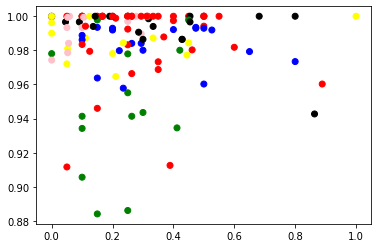

In [11]:
import matplotlib.pyplot as plt
 
colors = {
'Subprime mortgage crisis':'red',
'Irritable bowel syndrome' : 'yellow',
'Genetically modified organism': 'pink',
'Noise-induced hearing loss': 'black',
'Business cycle' : 'green',
'Ethics' : 'blue',
'Radiocarbon dating considerations': 'red'
}

 
plt.scatter(gain_compare["Actual"], gain_compare["Vocab"], c = gain_compare["Topic"].map(colors))
 
# To show the plot
plt.show()